# Garch model

In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 5.1 MB/s eta 0:00:00


In [ ]:
# Read csv from path
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Specify the file path
file_path = '/Users/alex/Documents/Data Science Master/Second Semester/Guided Studies in Financial Management/Group Project/Stock Data/combined_financial_data.csv'

# Read the CSV file
df = pd.read_csv('combined_financial_data (1).csv')

# Display the DataFrame
print(df.head())

   Unnamed: 0        date  permno ticker  price      volume    return   high  \
0           0  2014-01-02   10107   MSFT  37.16  30423757.0 -0.006683  37.40   
1           1  2014-01-03   10107   MSFT  36.91  30944370.0 -0.006728  37.22   
2           2  2014-01-06   10107   MSFT  36.13  43111355.0 -0.021133  36.89   
3           3  2014-01-07   10107   MSFT  36.41  35478667.0  0.007750  36.49   
4           4  2014-01-08   10107   MSFT  35.76  59452427.0 -0.017852  36.14   

     low    open  avg_price      mkt_cap  pct_return  ticker_attention  \
0  37.10  37.350      37.25  308428000.0     -0.6683              3.25   
1  36.60  37.200      36.91  306353000.0     -0.6728              3.38   
2  36.11  36.850      36.50  299879000.0     -2.1133              4.03   
3  36.21  36.325      36.35  302203000.0      0.7750              4.94   
4  35.58  36.000      35.86  296808000.0     -1.7852              5.33   

   name_price_attention  
0                  3.15  
1                  1.5

In [ ]:
from arch import arch_model

# Assume 'returns' is the column with returns data
#df['squared_returns'] = df['return'] ** 2

df['returns'] = df['return']*100
# Fit a GARCH(1, 1) model to the squared returns data
from arch import arch_model
model = arch_model(df['returns'], vol='Garch', p=1, q=1)
model_fit = model.fit()

# Print out the summary of the model
print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 484439.3231499122
Iteration:      2,   Func. Count:     16,   Neg. LLF: 450811.48493131844
Iteration:      3,   Func. Count:     25,   Neg. LLF: 492768394.51471424
Iteration:      4,   Func. Count:     31,   Neg. LLF: 114946.59702386297
Iteration:      5,   Func. Count:     37,   Neg. LLF: 150460.34335419768
Iteration:      6,   Func. Count:     45,   Neg. LLF: 115750.08384657183
Iteration:      7,   Func. Count:     52,   Neg. LLF: 114813.45624319317
Iteration:      8,   Func. Count:     57,   Neg. LLF: 114813.45150170047
Iteration:      9,   Func. Count:     62,   Neg. LLF: 114813.45149774698
Iteration:     10,   Func. Count:     66,   Neg. LLF: 114813.45149774392
Optimization terminated successfully    (Exit mode 0)
            Current function value: 114813.45149774698
            Iterations: 10
            Function evaluations: 66
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results     

### Model Components

- **Mean Model**: The `Constant Mean` model suggests that the expected return is constant over time, which is a common assumption in financial time series analysis.
- **Vol Model**: The `GARCH` model indicates that the volatility of returns is being modeled with a GARCH process, specifically designed to model time-varying volatility.

### Model Fit and Statistics

- **Log-Likelihood**: The log-likelihood value (-114813) indicates how well the model fits the data. Higher values (less negative) suggest a better fit.
- **AIC/BIC**: The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are used to compare models; lower values indicate a better model fit in terms of explaining variance while penalizing for the number of parameters.

### Mean Model Parameters

- **mu (0.0692)**: This is the estimated constant mean of the returns series, with a standard error of 0.005555. The t-statistic and its associated p-value indicate that this mean is significantly different from zero, suggesting that the average return is statistically significant over the period analyzed.

### Volatility Model Parameters

- **omega (0.0533)**: This parameter represents the long-run average variance (volatility) of the returns series in the absence of shocks. It's the baseline level of variance when past values of returns and volatility have no effect.
- **alpha[1] (0.0878)**: This coefficient measures the reaction of volatility to past shocks (squared returns). A higher value indicates that recent shocks have a more significant impact on current volatility, suggesting a persistence of volatility clustering.
- **beta[1] (0.8961)**: This parameter measures the persistence of volatility over time. A value close to 1 indicates high persistence, meaning that if volatility spikes, it tends to remain high for a more extended period.

### Interpretation

The model's parameters suggest that there is significant time-varying volatility in the returns series, with both recent shocks (alpha[1]) and past volatility (beta[1]) having substantial impacts on current volatility levels. The high value of beta[1] indicates that volatility shocks are highly persistent, meaning that periods of high volatility are likely to follow each other.

Additionally, the constant mean model's significance suggests that, despite the volatility, there is a statistically significant average return level throughout the data period.

This GARCH model output can be particularly useful for risk management, as it allows for more accurate predictions of future volatility, which is crucial for setting appropriate risk levels, pricing derivatives, and managing portfolios.

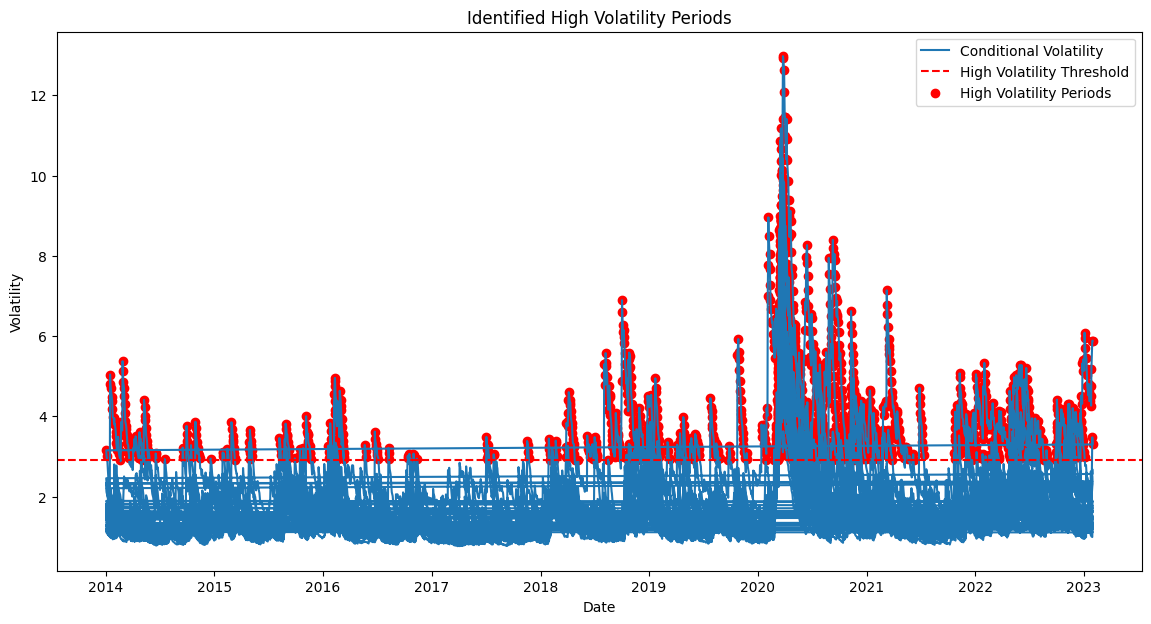

In [ ]:
import numpy as np
# Assuming 'garch11_fit' is your fitted GARCH model object from the 'arch' library

# Step 1: Extract conditional volatility
conditional_volatility = model_fit.conditional_volatility

# Step 2: Determine a threshold for high volatility
# For example, using the 95th percentile of the extracted conditional volatility
high_volatility_threshold = np.percentile(conditional_volatility, 95)

# Step 3: Identify periods of high volatility
# This will be a boolean series where True indicates periods of high volatility
is_high_volatility = conditional_volatility > high_volatility_threshold

# Assuming 'data' is your DataFrame and it has a 'Date' column in the correct date-time format
df.index = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 7))
plt.plot(df.index, conditional_volatility, label='Conditional Volatility')
plt.axhline(high_volatility_threshold, color='r', linestyle='--', label='High Volatility Threshold')
plt.scatter(df.index[is_high_volatility], conditional_volatility[is_high_volatility], color='red', label='High Volatility Periods')
plt.title('Identified High Volatility Periods')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()



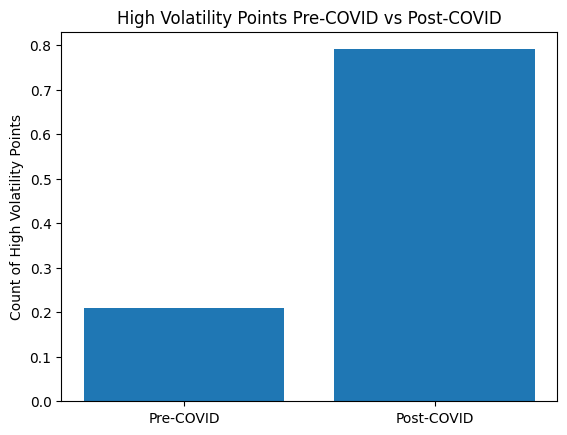

In [ ]:
# Parse the dates and set them as the DataFrame index
df.index = pd.to_datetime(df['date'])

# Count high volatility points in pre-COVID and post-COVID periods
pre_covid_high_volatility_count = is_high_volatility[df.index < '2020-01-01'].sum() / is_high_volatility.sum()
post_covid_high_volatility_count = is_high_volatility[df.index >= '2020-01-01'].sum() / is_high_volatility.sum()

# Visualize the counts
plt.bar(['Pre-COVID', 'Post-COVID'], [pre_covid_high_volatility_count, post_covid_high_volatility_count])
plt.ylabel('Count of High Volatility Points')
plt.title('High Volatility Points Pre-COVID vs Post-COVID')
plt.show()

In [ ]:
# Assuming you have a series called 'conditional_volatility' and a boolean series 'is_high_volatility'
# The 'df' DataFrame should have a 'date' column

# Add the 'conditional_volatility' and 'is_high_volatility' to the DataFrame if they are not already included
df['volatility'] = conditional_volatility.values
df['High_Volatility'] = is_high_volatility.values
#df['High_Volatility'] = is_high_volatility

# Ensure the index is set to the datetime of the 'date' column
df.index = pd.to_datetime(df['date'])

# Get the top 5 high volatility data points for the pre-COVID period
df_high_volatility = df[df['High_Volatility'] == True]
#pre_covid_high_volatility_top5 = df_high_volatility[df_high_volatility.index < '2020-01-01'].sort_values(by='volatility', ascending=False).head(5)
pre_covid_high_volatility_top5 = df_high_volatility[df_high_volatility.index < '2020-01-01'].drop_duplicates(subset='ticker').sort_values(by='volatility', ascending=False).head(5)

# Get the top 5 high volatility data points for the post-COVID period
post_covid_high_volatility_top5 = df_high_volatility[df_high_volatility.index >= '2020-01-01'].drop_duplicates(subset='ticker').sort_values(by='volatility', ascending=False).head(5)

pre_covid_high_volatility_top5


Unnamed: 0        date  permno ticker      price      volume  \
date                                                                       
2014-01-15       61731  2014-01-15   93436   TSLA  164.13000  20407704.0   
2019-04-26       58487  2019-04-26   22592    MMM  191.67000   4491273.0   
2016-01-25       48524  2016-01-25   59176    AXP   55.02000  18498255.0   
2014-09-29       45906  2014-09-29   57665    NKE   89.12000   7425478.0   
2019-04-15       35619  2019-04-15   26403    DIS  132.03999  32773740.0   

              return    high        low    open   avg_price       mkt_cap  \
date                                                                        
2014-01-15  0.017734  172.23  162.10001  168.45  167.165005  2.020293e+07   
2019-04-26  0.004981  192.25  189.36000  190.53  190.805000  1.103822e+08   
2016-01-25 -0.000726   55.77   54.14000   54.46   54.955000  5.415321e+07   
2014-09-29 -0.004246   90.10   88.27000   88.27   89.185000  6.155875e+07   
2019-04-15  0.015224  132.70  129.78999  131.05  131.244995  2.373579e+08   

            pct_return  ticker_attention  name_price_attention  returns  \
date                                                                      
2014-01-15      1.7734             10.00                  5.00   1.7734   
2019-04-26      0.4981             40.87                 21.12   0.4981   
2016-01-25     -0.0726             30.68                 10.92  -0.0726   
2014-09-29     -0.4246              5.40                  0.90  -0.4246   
2019-04-15      1.5224             39.44                 11.80   1.5224   

            volatility  High_Volatility  
date                                     
2014-01-15    5.041375             True  
2019-04-26    3.980878             True  
2016-01-25    3.826357             True  
2014-09-29    3.761732             True  
2019-04-15    3.577618             True

In [ ]:
df.head()

Unnamed: 0        date  permno ticker  price      volume  \
date                                                                   
2014-01-02           0  2014-01-02   10107   MSFT  37.16  30423757.0   
2014-01-03           1  2014-01-03   10107   MSFT  36.91  30944370.0   
2014-01-06           2  2014-01-06   10107   MSFT  36.13  43111355.0   
2014-01-07           3  2014-01-07   10107   MSFT  36.41  35478667.0   
2014-01-08           4  2014-01-08   10107   MSFT  35.76  59452427.0   

              return   high    low    open  avg_price      mkt_cap  \
date                                                                 
2014-01-02 -0.006683  37.40  37.10  37.350      37.25  308428000.0   
2014-01-03 -0.006728  37.22  36.60  37.200      36.91  306353000.0   
2014-01-06 -0.021133  36.89  36.11  36.850      36.50  299879000.0   
2014-01-07  0.007750  36.49  36.21  36.325      36.35  302203000.0   
2014-01-08 -0.017852  36.14  35.58  36.000      35.86  296808000.0   

            pct_return  ticker_attention  name_price_attention  returns  \
date                                                                      
2014-01-02     -0.6683              3.25                  3.15  -0.6683   
2014-01-03     -0.6728              3.38                  1.54  -0.6728   
2014-01-06     -2.1133              4.03                  2.24  -2.1133   
2014-01-07      0.7750              4.94                  1.19   0.7750   
2014-01-08     -1.7852              5.33                  1.68  -1.7852   

            volatility  High_Volatility  
date                                     
2014-01-02    1.523906            False  
2014-01-03    1.477227            False  
2014-01-06    1.434310            False  
2014-01-07    1.521598            False  
2014-01-08    1.473733            False

In [ ]:
# Assuming you have already added 'conditional_volatility' and 'is_high_volatility' to the DataFrame

# Ensure the index is set to the datetime of the 'date' column
df.index = pd.to_datetime(df['date'])

# Group by 'ticker' and calculate the maximum volatility for each ticker
max_volatility_by_ticker = df.groupby('ticker')['volatility'].max()

# Get the top 5 most volatile stocks for the pre-COVID period
pre_covid_most_volatile_top5 = max_volatility_by_ticker[df[df.index < '2020-01-01'].groupby('ticker')['volatility'].idxmax()].nlargest(5)

# Get the top 5 most volatile stocks for the post-COVID period
post_covid_most_volatile_top5 = max_volatility_by_ticker[df[df.index >= '2020-01-01'].groupby('ticker')['volatility'].idxmax()].nlargest(5)

pre_covid_most_volatile_top5, post_covid_most_volatile_top5


KeyError: "None of [DatetimeIndex(['2019-01-07', '2016-10-31', '2016-01-25', '2016-01-28',\n               '2019-01-29', '2016-02-10', '2016-02-12', '2015-08-31',\n               '2019-04-15', '2019-01-17', '2018-02-09', '2014-01-02',\n               '2019-01-24', '2018-01-29', '2018-12-17', '2016-02-16',\n               '2019-02-15', '2015-10-23', '2019-04-26', '2016-08-08',\n               '2015-04-27', '2018-12-27', '2018-10-22', '2019-10-23',\n               '2018-10-02', '2019-10-16', '2017-07-28', '2018-02-21'],\n              dtype='datetime64[ns]', name='ticker', freq=None)] are in the [index]"

In [ ]:
post_covid_high_volatility_top5

Unnamed: 0        date  permno ticker      price      volume  \
date                                                                       
2020-03-10       22130  2020-03-10   14541    CVX   84.98000  22592128.0   
2020-03-10       44990  2020-03-10   18542    CAT  106.49000   8293227.0   
2020-03-10       56420  2020-03-10   86868     GS  184.35001   6803867.0   
2020-01-14       63240  2020-01-14   93436   TSLA  537.91998  28955735.0   
2020-03-03        3837  2020-03-03   14593   AAPL  289.32001  79720151.0   

              return       high        low       open   avg_price  \
date                                                                
2020-03-10  0.053428   86.30000   81.04000   86.24000   83.670000   
2020-03-10  0.023254  109.06000   99.11000  108.64000  104.085000   
2020-03-10  0.066779  185.39500  173.28500  181.62000  179.340000   
2020-01-14  0.024883  547.40997  524.90002  544.25500  536.154995   
2020-03-03 -0.031759  304.00000  285.79999  303.67001  294.899995   

                 mkt_cap  pct_return  ticker_attention  name_price_attention  \
date                                                                           
2020-03-10  1.597050e+08      5.3428             61.06                 61.38   
2020-03-10  5.857834e+07      2.3254             46.86                 70.55   
2020-03-10  6.372482e+07      6.6779             60.52                 77.00   
2020-01-14  9.739687e+07      2.4883             18.48                 17.28   
2020-03-03  1.265914e+09     -3.1759             59.16                 43.24   

            returns  volatility  High_Volatility  
date                                              
2020-03-10   5.3428    5.121053             True  
2020-03-10   2.3254    4.778657             True  
2020-03-10   6.6779    4.050774             True  
2020-01-14   2.4883    3.793798             True  
2020-03-03  -3.1759    3.784335             True

In [ ]:
pre_covid_high_volatility_top5.to_csv("pre_covid_high_volatility_top5.csv")
post_covid_high_volatility_top5.to_csv("post_covid_high_volatility_top5.csv")

In [ ]:
for index, row in pre_covid_high_volatility_top5.iterrows():
    if pd.notna(row['High_Volatility']):
        print(row)

Unnamed: 0                    61731
date                     2014-01-15
permno                        93436
ticker                         TSLA
price                        164.13
volume                   20407704.0
return                     0.017734
high                         172.23
low                       162.10001
open                         168.45
avg_price                167.165005
mkt_cap                 20202925.83
pct_return                   1.7734
ticker_attention               10.0
name_price_attention            5.0
returns                      1.7734
volatility                 5.041375
High_Volatility                True
Name: 2014-01-15 00:00:00, dtype: object
Unnamed: 0                     58487
date                      2019-04-26
permno                         22592
ticker                           MMM
price                         191.67
volume                     4491273.0
return                      0.004981
high                          192.25
low            

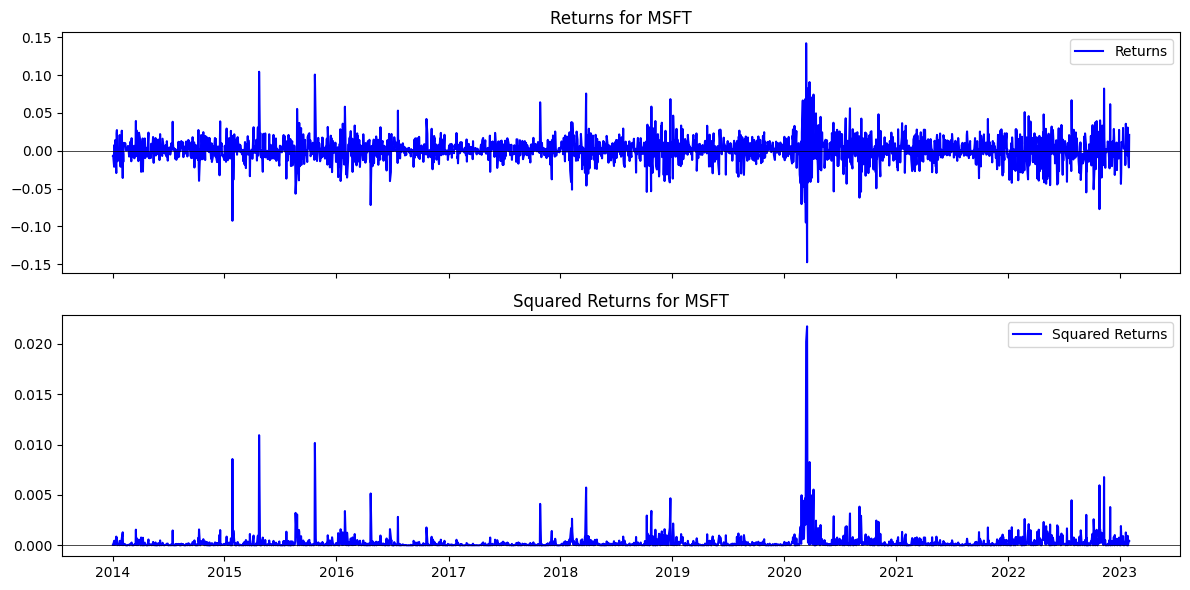

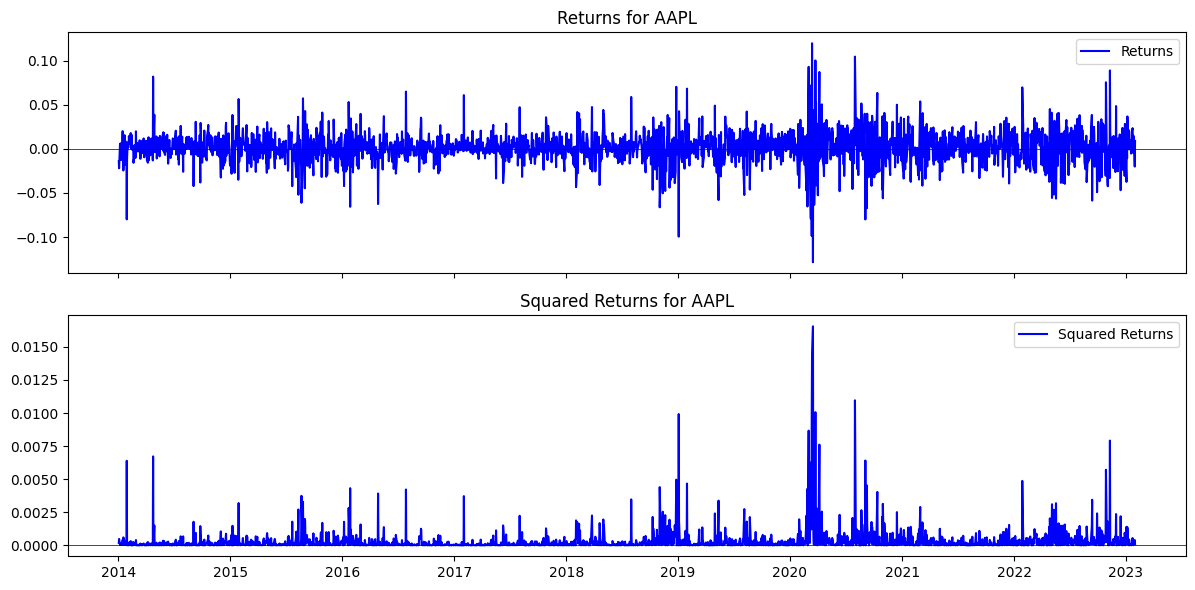

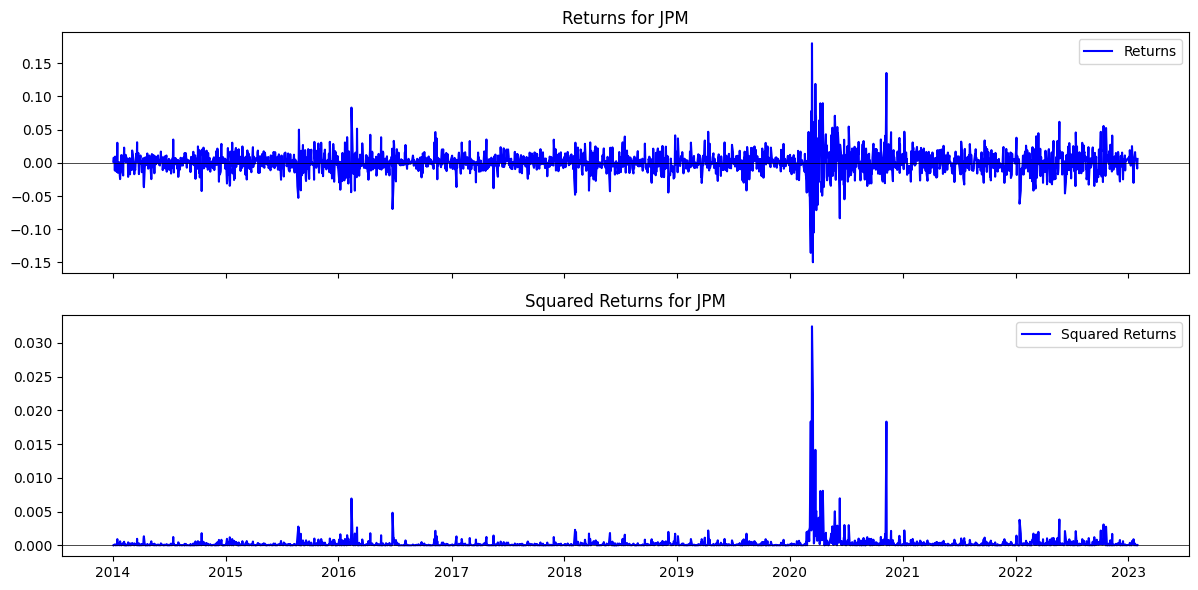

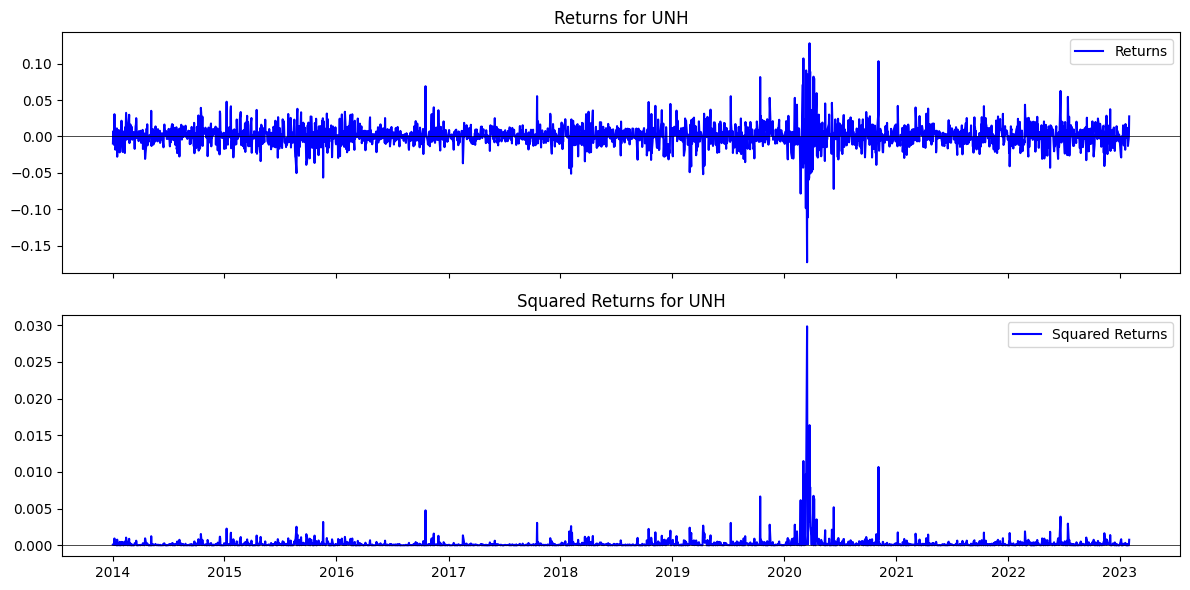

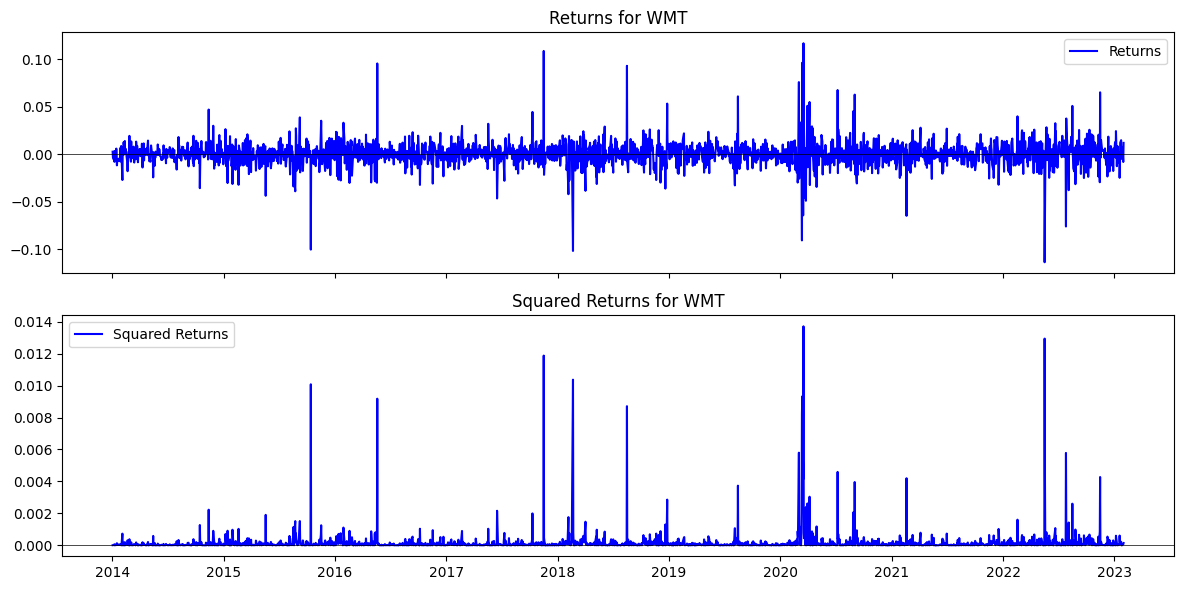

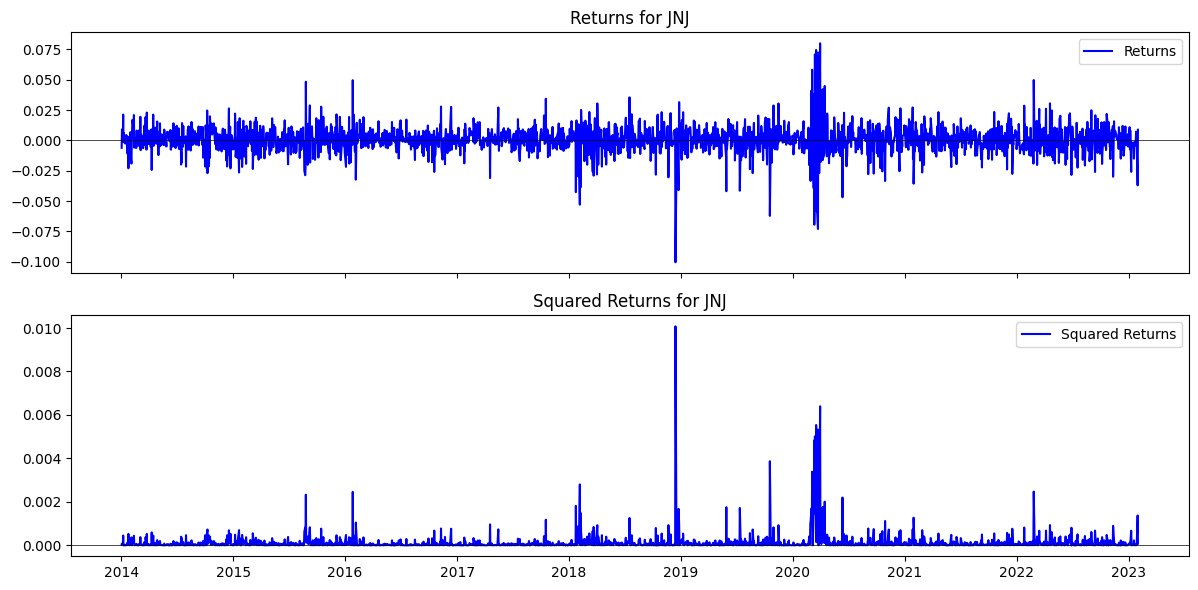

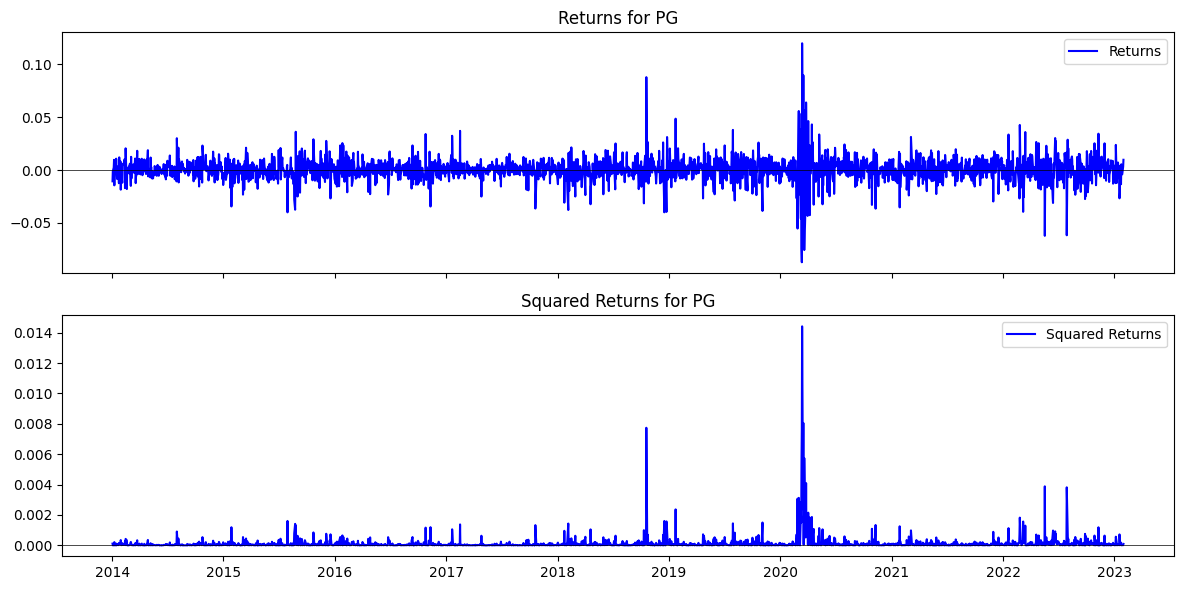

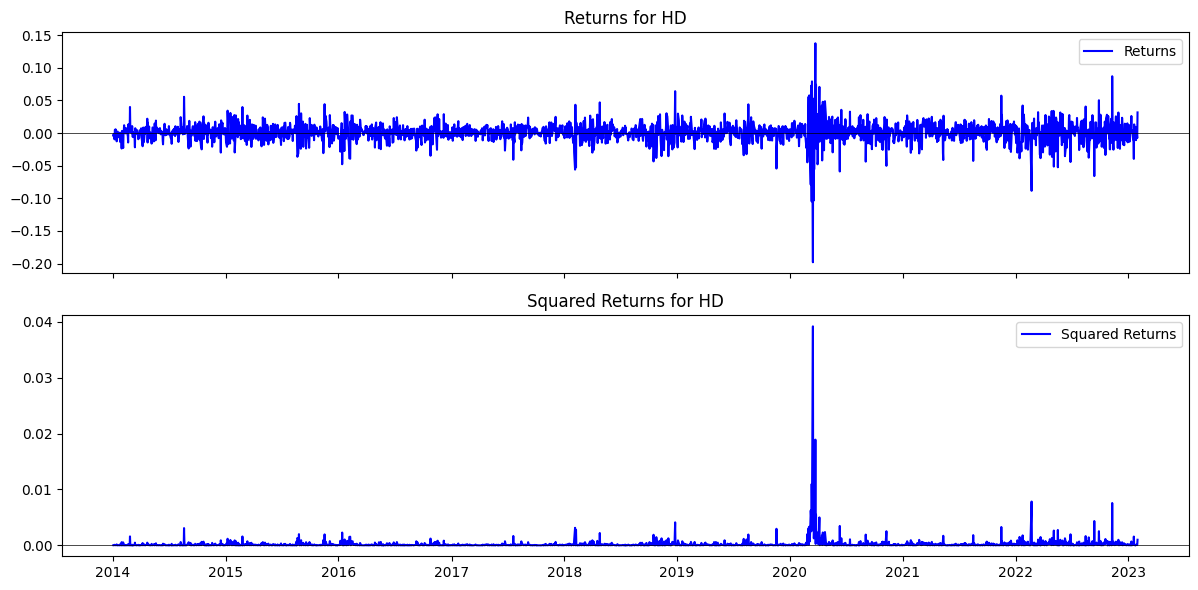

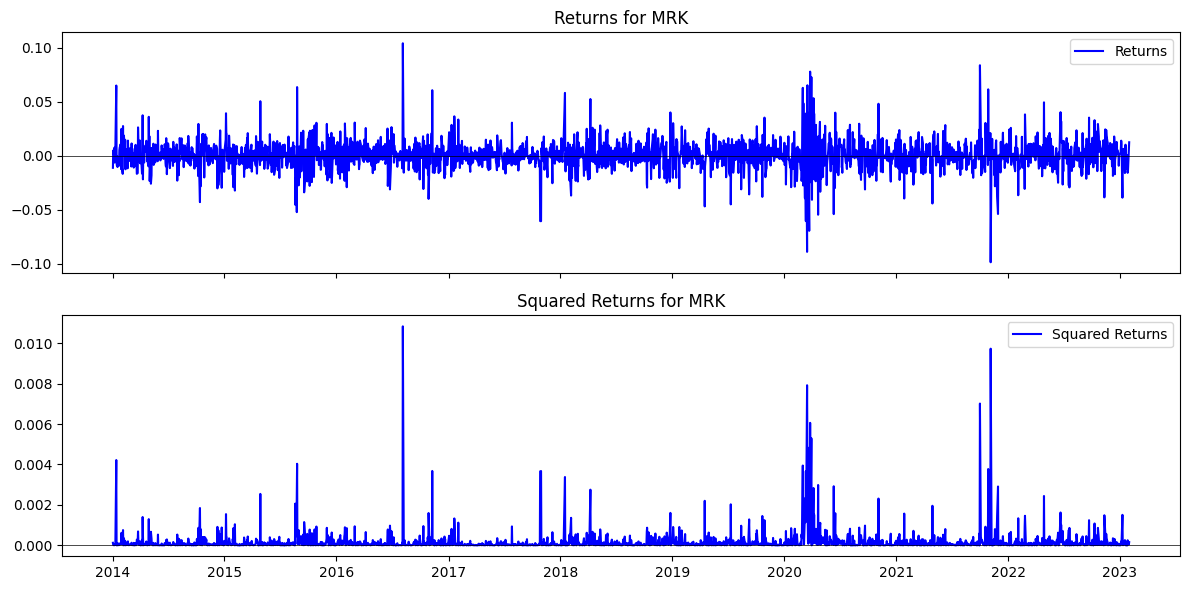

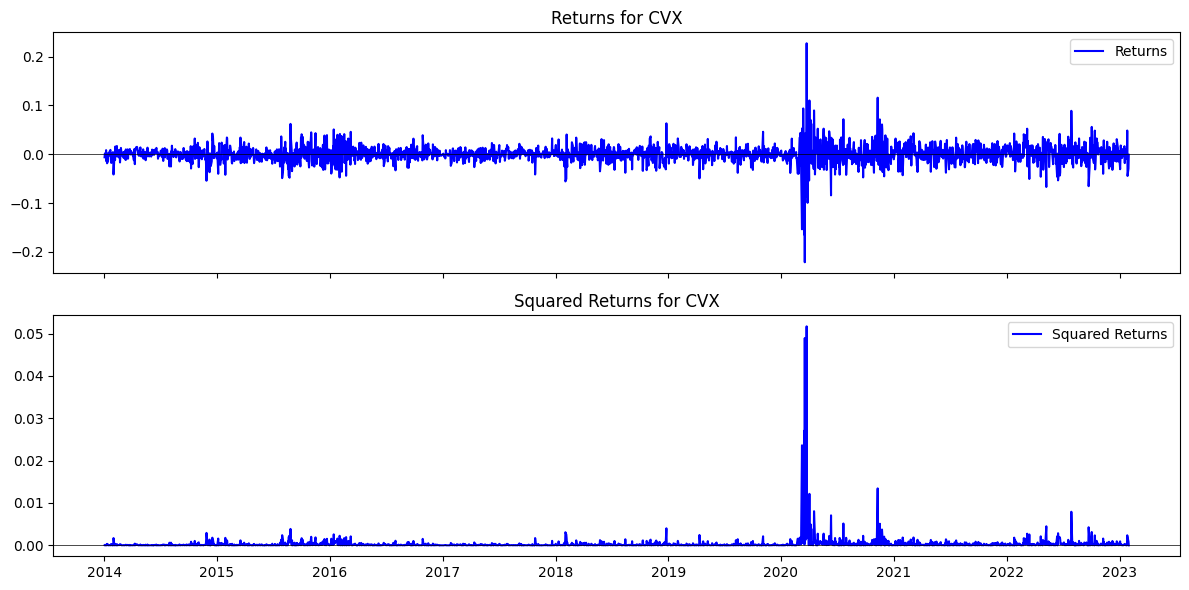

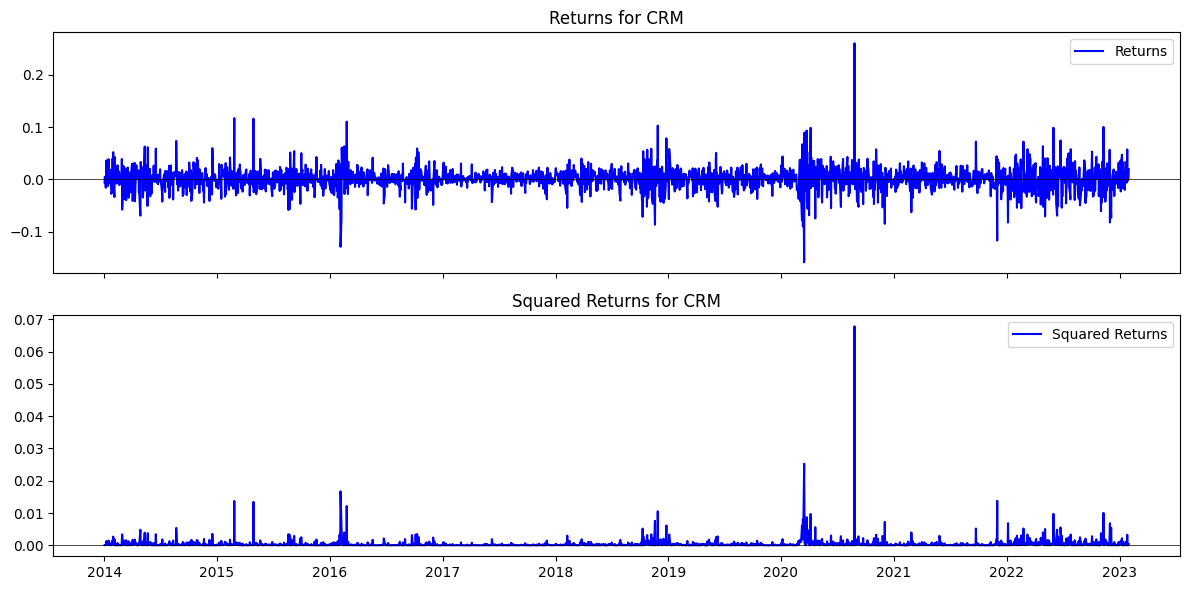

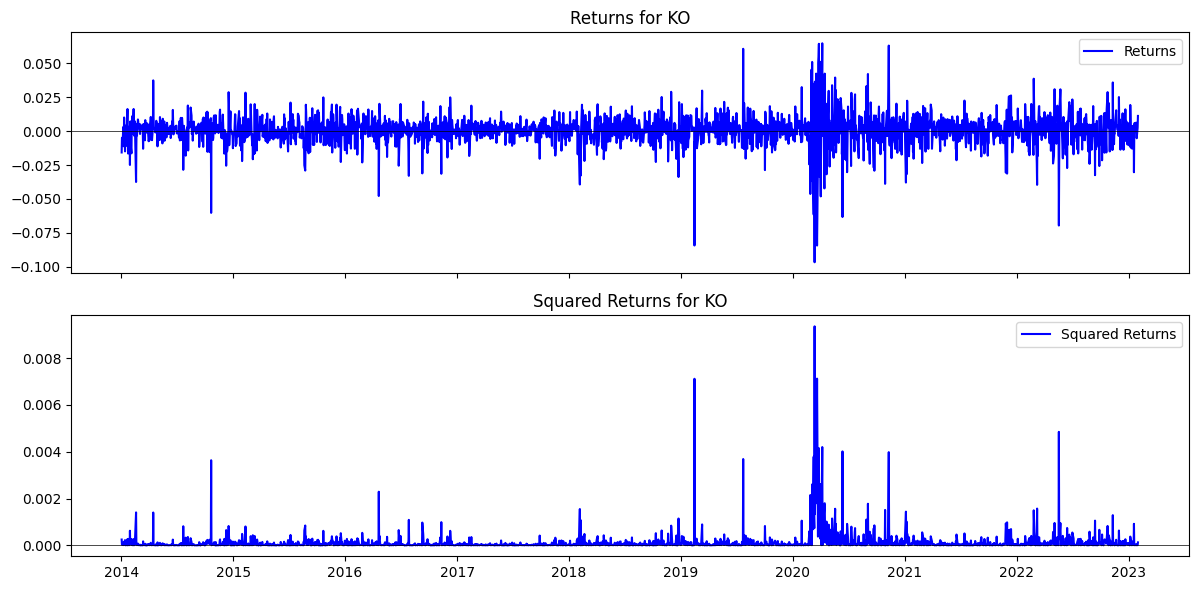

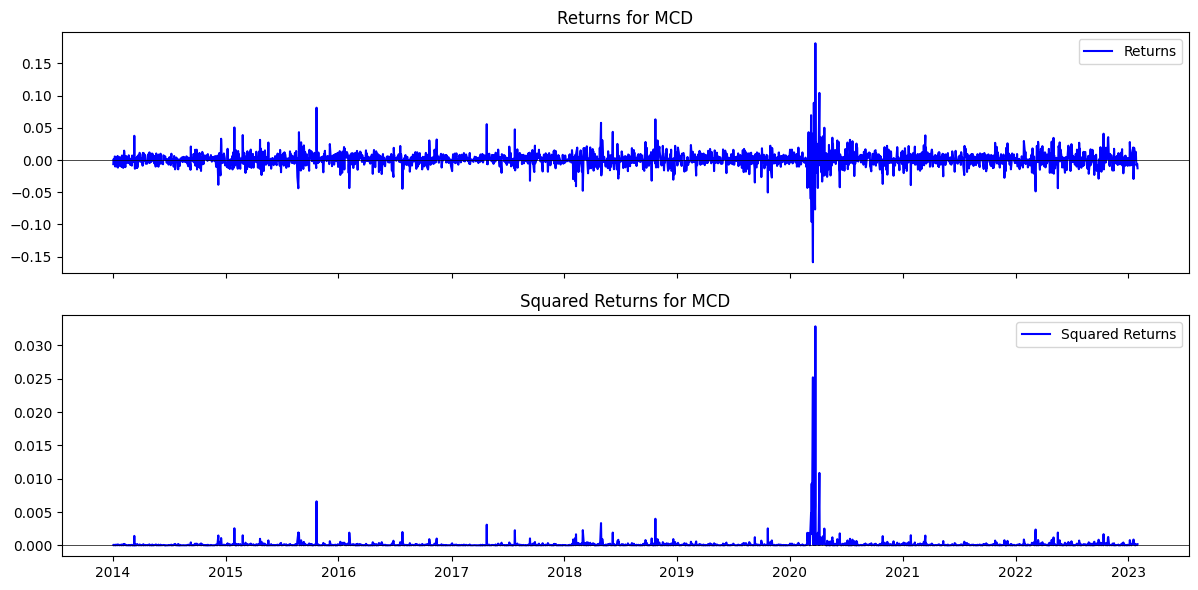

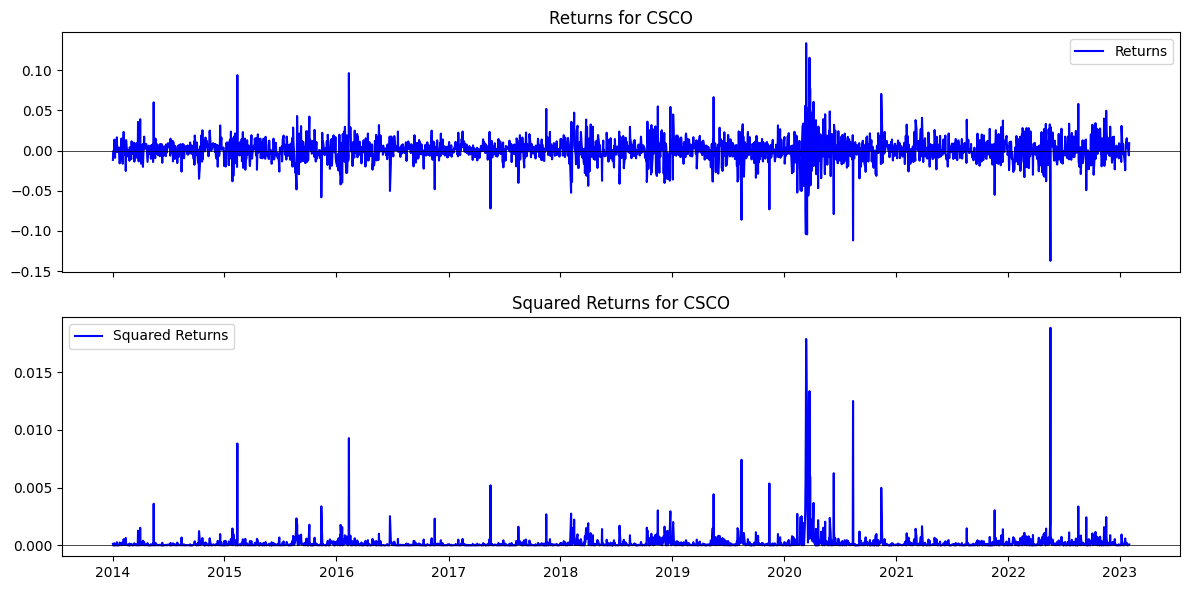

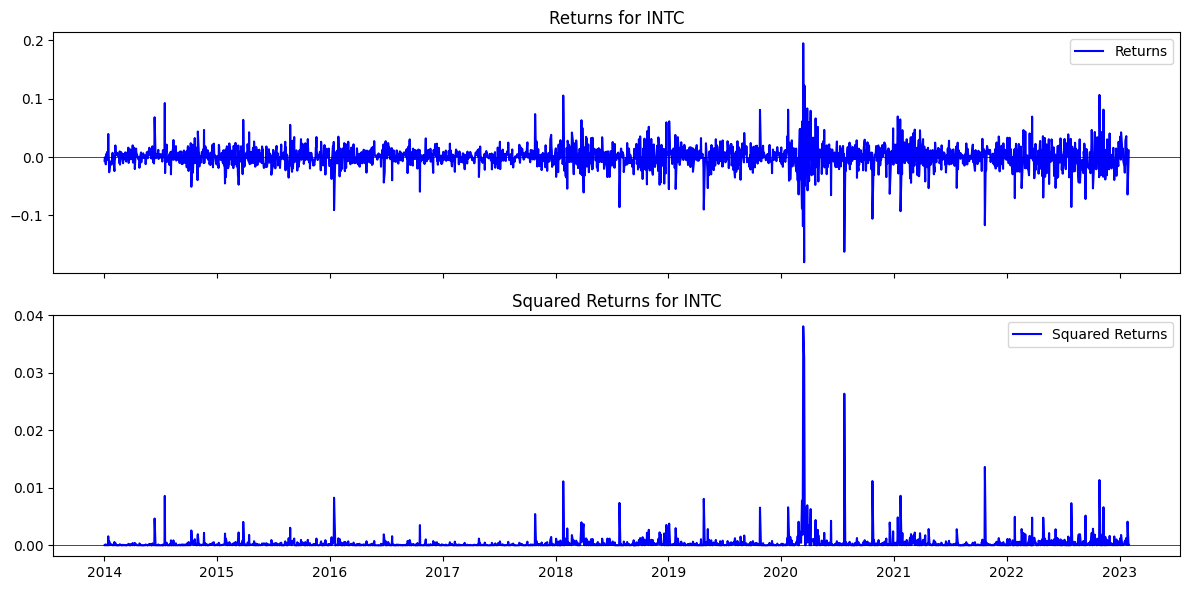

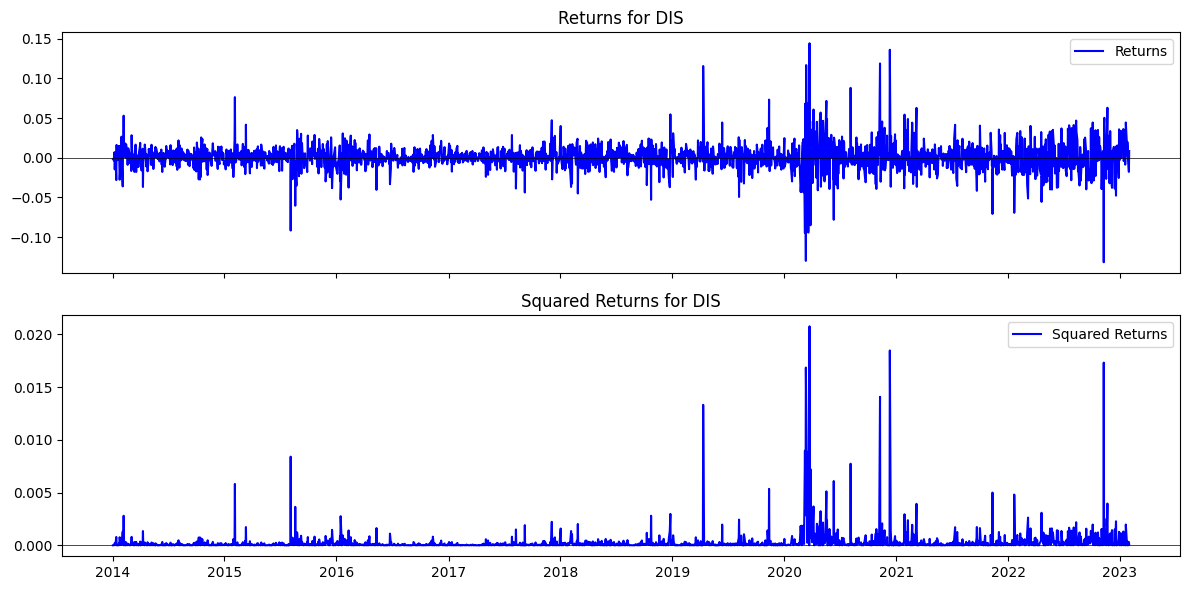

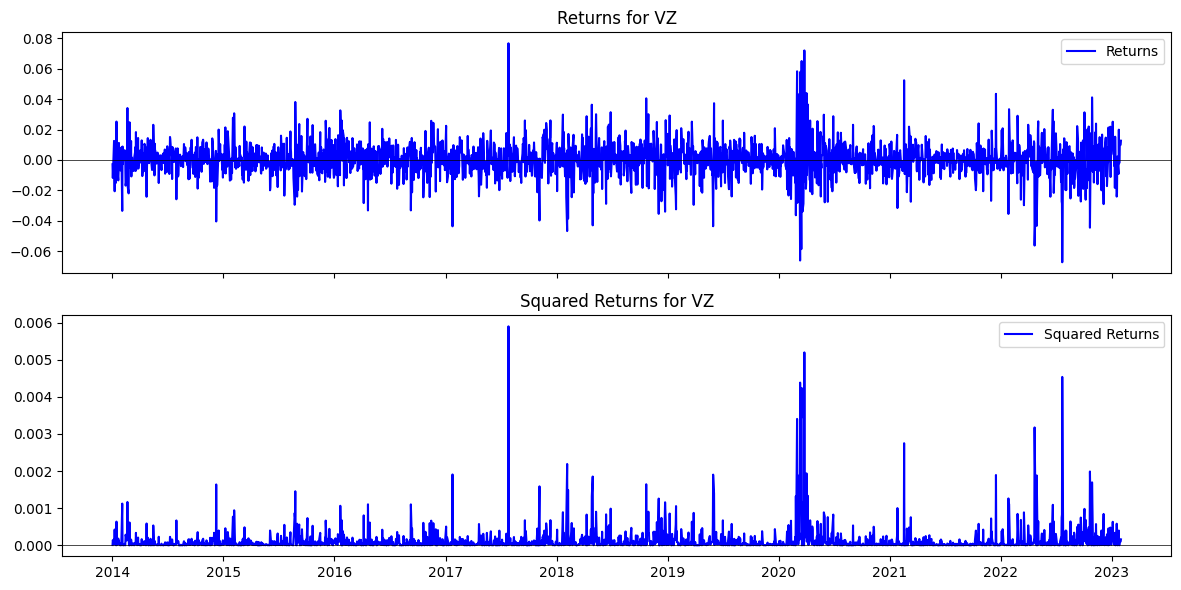

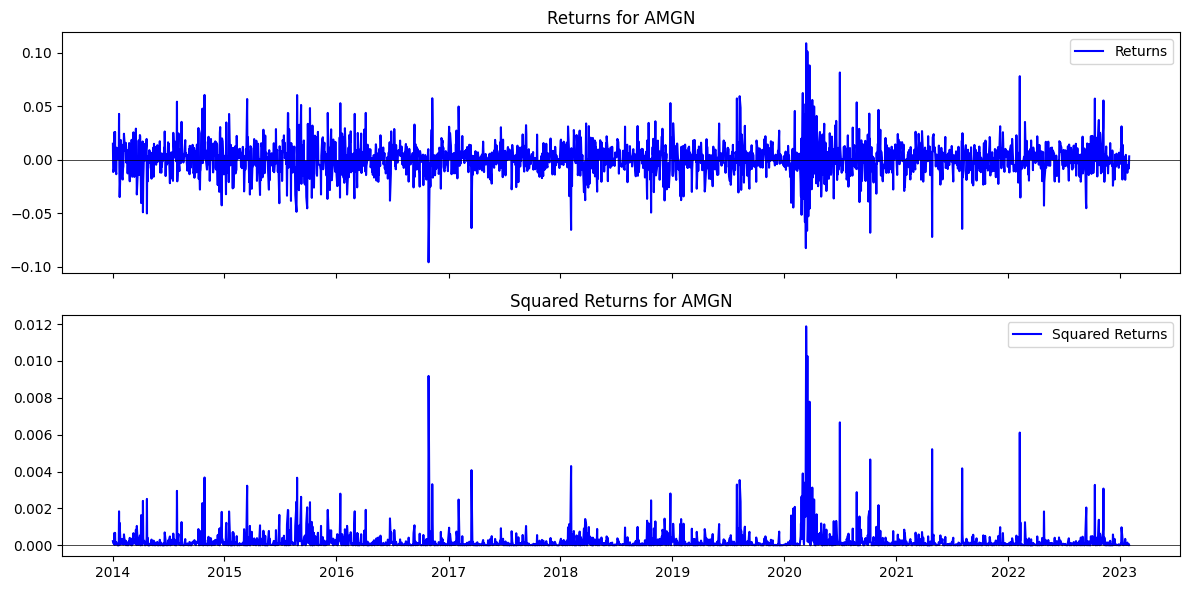

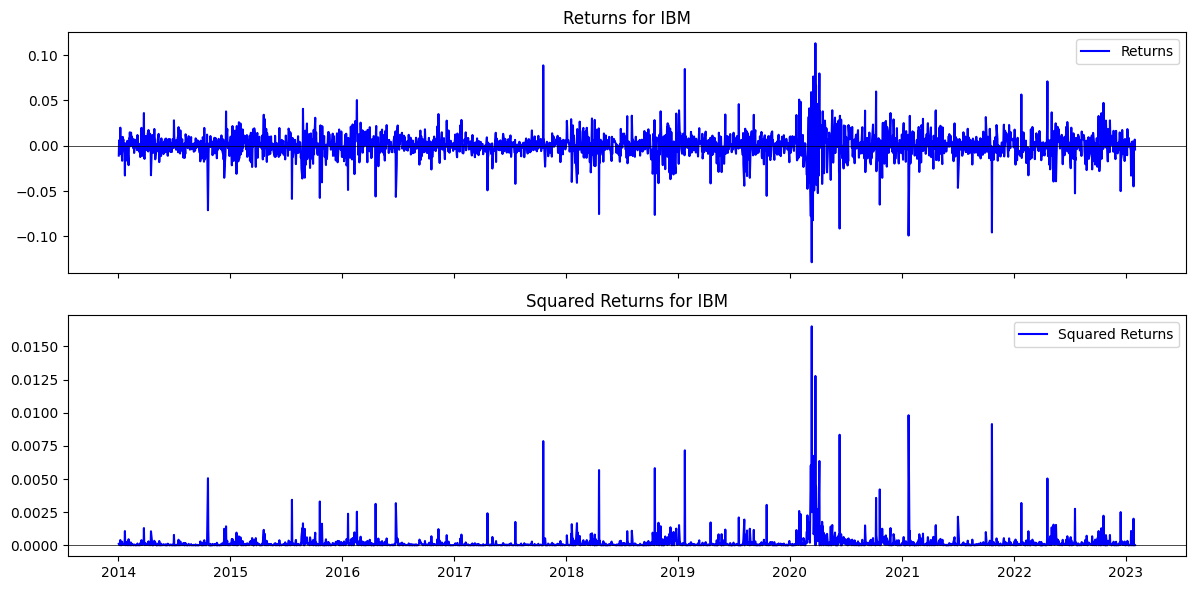

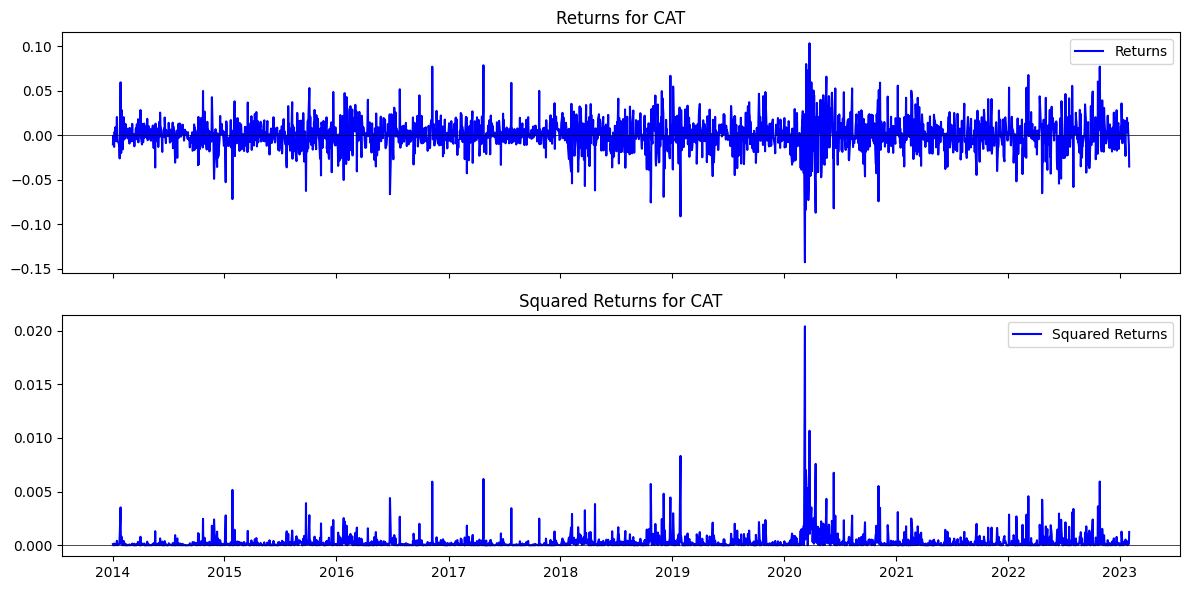

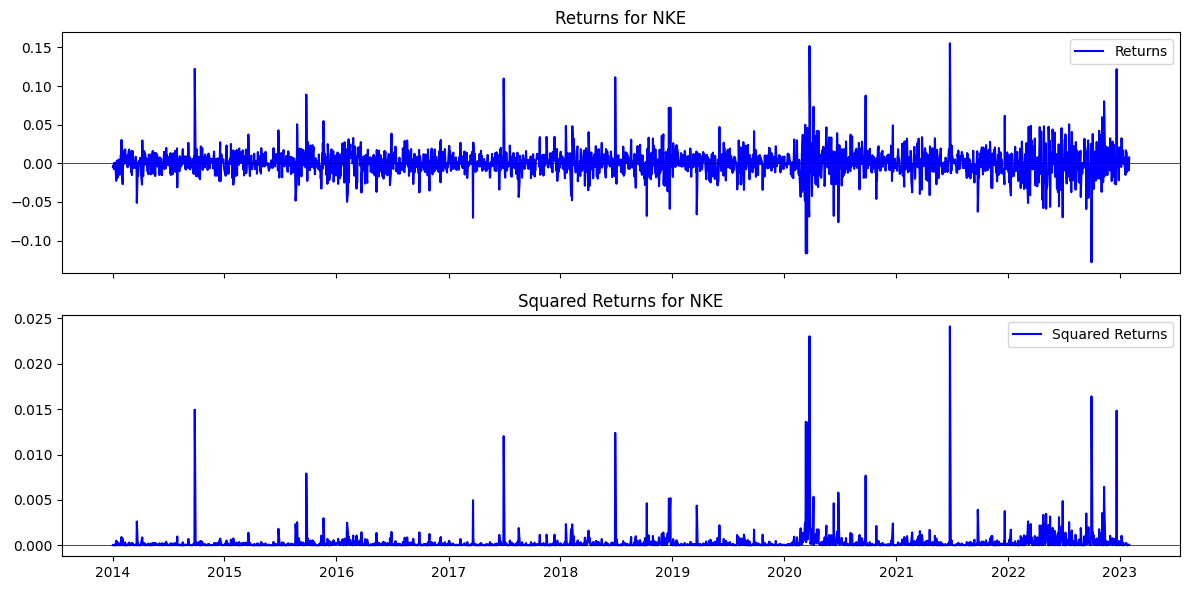

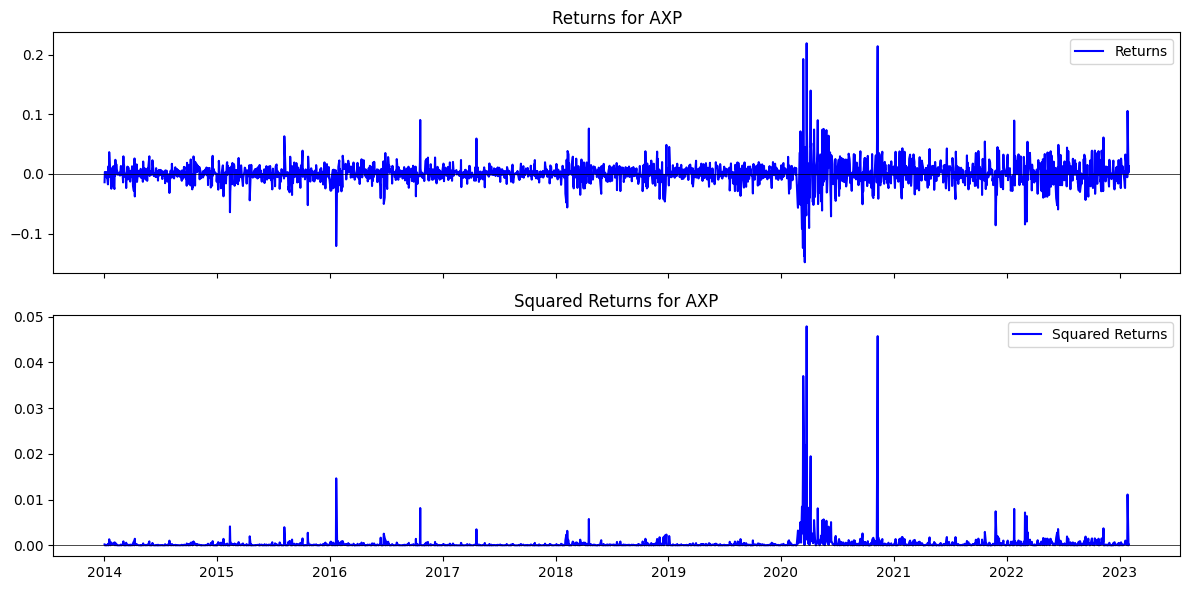

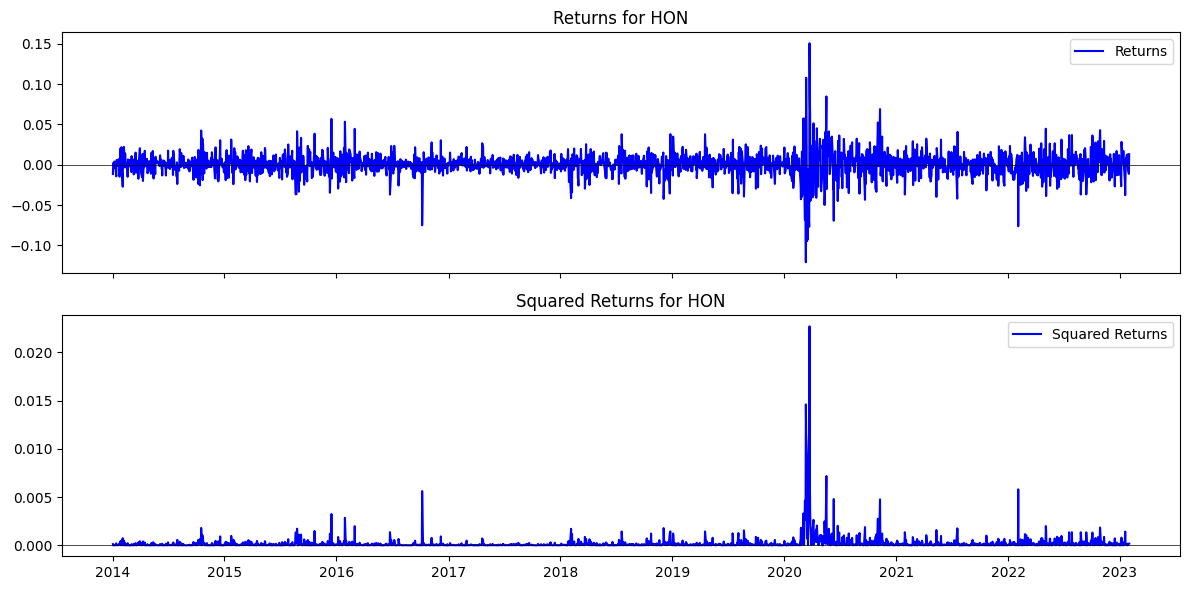

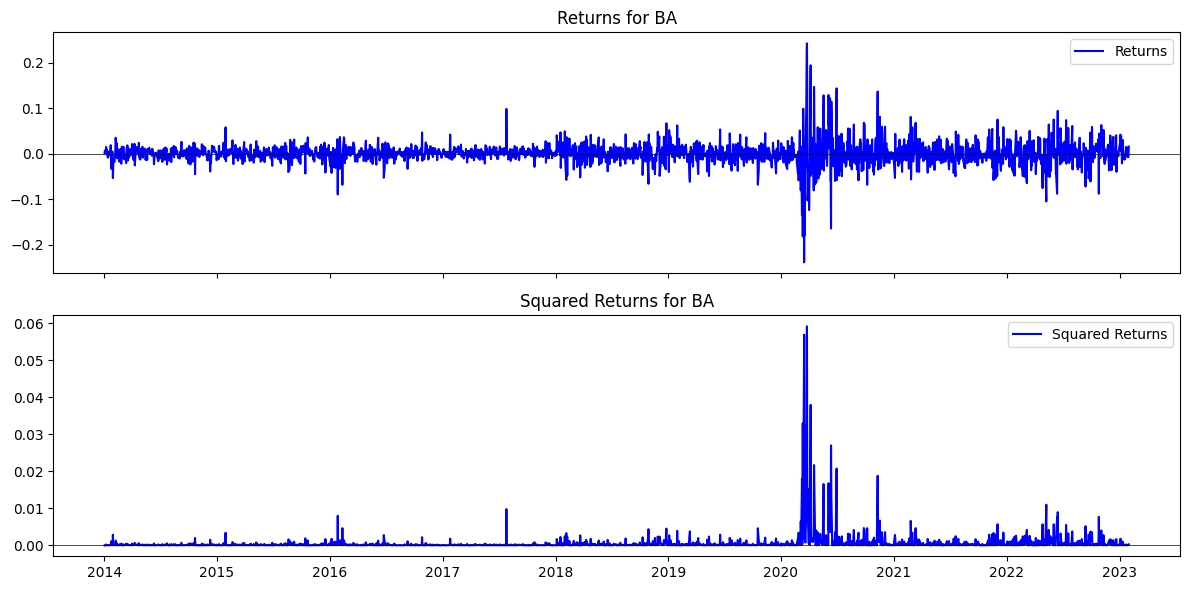

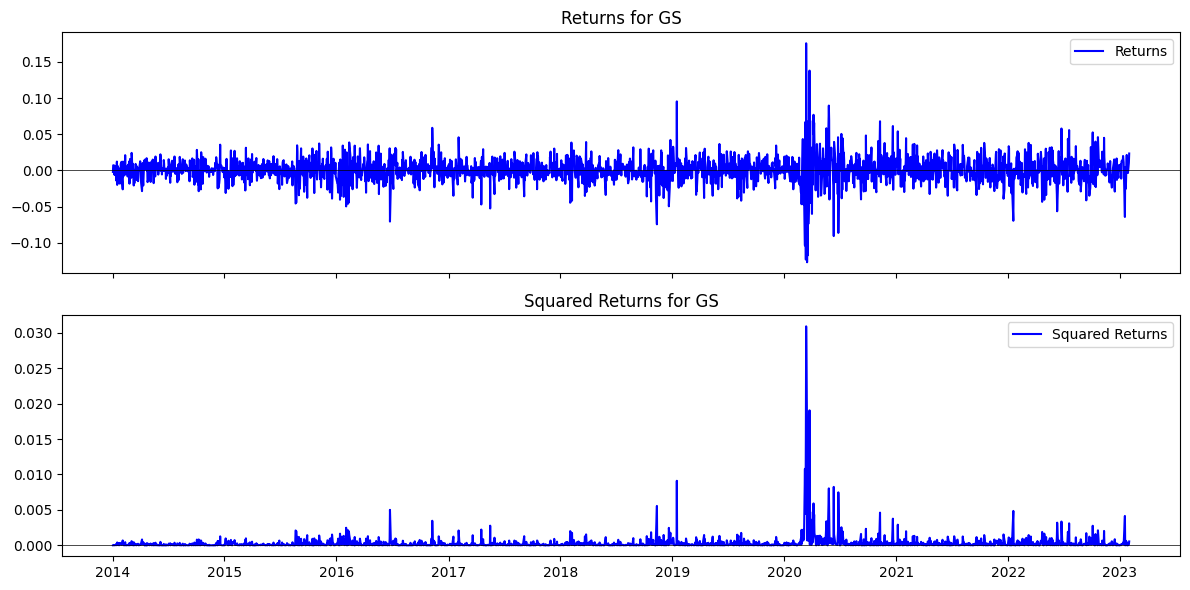

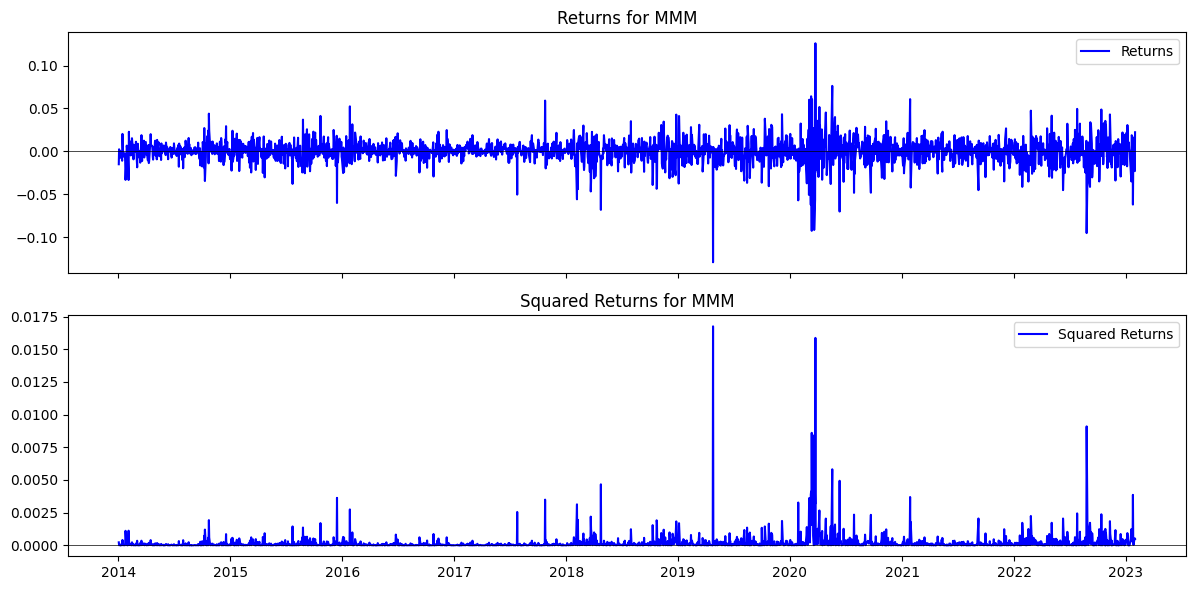

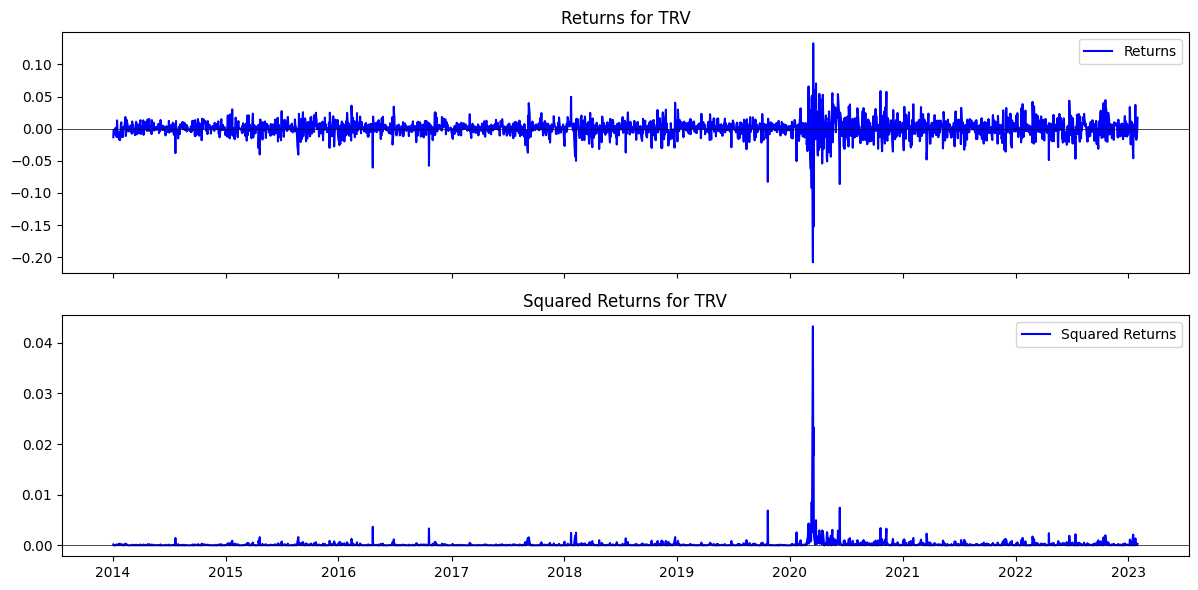

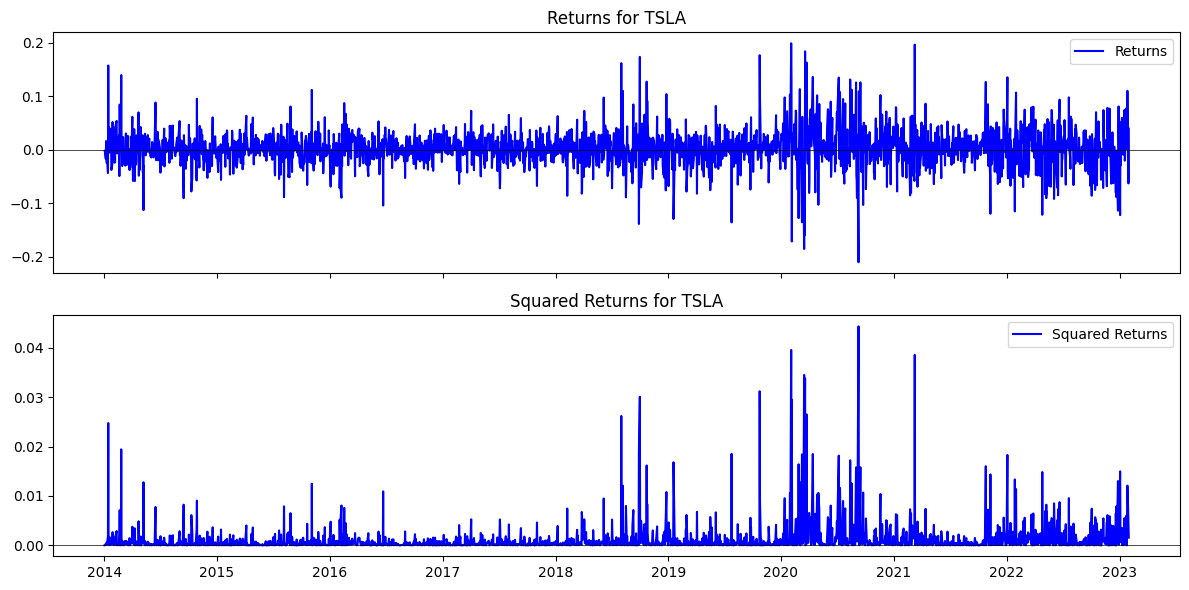

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your DataFrame is already read from the CSV and is named df
# df = pd.read_csv('/mnt/data/your_stock_data.csv')

# Ensure 'date' column is in the proper datetime format if it's not already
df['date'] = pd.to_datetime(df['date'])

# Calculate squared returns, if not already present in the DataFrame
if 'squared_returns' not in df.columns:
    df['squared_returns'] = df['return'] ** 2

# Assuming your DataFrame has a 'ticker' column
unique_tickers = df['ticker'].unique()

for ticker in unique_tickers:
    # Filter the DataFrame for the current ticker
    ticker_df = df[df['ticker'] == ticker]

    # Create subplots for each ticker
    fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

    # Plot returns for the ticker
    axs[0].plot(ticker_df['date'], ticker_df['return'], label='Returns', color='blue')
    axs[0].set_title(f'Returns for {ticker}')
    axs[0].axhline(0, color='black', linewidth=0.5)
    axs[0].legend()

    # Plot squared returns for the ticker
    axs[1].plot(ticker_df['date'], ticker_df['squared_returns'], label='Squared Returns', color='blue')
    axs[1].set_title(f'Squared Returns for {ticker}')
    axs[1].axhline(0, color='black', linewidth=0.5)
    axs[1].legend()

    # Improve layout and show plot
    plt.tight_layout()
    plt.show()


In [ ]:
# Assuming 'garch11_fit' is your fitted GARCH model object from the 'arch' library

# Step 1: Extract conditional volatility
conditional_volatility = garch11_fit.conditional_volatility

# Step 2: Determine a threshold for high volatility
# For example, using the 95th percentile of the extracted conditional volatility
high_volatility_threshold = np.percentile(conditional_volatility, 95)

# Step 3: Identify periods of high volatility
# This will be a boolean series where True indicates periods of high volatility
is_high_volatility = conditional_volatility > high_volatility_threshold

# Step 4: Visualization
plt.figure(figsize=(14, 7))
plt.plot(conditional_volatility, label='Conditional Volatility')
plt.axhline(high_volatility_threshold, color='r', linestyle='--', label='High Volatility Threshold')
plt.scatter(conditional_volatility.index[is_high_volatility], conditional_volatility[is_high_volatility], color='red', label='High Volatility Periods')
plt.title('Identified High Volatility Periods')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()


NameError: name 'garch11_fit' is not defined

In [ ]:
# Define a function to calculate the high volatility threshold
def high_volatility_threshold(returns_series, percentile=95):
    return returns_series.quantile(percentile / 100.0)

# Apply the function to each stock's squared returns to find the threshold
volatility_thresholds = df.groupby('ticker')['squared_returns'].apply(high_volatility_threshold)


In [ ]:
# Initialize a dictionary to hold the high volatility periods
high_volatility_periods = {}

for ticker in df['ticker'].unique():
    # Get the threshold for this ticker
    threshold = volatility_thresholds[ticker]

    # Filter the periods where squared returns exceed the threshold
    high_vol_periods = df[(df['ticker'] == ticker) & (df['squared_returns'] > threshold)]

    # Store the results
    high_volatility_periods[ticker] = high_vol_periods


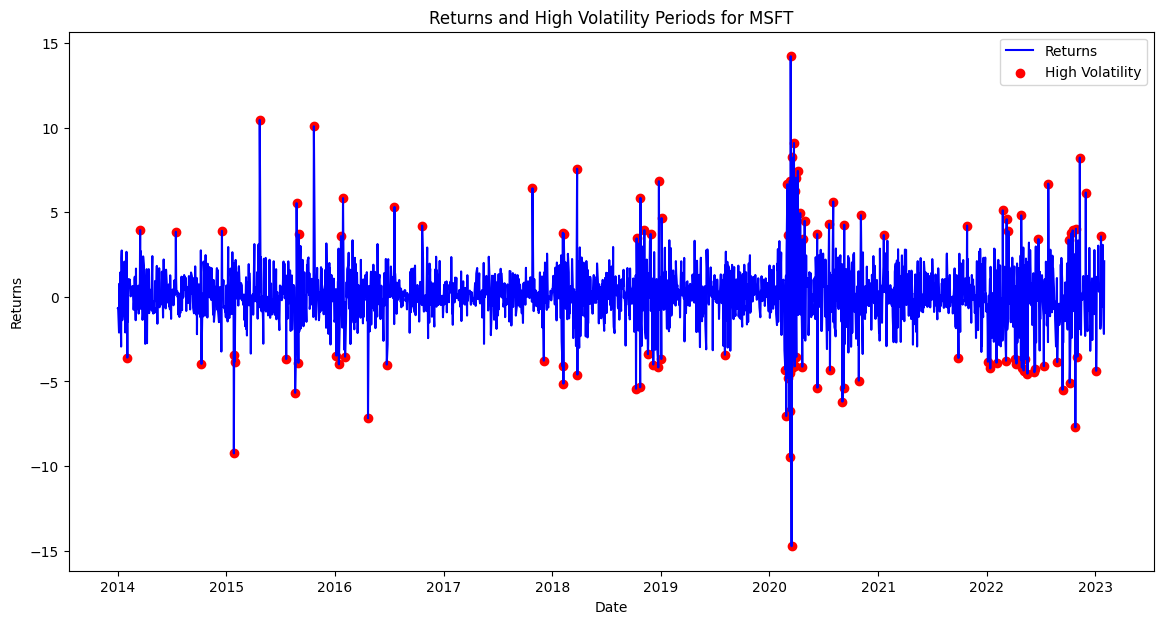

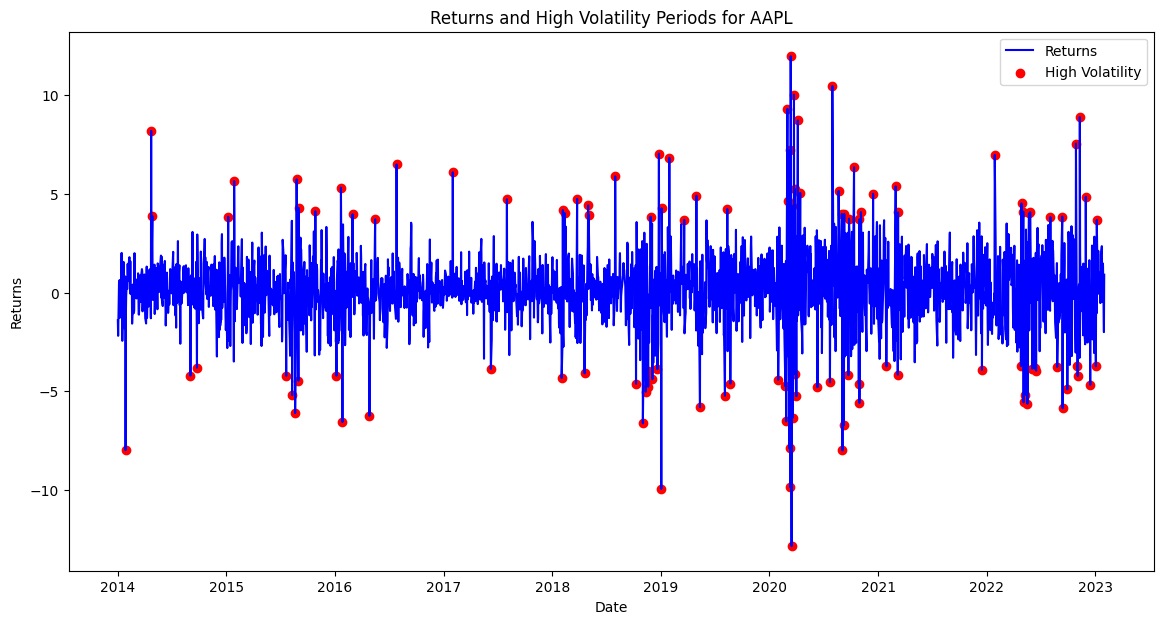

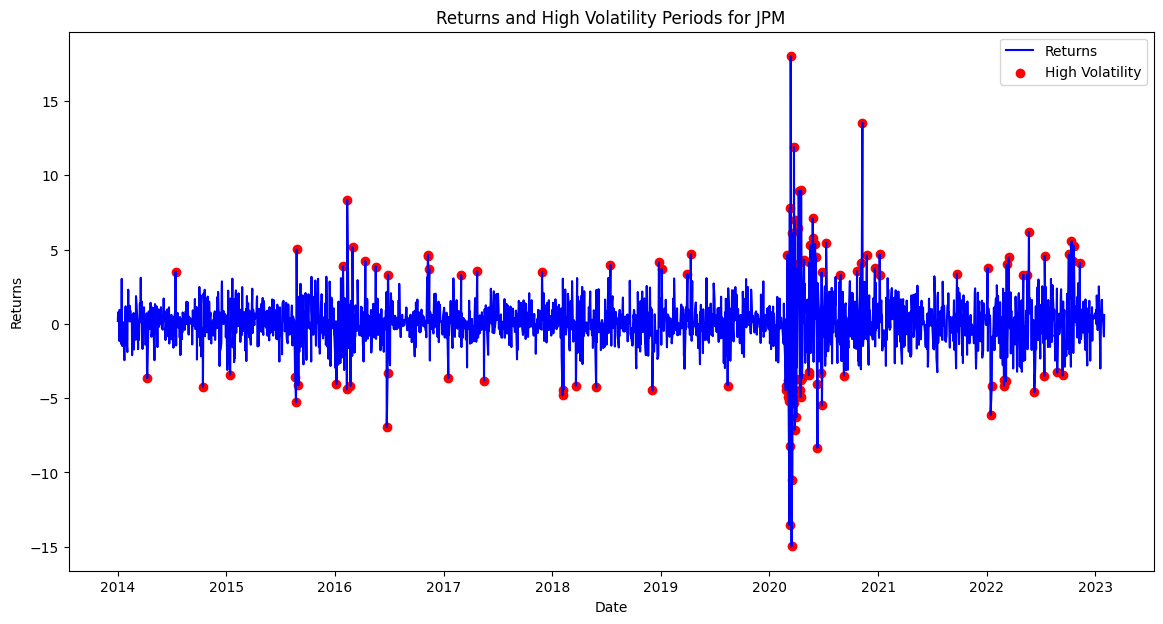

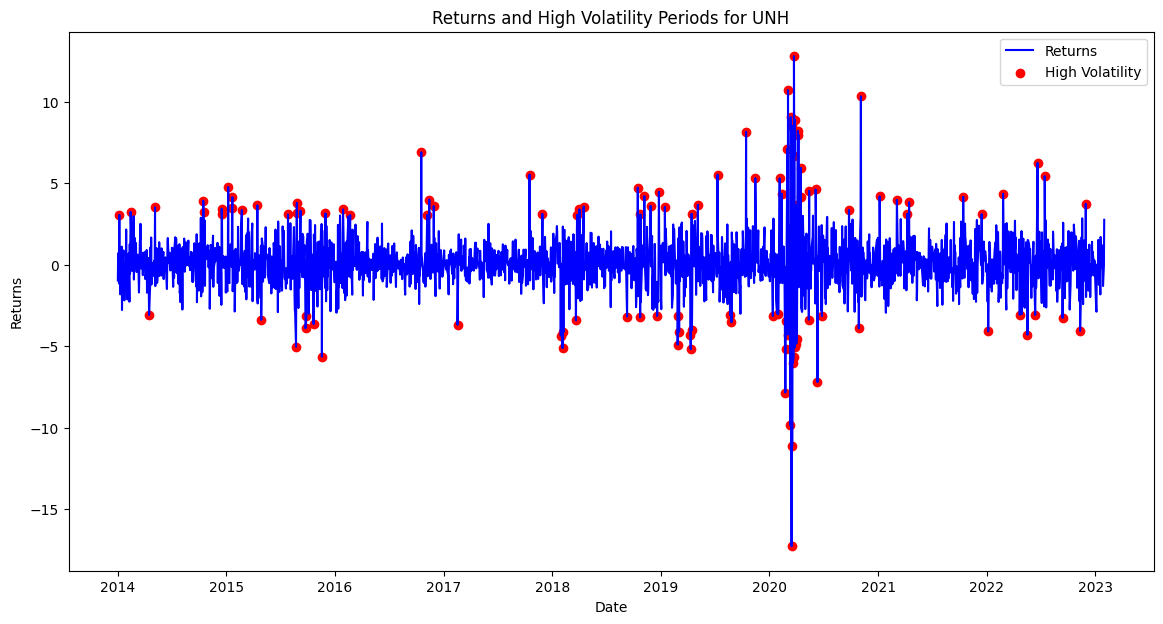

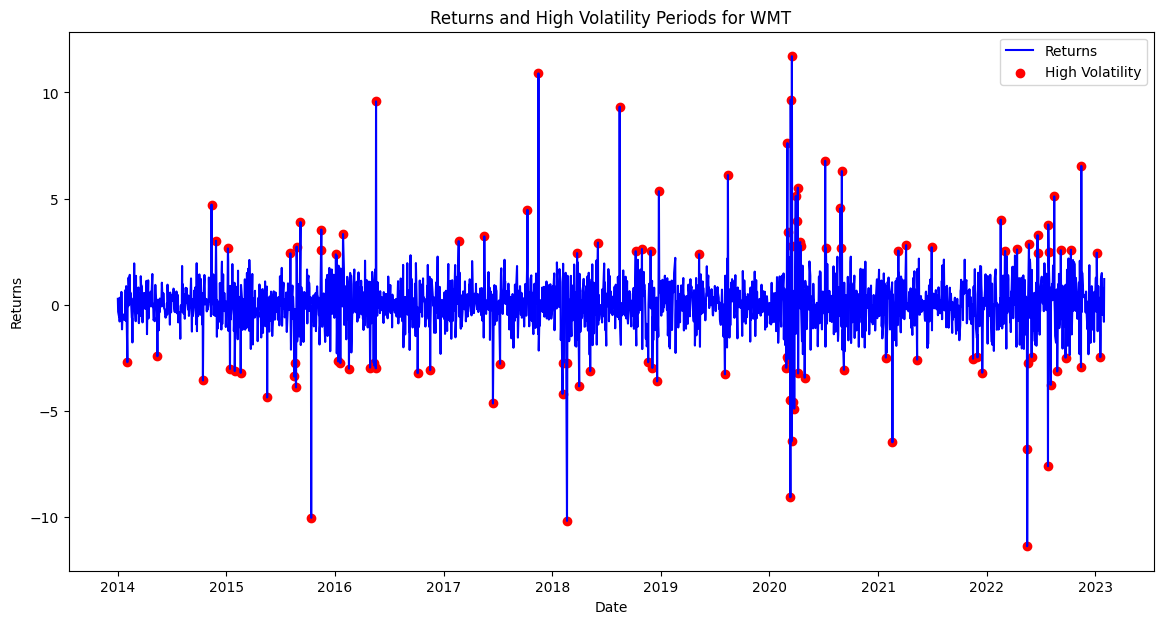

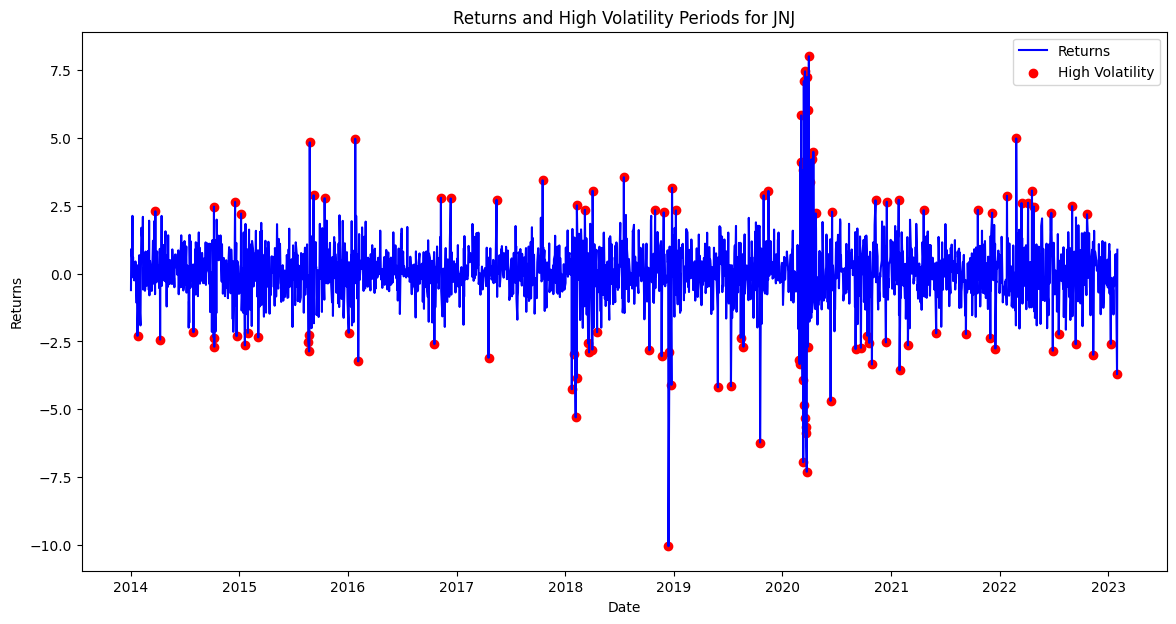

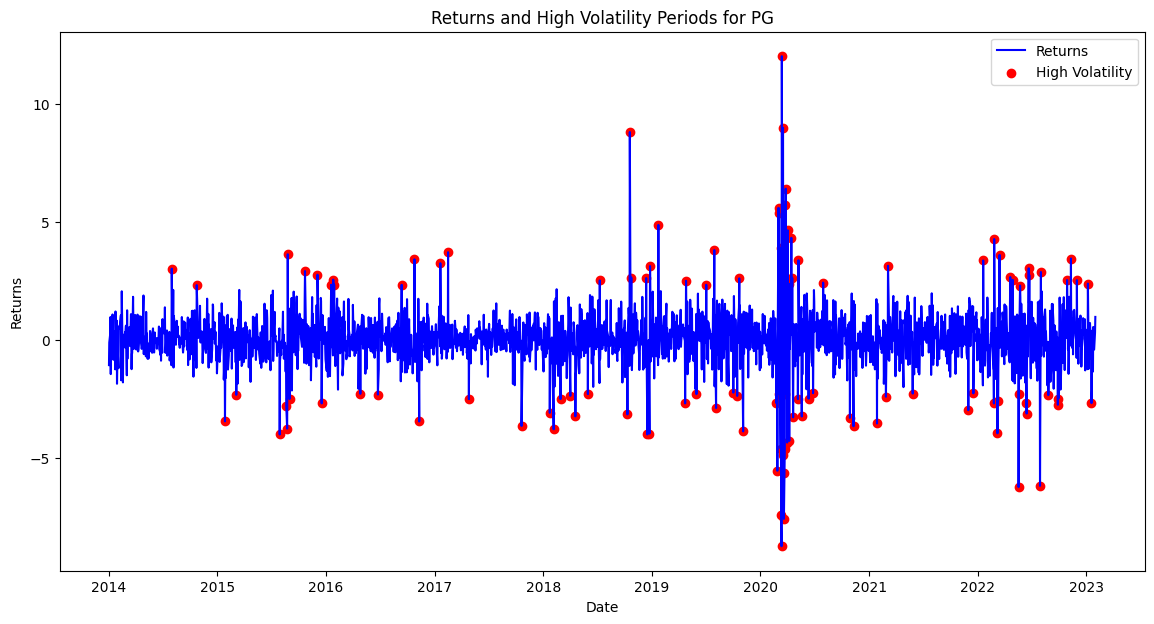

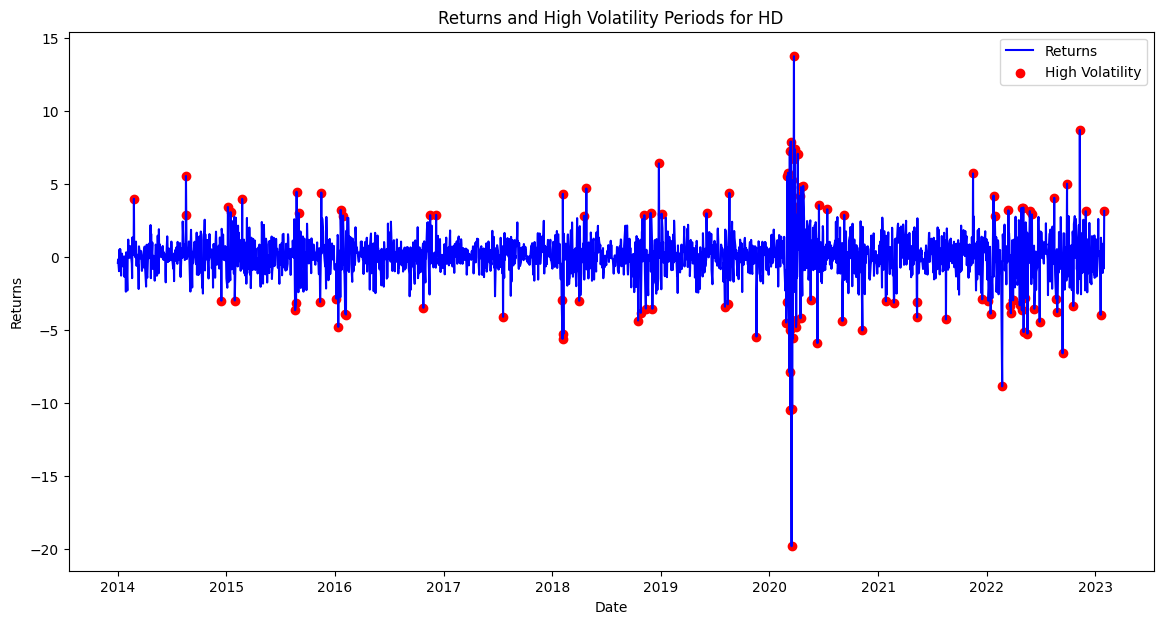

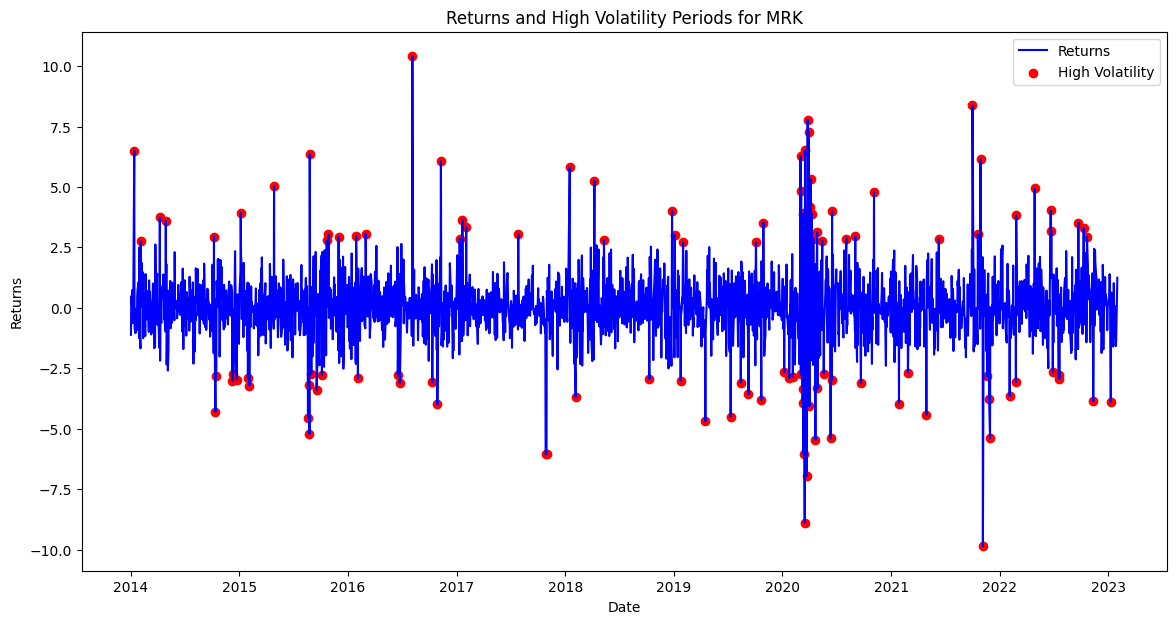

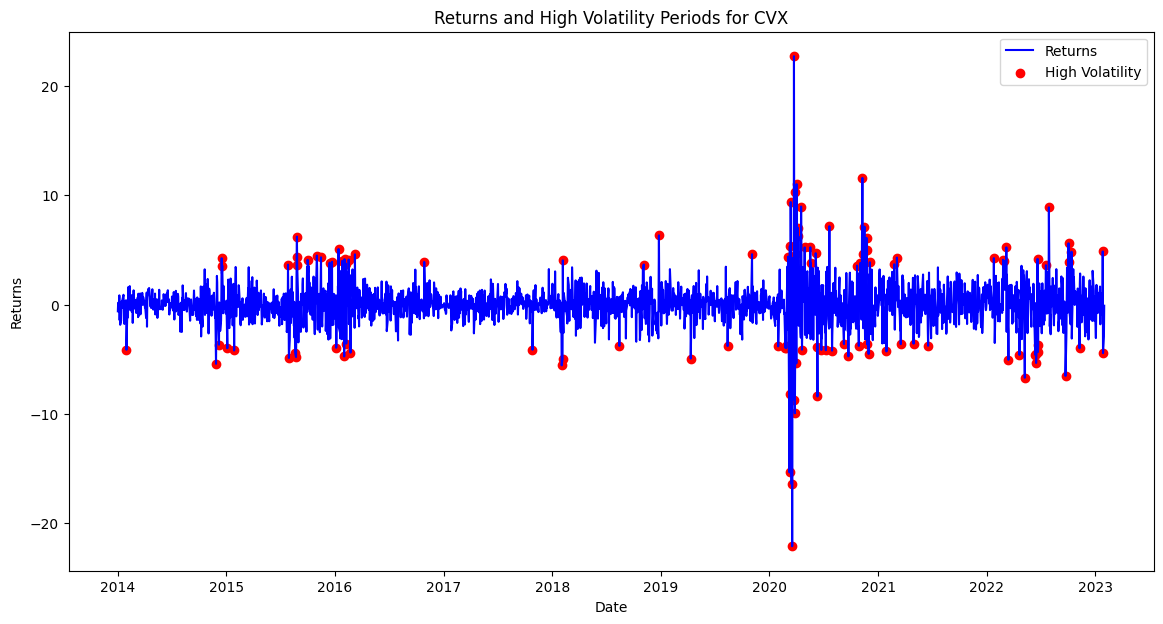

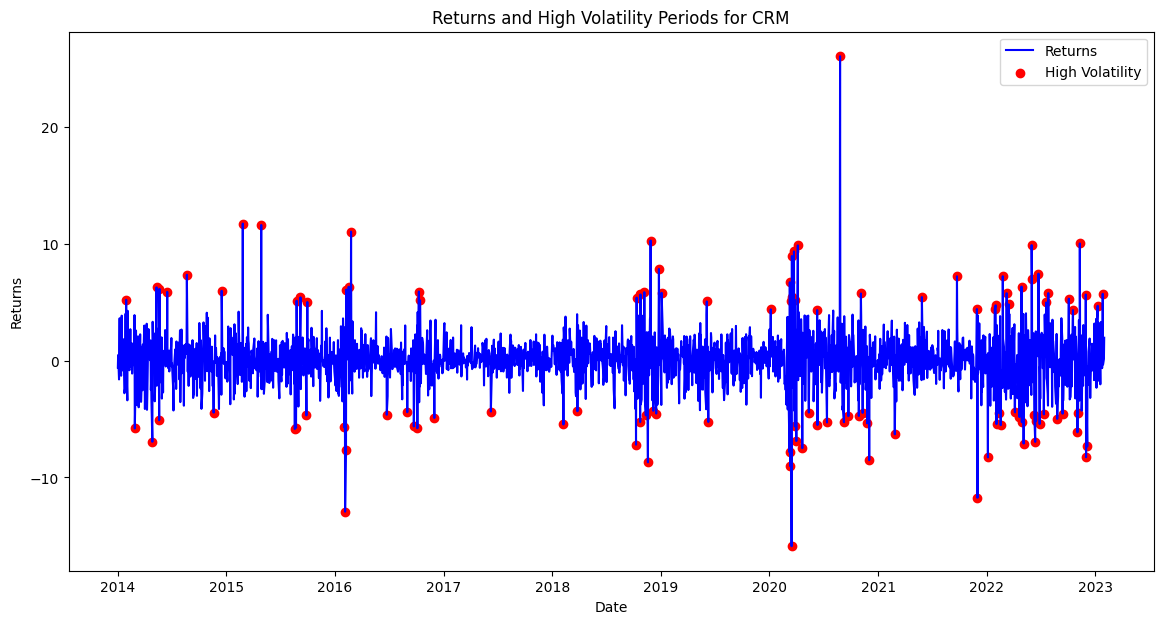

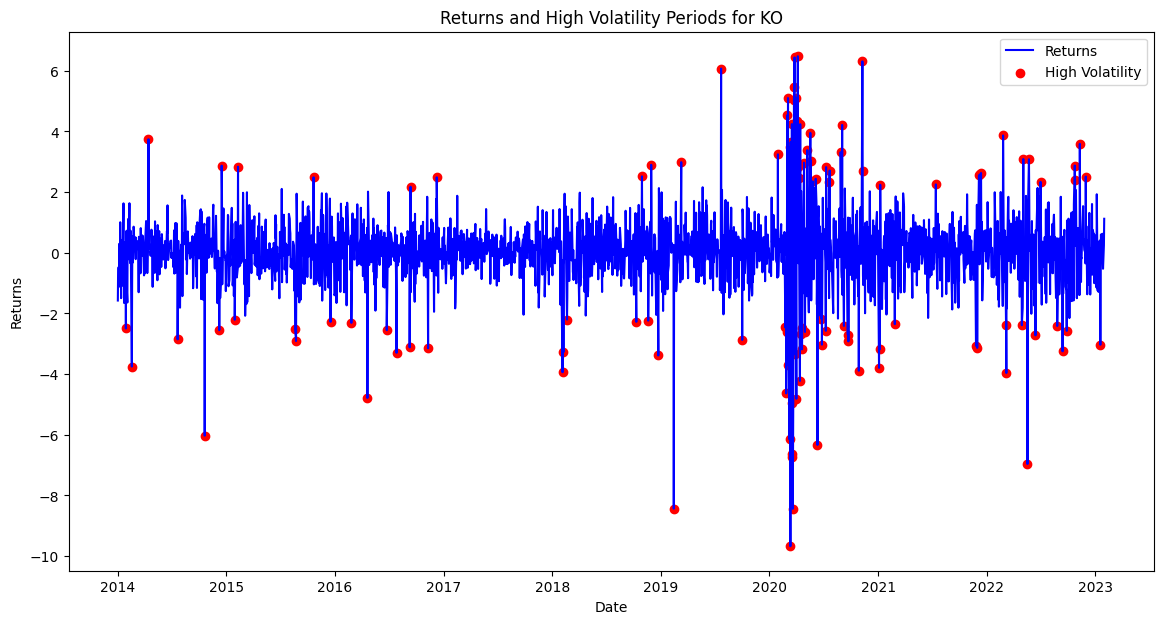

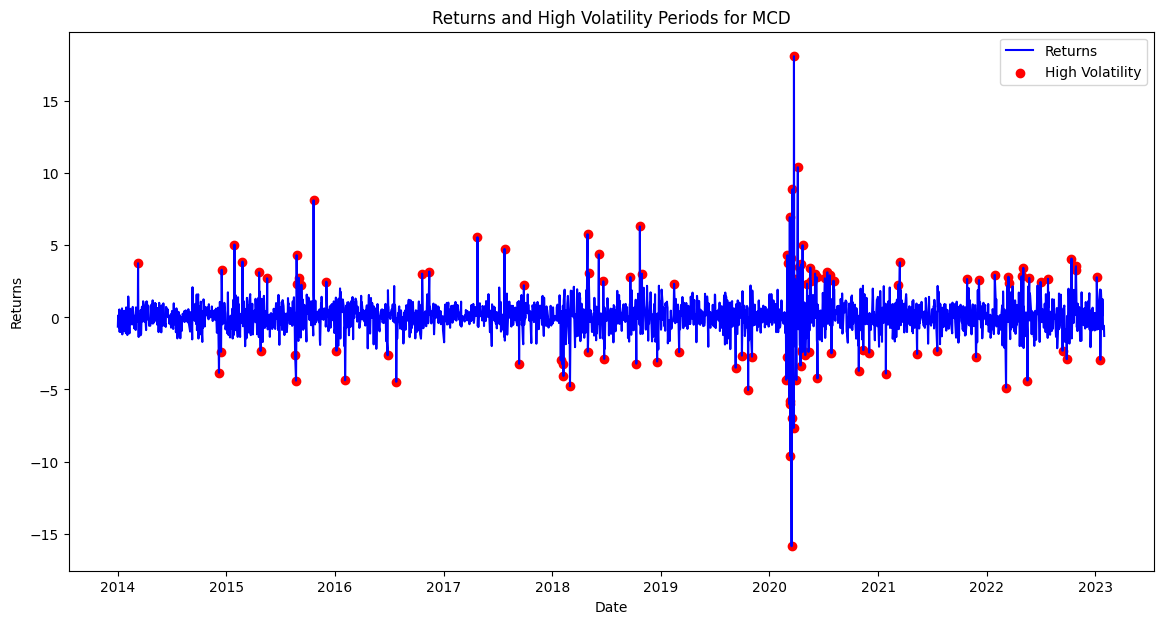

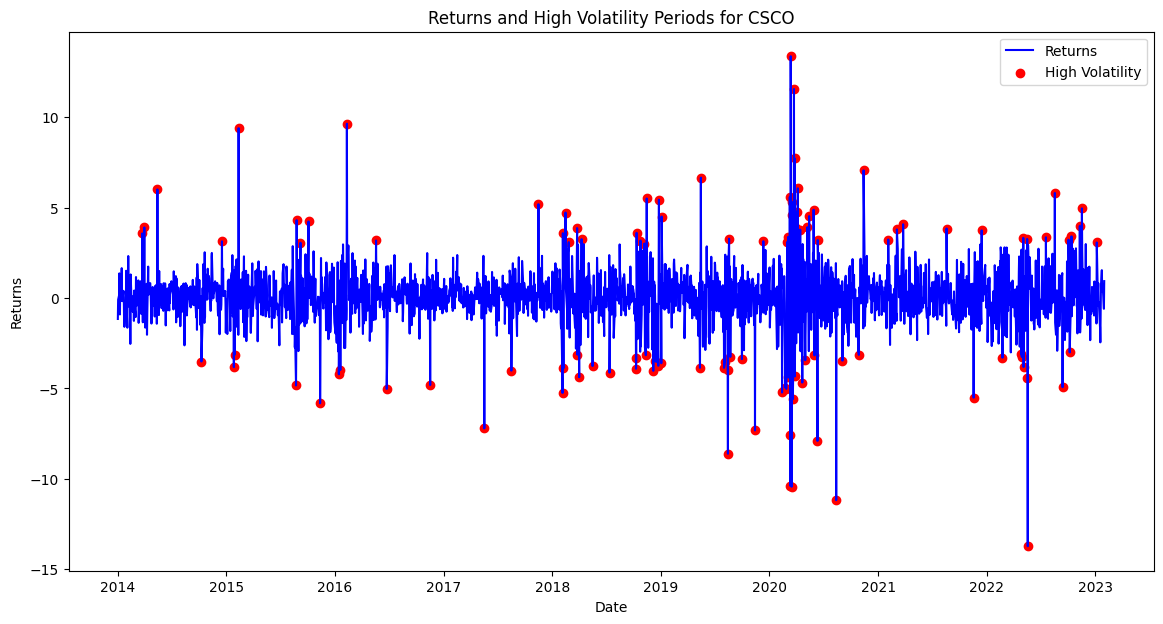

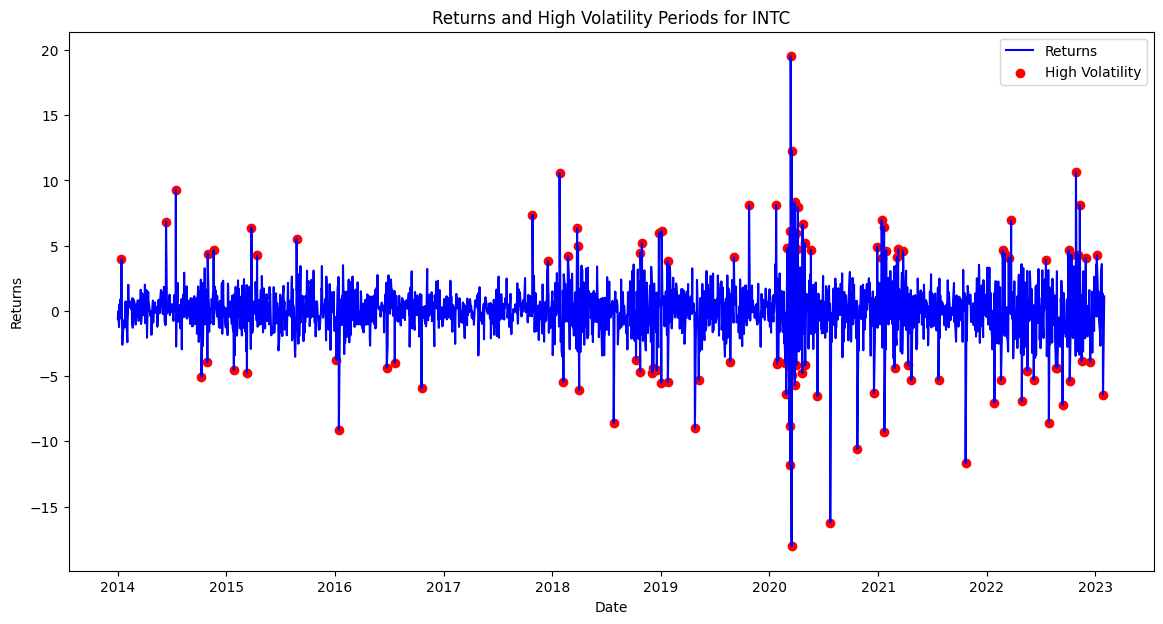

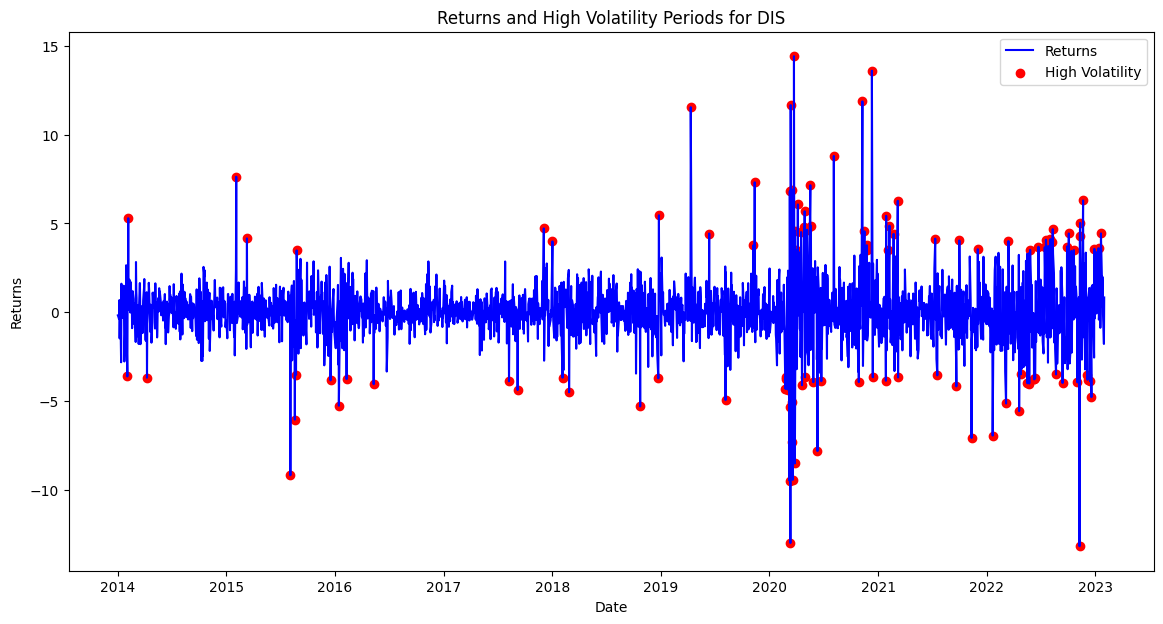

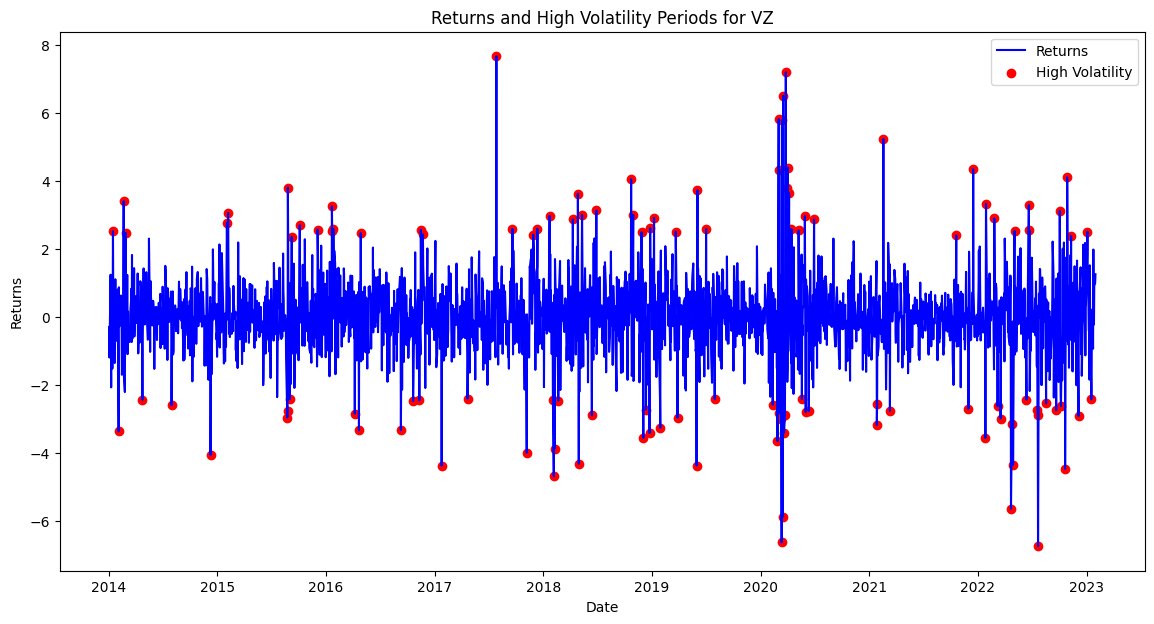

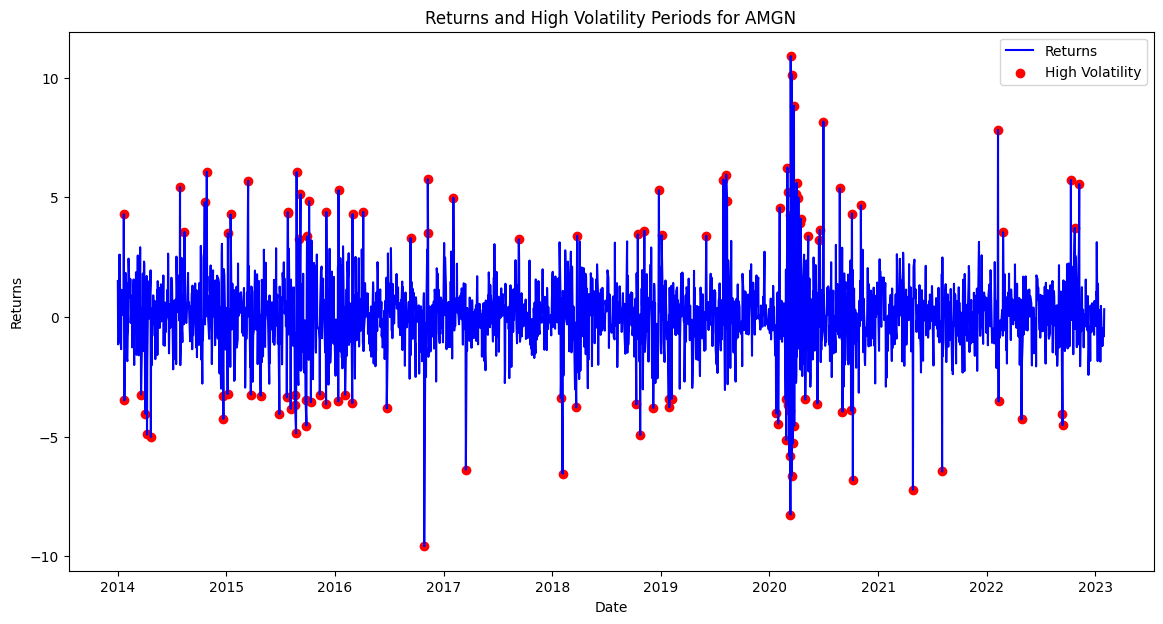

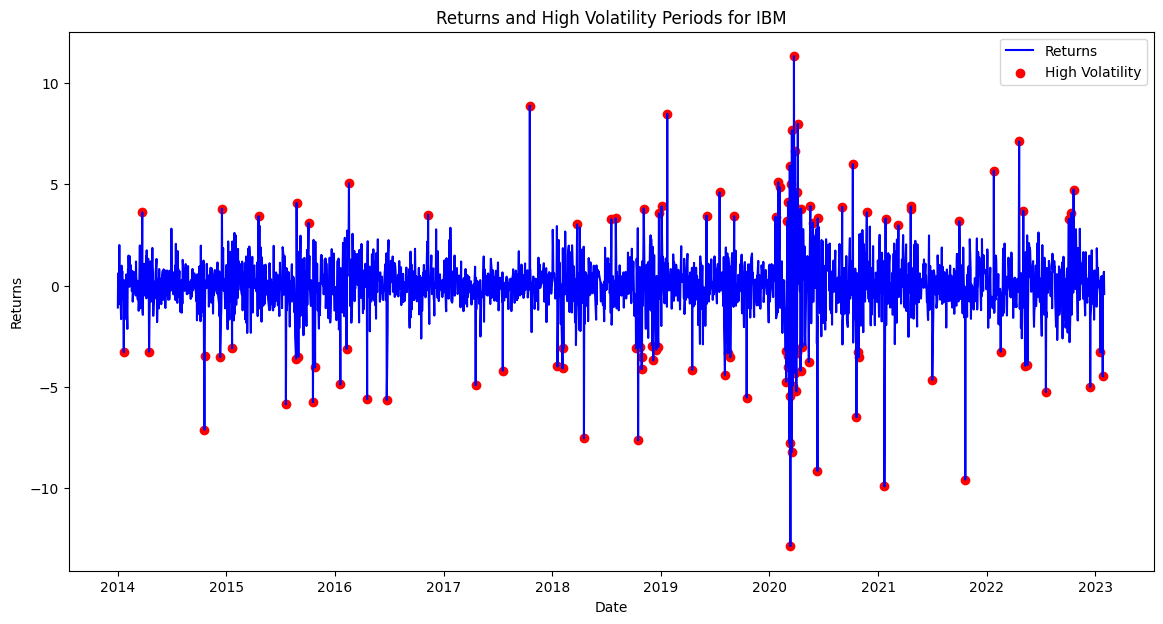

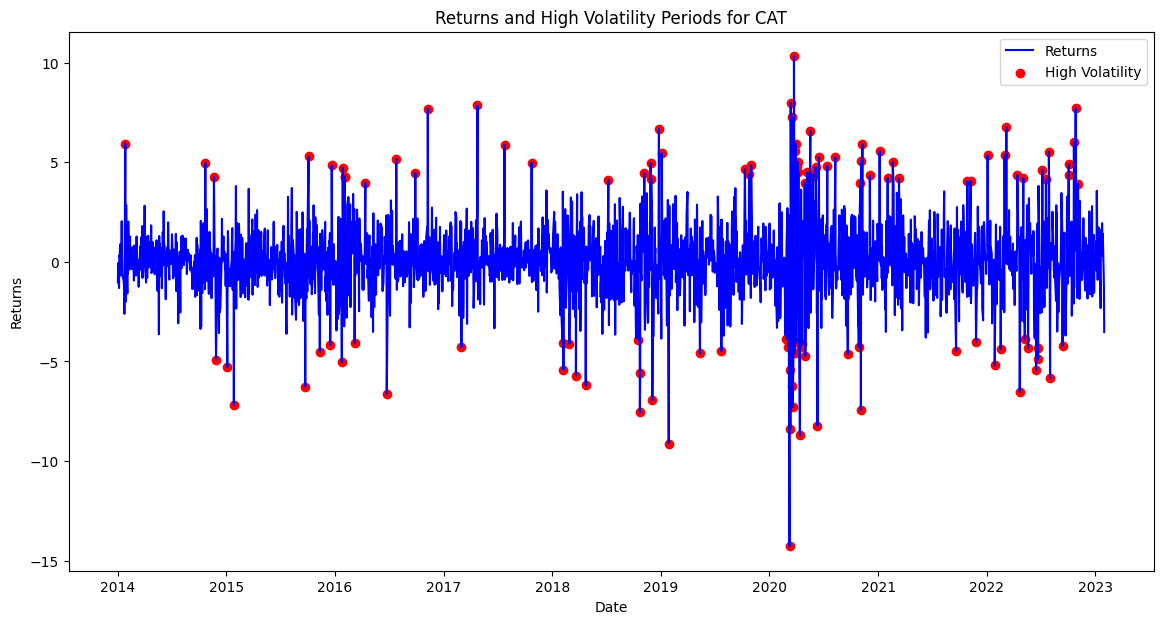

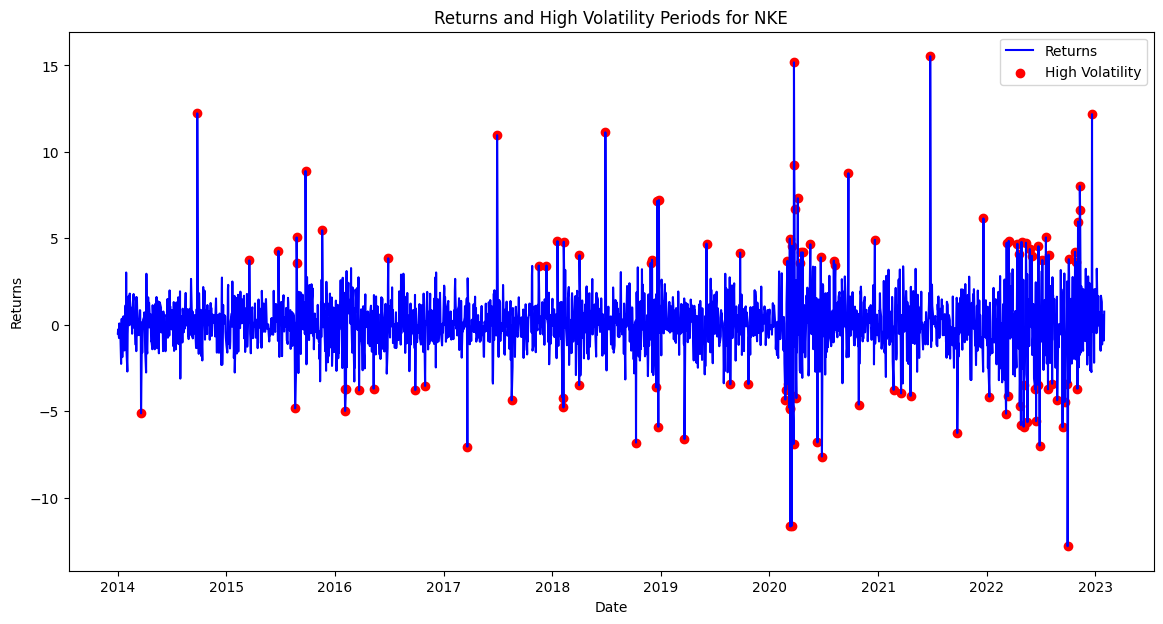

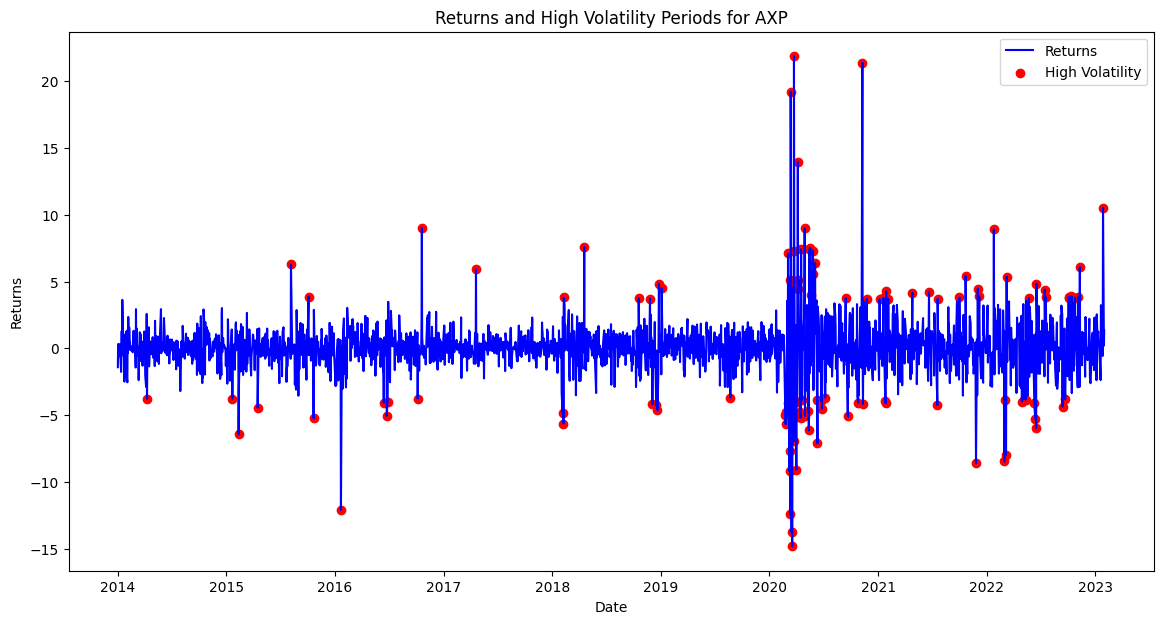

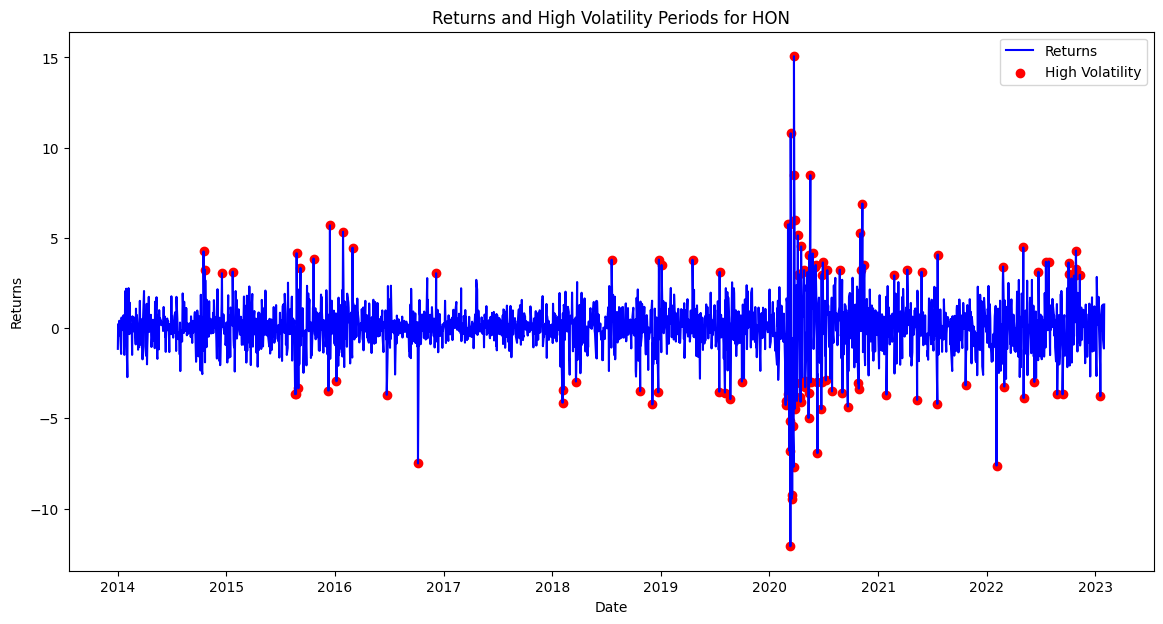

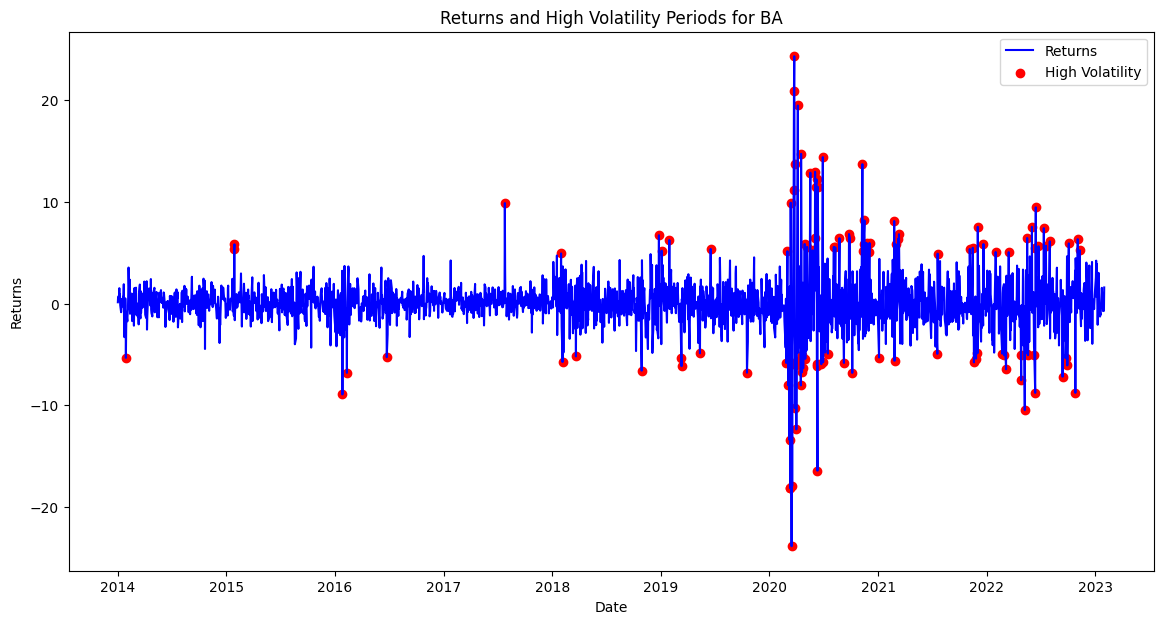

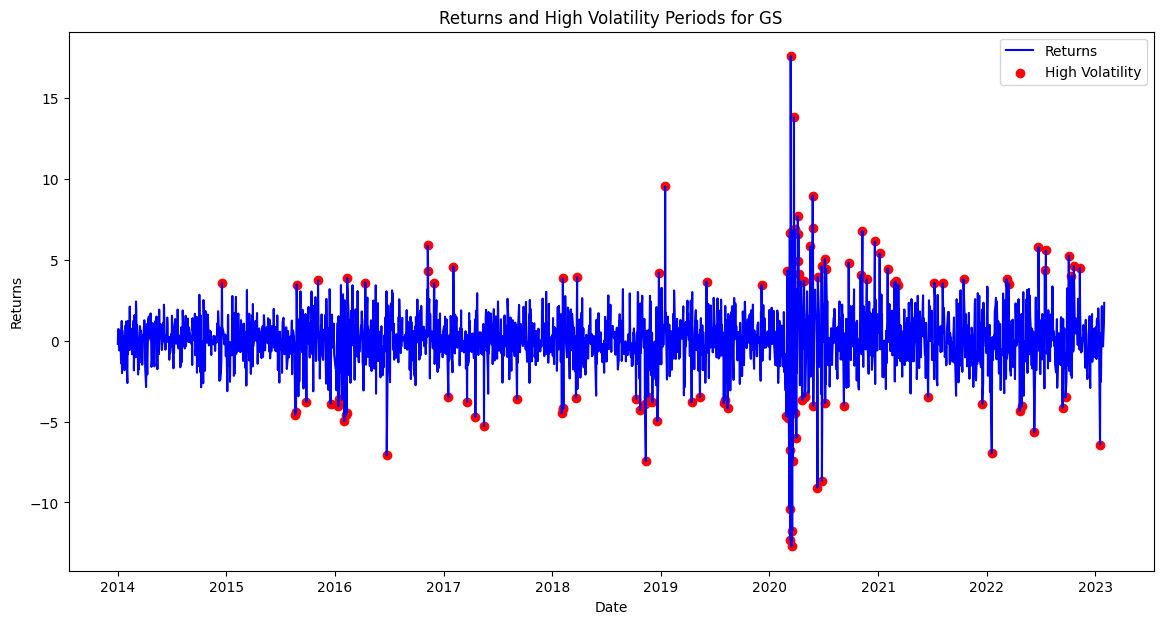

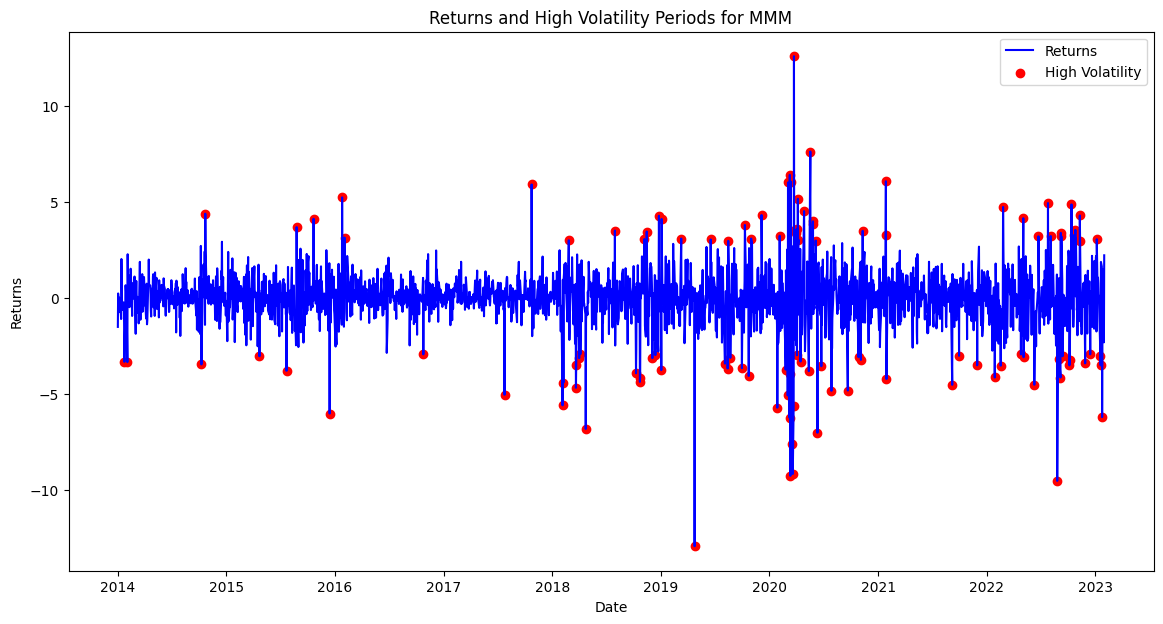

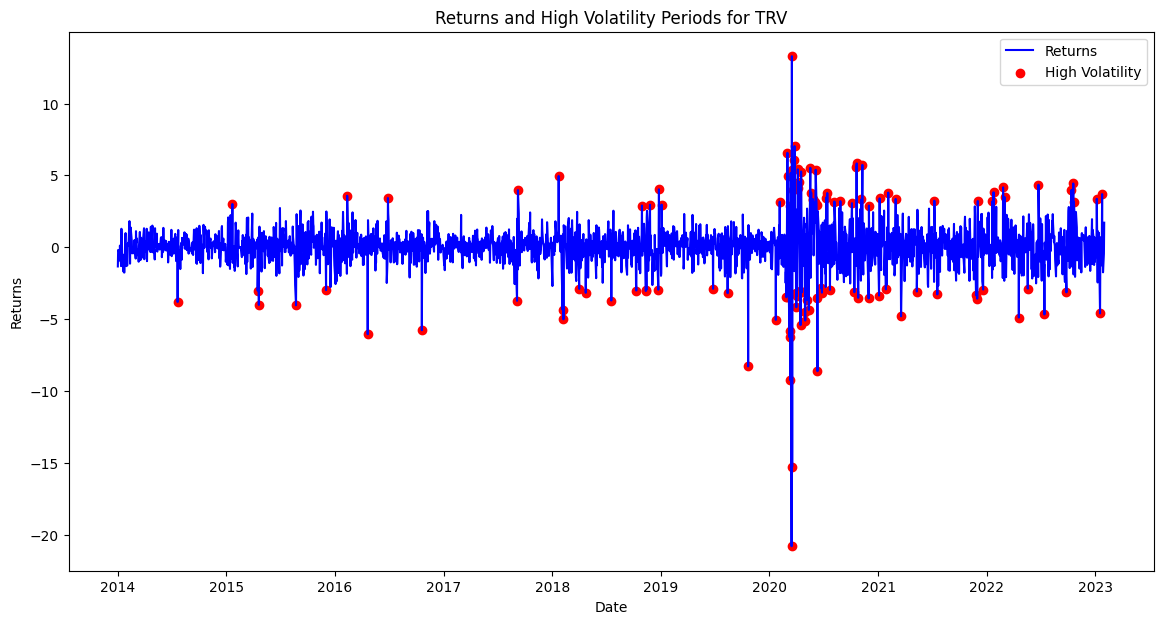

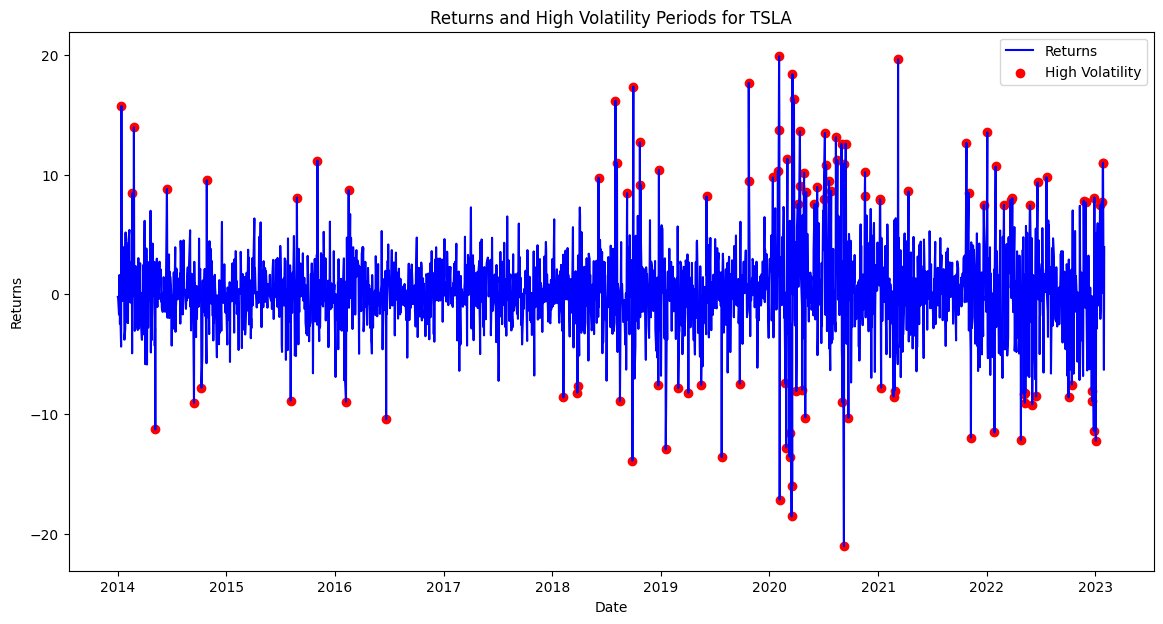

In [ ]:
# Loop through each unique ticker in the DataFrame
for ticker in df['ticker'].unique():
    # Select data for the current ticker
    ticker_data = df[df['ticker'] == ticker]

    # If the ticker has high volatility periods recorded, fetch them
    high_vol_data = high_volatility_periods.get(ticker, pd.DataFrame())

    # Create a plot for the ticker
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data['date'], ticker_data['returns'], label='Returns', color='blue')

    # If there are high volatility periods, plot them
    if not high_vol_data.empty:
        plt.scatter(high_vol_data['date'], high_vol_data['returns'], color='red', label='High Volatility', marker='o')

    plt.title(f'Returns and High Volatility Periods for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()


In [ ]:
post_covid_high_volatility_top5

Unnamed: 0        date  permno ticker      price      volume  \
date                                                                       
2020-03-10       22130  2020-03-10   14541    CVX   84.98000  22592128.0   
2020-03-10       44990  2020-03-10   18542    CAT  106.49000   8293227.0   
2020-03-10       56420  2020-03-10   86868     GS  184.35001   6803867.0   
2020-01-14       63240  2020-01-14   93436   TSLA  537.91998  28955735.0   
2020-03-03        3837  2020-03-03   14593   AAPL  289.32001  79720151.0   

              return       high        low       open   avg_price  \
date                                                                
2020-03-10  0.053428   86.30000   81.04000   86.24000   83.670000   
2020-03-10  0.023254  109.06000   99.11000  108.64000  104.085000   
2020-03-10  0.066779  185.39500  173.28500  181.62000  179.340000   
2020-01-14  0.024883  547.40997  524.90002  544.25500  536.154995   
2020-03-03 -0.031759  304.00000  285.79999  303.67001  294.899995   

                 mkt_cap  pct_return  ticker_attention  name_price_attention  \
date                                                                           
2020-03-10  1.597050e+08      5.3428             61.06                 61.38   
2020-03-10  5.857834e+07      2.3254             46.86                 70.55   
2020-03-10  6.372482e+07      6.6779             60.52                 77.00   
2020-01-14  9.739687e+07      2.4883             18.48                 17.28   
2020-03-03  1.265914e+09     -3.1759             59.16                 43.24   

            returns  volatility  High_Volatility  
date                                              
2020-03-10   5.3428    5.121053             True  
2020-03-10   2.3254    4.778657             True  
2020-03-10   6.6779    4.050774             True  
2020-01-14   2.4883    3.793798             True  
2020-03-03  -3.1759    3.784335             True

In [ ]:
pre_covid_high_volatility_top5

Unnamed: 0        date  permno ticker      price      volume  \
date                                                                       
2014-01-15       61731  2014-01-15   93436   TSLA  164.13000  20407704.0   
2019-04-26       58487  2019-04-26   22592    MMM  191.67000   4491273.0   
2016-01-25       48524  2016-01-25   59176    AXP   55.02000  18498255.0   
2014-09-29       45906  2014-09-29   57665    NKE   89.12000   7425478.0   
2019-04-15       35619  2019-04-15   26403    DIS  132.03999  32773740.0   

              return    high        low    open   avg_price       mkt_cap  \
date                                                                        
2014-01-15  0.017734  172.23  162.10001  168.45  167.165005  2.020293e+07   
2019-04-26  0.004981  192.25  189.36000  190.53  190.805000  1.103822e+08   
2016-01-25 -0.000726   55.77   54.14000   54.46   54.955000  5.415321e+07   
2014-09-29 -0.004246   90.10   88.27000   88.27   89.185000  6.155875e+07   
2019-04-15  0.015224  132.70  129.78999  131.05  131.244995  2.373579e+08   

            pct_return  ticker_attention  name_price_attention  returns  \
date                                                                      
2014-01-15      1.7734             10.00                  5.00   1.7734   
2019-04-26      0.4981             40.87                 21.12   0.4981   
2016-01-25     -0.0726             30.68                 10.92  -0.0726   
2014-09-29     -0.4246              5.40                  0.90  -0.4246   
2019-04-15      1.5224             39.44                 11.80   1.5224   

            volatility  High_Volatility  
date                                     
2014-01-15    5.041375             True  
2019-04-26    3.980878             True  
2016-01-25    3.826357             True  
2014-09-29    3.761732             True  
2019-04-15    3.577618             True

In [ ]:
df.head()

Unnamed: 0       date  permno ticker  price      volume    return  \
date                                                                            
2014-01-02           0 2014-01-02   10107   MSFT  37.16  30423757.0 -0.006683   
2014-01-03           1 2014-01-03   10107   MSFT  36.91  30944370.0 -0.006728   
2014-01-06           2 2014-01-06   10107   MSFT  36.13  43111355.0 -0.021133   
2014-01-07           3 2014-01-07   10107   MSFT  36.41  35478667.0  0.007750   
2014-01-08           4 2014-01-08   10107   MSFT  35.76  59452427.0 -0.017852   

             high    low    open  avg_price      mkt_cap  pct_return  \
date                                                                   
2014-01-02  37.40  37.10  37.350      37.25  308428000.0     -0.6683   
2014-01-03  37.22  36.60  37.200      36.91  306353000.0     -0.6728   
2014-01-06  36.89  36.11  36.850      36.50  299879000.0     -2.1133   
2014-01-07  36.49  36.21  36.325      36.35  302203000.0      0.7750   
2014-01-08  36.14  35.58  36.000      35.86  296808000.0     -1.7852   

            ticker_attention  name_price_attention  returns  volatility  \
date                                                                      
2014-01-02              3.25                  3.15  -0.6683    1.523906   
2014-01-03              3.38                  1.54  -0.6728    1.477227   
2014-01-06              4.03                  2.24  -2.1133    1.434310   
2014-01-07              4.94                  1.19   0.7750    1.521598   
2014-01-08              5.33                  1.68  -1.7852    1.473733   

            High_Volatility  squared_returns  
date                                          
2014-01-02            False         0.000045  
2014-01-03            False         0.000045  
2014-01-06            False         0.000447  
2014-01-07            False         0.000060  
2014-01-08            False         0.000319

In [ ]:
# Assuming your DataFrame is already loaded and contains pre-COVID and post-COVID data

# Define a function to calculate volatility measure (e.g., standard deviation of returns)
def calculate_volatility(returns_series):
    return returns_series.std()

# Split the dataset into pre-COVID and post-COVID periods
pre_covid_data = df[df['date'] < '2020-01-01']
post_covid_data = df[df['date'] >= '2020-01-01']

# Calculate volatility for each stock in pre-COVID period
pre_covid_volatility = pre_covid_data.groupby('ticker')['return'].apply(calculate_volatility)

# Calculate volatility for each stock in post-COVID period
post_covid_volatility = post_covid_data.groupby('ticker')['return'].apply(calculate_volatility)

# Rank the stocks based on volatility measure for each period
top_pre_covid_volatility = pre_covid_volatility.nlargest(5)
top_post_covid_volatility = post_covid_volatility.nlargest(5)

print("Top 5 Volatile Stocks Pre-COVID:")
print(top_pre_covid_volatility)

print("\nTop 5 Volatile Stocks Post-COVID:")
print(top_post_covid_volatility)


Top 5 Volatile Stocks Pre-COVID:
ticker
TSLA    0.028664
CRM     0.018836
CAT     0.016216
INTC    0.015779
BA      0.015325
Name: return, dtype: float64

Top 5 Volatile Stocks Post-COVID:
ticker
TSLA    0.045804
BA      0.037959
AXP     0.028543
CRM     0.027709
CVX     0.026599
Name: return, dtype: float64


In [ ]:
top_pre_covid_volatility

ticker
TSLA    0.028664
CRM     0.018836
CAT     0.016216
INTC    0.015779
BA      0.015325
Name: return, dtype: float64

In [ ]:
# Step 1: Calculate volatility using the standard deviation of returns
# Define a function to calculate volatility measure (standard deviation of returns)
def calculate_volatility(returns_series):
    return returns_series.std()

# Calculate volatility for a specific stock in the pre-COVID period
ticker = 'TSLA'  # Example stock ticker
pre_covid_data_tsla = pre_covid_data[pre_covid_data['ticker'] == ticker]
volatility_calculated = calculate_volatility(pre_covid_data_tsla['return'])

# Step 2: Check if the calculated volatility matches the value in the 'volatility' column
# Get the volatility value from the DataFrame
volatility_from_dataframe = pre_covid_data_tsla['volatility'].iloc[0]  # Assuming there's only one row for TSLA

# Compare the calculated volatility with the value from the DataFrame
if volatility_calculated == volatility_from_dataframe:
    print("The calculated volatility matches the value from the DataFrame.")
else:
    print("The calculated volatility does not match the value from the DataFrame.")



The calculated volatility does not match the value from the DataFrame.


In [ ]:
top_pre_covid_volatility

ticker
TSLA    6.893301
CRM     4.957090
MMM     3.980878
AAPL    3.861998
AXP     3.826357
Name: volatility, dtype: float64

In [ ]:
top_post_covid_volatility

ticker
BA      12.973025
CVX     10.428268
TSLA    10.009198
AXP      9.930714
INTC     9.257953
Name: volatility, dtype: float64

In [ ]:
#Currently moving with this

In [ ]:
# Assuming 'df' is your DataFrame containing the data
import pandas as pd

# Split the dataset into pre-COVID and post-COVID periods
pre_covid_data = df[df['date'] < '2020-01-01']
post_covid_data = df[df['date'] >= '2020-01-01']

# Calculate mean volatility before and after COVID-19
mean_pre_covid_volatility = pre_covid_data.groupby('ticker')['volatility'].mean()
mean_post_covid_volatility = post_covid_data.groupby('ticker')['volatility'].mean()

# Select top 5 volatile stocks before and after COVID-19 based on mean volatility
top_pre_covid_volatility = mean_pre_covid_volatility.nlargest(5)
top_post_covid_volatility = mean_post_covid_volatility.nlargest(5)

print("Top 5 Volatile Stocks Before COVID-19 (Based on Mean Volatility):")
print(top_pre_covid_volatility)

print("\nTop 5 Volatile Stocks After COVID-19 (Based on Mean Volatility):")
print(top_post_covid_volatility)


Top 5 Volatile Stocks Before COVID-19 (Based on Mean Volatility):
ticker
TSLA    2.604066
CRM     1.770994
CAT     1.597589
INTC    1.549979
AAPL    1.522579
Name: volatility, dtype: float64

Top 5 Volatile Stocks After COVID-19 (Based on Mean Volatility):
ticker
TSLA    3.976353
BA      3.039144
CRM     2.427382
AXP     2.336272
INTC    2.283602
Name: volatility, dtype: float64


In [ ]:
# Create DataFrames for the top 5 volatile stocks before and after COVID-19
pre_covid_top_stocks = pre_covid_data[pre_covid_data['ticker'].isin(top_pre_covid_volatility.index)]
post_covid_top_stocks = post_covid_data[post_covid_data['ticker'].isin(top_post_covid_volatility.index)]

print("DataFrame of Top 5 Volatile Stocks Before COVID-19:")
print(pre_covid_top_stocks.head())

print("\nDataFrame of Top 5 Volatile Stocks After COVID-19:")
print(post_covid_top_stocks.head())


DataFrame of Top 5 Volatile Stocks Before COVID-19:
            Unnamed: 0       date  permno ticker      price      volume  \
date                                                                      
2014-01-02        2286 2014-01-02   14593   AAPL  553.13000   8338094.0   
2014-01-03        2287 2014-01-03   14593   AAPL  540.97998  13992006.0   
2014-01-06        2288 2014-01-06   14593   AAPL  543.92999  14820614.0   
2014-01-07        2289 2014-01-07   14593   AAPL  540.03748  11381939.0   
2014-01-08        2290 2014-01-08   14593   AAPL  543.46002   9199689.0   

              return       high        low       open   avg_price  \
date                                                                
2014-01-02 -0.014064  557.03003  552.02100  555.67999  554.525515   
2014-01-03 -0.021966  553.70001  540.42999  552.85999  547.065000   
2014-01-06  0.005453  546.79999  533.59998  537.45001  540.199985   
2014-01-07 -0.007156  545.96002  537.92499  544.32001  541.942505   
2014-01-

In [ ]:
pre_covid_top_stocks.describe()

Unnamed: 0       permno        price        volume       return  \
count   7550.000000   7550.00000  7550.000000  7.550000e+03  7550.000000   
mean   33215.700000  55222.80000   136.598275  1.588654e+07     0.000879   
std    19903.486711  33759.65609    97.149623  1.673036e+07     0.019608   
min     2286.000000  14593.00000    23.520000  7.102770e+05    -0.139015   
25%    23237.250000  18542.00000    66.920000  4.351750e+06    -0.007887   
50%    32758.500000  59328.00000   111.035000  7.617812e+06     0.000735   
75%    44565.750000  90215.00000   185.147500  2.363867e+07     0.010223   
max    63231.000000  93436.00000   647.349980  1.898486e+08     0.176692   

              high          low         open    avg_price       mkt_cap  \
count  7550.000000  7550.000000  7550.000000  7550.000000  7.550000e+03   
mean    138.222376   134.838513   136.558319   136.530445  2.199275e+08   
std      98.453634    95.714935    97.087326    97.075293  2.788444e+08   
min      23.760000    23.500000    23.600000    23.630000  1.715150e+07   
25%      67.842500    66.112500    66.880000    66.910625  4.917065e+07   
50%     112.125000   109.695000   110.845000   110.785000  8.067736e+07   
75%     187.260000   182.484992   184.802507   185.271209  2.148731e+08   
max     651.260010   644.469970   649.900020   647.864990  1.288147e+09   

        pct_return  ticker_attention  name_price_attention      returns  \
count  7550.000000       7550.000000           7550.000000  7550.000000   
mean      0.087856         31.022356             10.304654     0.087856   
std       1.960756         19.631252             10.677028     1.960756   
min     -13.901500          1.080000              0.000000   -13.901500   
25%      -0.788675         13.200000              2.465000    -0.788675   
50%       0.073500         27.300000              7.560000     0.073500   
75%       1.022325         50.400000             15.300000     1.022325   
max      17.669200        100.000000            100.000000    17.669200   

        volatility  
count  7550.000000  
mean      1.809041  
std       0.706004  
min       0.839583  
25%       1.305258  
50%       1.634551  
75%       2.133503  
max       6.893301

In [ ]:
# Check the highest and lowest date
highest_date = pre_covid_top_stocks['date'].max()
lowest_date = pre_covid_top_stocks['date'].min()

# Get all unique tickers
unique_tickers = pre_covid_top_stocks['ticker'].unique()

print("Highest Date in pre_covid_top_stocks:", highest_date)
print("Lowest Date in pre_covid_top_stocks:", lowest_date)
print("All Unique Tickers in pre_covid_top_stocks:", unique_tickers)


Highest Date in pre_covid_top_stocks: 2019-12-31 00:00:00
Lowest Date in pre_covid_top_stocks: 2014-01-02 00:00:00
All Unique Tickers in pre_covid_top_stocks: ['AAPL' 'CRM' 'INTC' 'CAT' 'TSLA']


In [ ]:
# Check the highest and lowest date
highest_date = post_covid_top_stocks['date'].max()
lowest_date = post_covid_top_stocks['date'].min()

# Get all unique tickers
unique_tickers = pre_covid_top_stocks['ticker'].unique()

print("Highest Date in post_covid_top_stocks:", highest_date)
print("Lowest Date in post_covid_top_stocks:", lowest_date)
print("All Unique Tickers in post_covid_top_stocks:", unique_tickers)


Highest Date in post_covid_top_stocks: 2023-01-31 00:00:00
Lowest Date in post_covid_top_stocks: 2020-01-02 00:00:00
All Unique Tickers in post_covid_top_stocks: ['AAPL' 'CRM' 'INTC' 'CAT' 'TSLA']


In [ ]:
## Data Cleaning

In [ ]:
pre_covid_top_stocks.head()

ticker      price      volume    return       high        low  \
date                                                                       
2014-01-02   AAPL  553.13000   8338094.0 -0.014064  557.03003  552.02100   
2014-01-03   AAPL  540.97998  13992006.0 -0.021966  553.70001  540.42999   
2014-01-06   AAPL  543.92999  14820614.0  0.005453  546.79999  533.59998   
2014-01-07   AAPL  540.03748  11381939.0 -0.007156  545.96002  537.92499   
2014-01-08   AAPL  543.46002   9199689.0  0.006338  545.56000  538.69000   

                 open   avg_price       mkt_cap  pct_return  ticker_attention  \
date                                                                            
2014-01-02  555.67999  554.525515  4.936392e+08     -1.4064             16.43   
2014-01-03  552.85999  547.065000  4.827960e+08     -2.1966             18.02   
2014-01-06  537.45001  540.199985  4.854287e+08      0.5453             18.55   
2014-01-07  544.32001  541.942505  4.819548e+08     -0.7156             15.90   
2014-01-08  538.81000  542.125000  4.850093e+08      0.6338             15.37   

            name_price_attention  volatility  High_Volatility  
date                                                           
2014-01-02                   4.4    1.892723            False  
2014-01-03                   4.2    1.858734            False  
2014-01-06                   4.5    1.897441            False  
2014-01-07                   4.7    1.816480            False  
2014-01-08                   5.0    1.750521            False

In [ ]:
# Drop one of the date columns
pre_covid_top_stocks.drop('date', axis=1, inplace=True)


<ipython-input-87-b01c01ce46d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_top_stocks.drop('date', axis=1, inplace=True)


In [ ]:
# Check the data types of the 'return' columns
print(pre_covid_top_stocks['return'].dtype)
print(pre_covid_top_stocks['returns'].dtype)

# Check the scale of the values in the 'return' columns
print(pre_covid_top_stocks['return'].describe())
print(pre_covid_top_stocks['returns'].describe())


float64
float64
count    7550.000000
mean        0.000879
std         0.019608
min        -0.139015
25%        -0.007887
50%         0.000735
75%         0.010223
max         0.176692
Name: return, dtype: float64
count    7550.000000
mean        0.087856
std         1.960756
min       -13.901500
25%        -0.788675
50%         0.073500
75%         1.022325
max        17.669200
Name: returns, dtype: float64


In [ ]:
pre_covid_top_stocks['returns'] /= 100


<ipython-input-92-6ae8b8669537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_top_stocks['returns'] /= 100


In [ ]:
pre_covid_top_stocks.drop('returns', axis=1, inplace=True)


<ipython-input-95-4cab9b227140>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_top_stocks.drop('returns', axis=1, inplace=True)


In [ ]:
pre_covid_top_stocks.drop(columns=['Unnamed: 0'], inplace=True)

<ipython-input-72-6450a023bd16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_top_stocks.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
pre_covid_top_stocks.drop(columns=['permno'], inplace=True)

<ipython-input-74-e59c40d6684b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_covid_top_stocks.drop(columns=['permno'], inplace=True)


In [ ]:
# Check for null values in the pre_covid_top_stocks DataFrame
null_values = pre_covid_top_stocks.isnull().sum()

# Display the count of null values for each column
print("Null Values in pre_covid_top_stocks DataFrame:")
print(null_values)


Null Values in pre_covid_top_stocks DataFrame:
date                    0
ticker                  0
price                   0
volume                  0
return                  0
high                    0
low                     0
open                    0
avg_price               0
mkt_cap                 0
pct_return              0
ticker_attention        0
name_price_attention    0
returns                 0
volatility              0
High_Volatility         0
dtype: int64


In [ ]:
post_covid_top_stocks.drop(columns=['Unnamed: 0'], inplace=True)

<ipython-input-78-ab4697fc8756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_covid_top_stocks.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
post_covid_top_stocks['returns'] /= 100


<ipython-input-98-eee48179b102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_covid_top_stocks['returns'] /= 100


In [ ]:
post_covid_top_stocks.drop('returns', axis=1, inplace=True)


<ipython-input-99-290992c599f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_covid_top_stocks.drop('returns', axis=1, inplace=True)


In [ ]:
post_covid_top_stocks.drop(columns=['permno'], inplace=True)

<ipython-input-79-bea45020e916>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_covid_top_stocks.drop(columns=['permno'], inplace=True)


In [ ]:
post_covid_top_stocks.head()

date ticker      price     volume    return       high  \
date                                                                      
2020-01-02 2020-01-02    CRM  166.99001  5094557.0  0.026746  167.07001   
2020-01-03 2020-01-03    CRM  166.17000  3205583.0 -0.004911  166.77000   
2020-01-06 2020-01-06    CRM  173.45000  8843581.0  0.043811  173.67000   
2020-01-07 2020-01-07    CRM  176.00000  8310525.0  0.014702  176.87000   
2020-01-08 2020-01-08    CRM  177.33000  7226234.0  0.007557  178.85001   

               low    open   avg_price       mkt_cap  pct_return  \
date                                                               
2020-01-02  163.58  163.92  165.325005  1.481201e+08      2.6746   
2020-01-03  165.00  165.06  165.885000  1.473928e+08     -0.4911   
2020-01-06  164.45  165.00  169.060000  1.538502e+08      4.3811   
2020-01-07  172.09  173.23  174.480000  1.561120e+08      1.4702   
2020-01-08  174.75  175.23  176.800005  1.572917e+08      0.7557   

            ticker_attention  name_price_attention  volatility  \
date                                                             
2020-01-02             48.91                  14.1    1.090864   
2020-01-03             58.29                  13.8    1.309936   
2020-01-06             54.94                   7.2    1.272252   
2020-01-07             61.64                   0.0    1.771105   
2020-01-08             64.32                   9.0    1.742628   

            High_Volatility  
date                         
2020-01-02            False  
2020-01-03            False  
2020-01-06            False  
2020-01-07            False  
2020-01-08            False

In [ ]:
# Check for null values in the pre_covid_top_stocks DataFrame
null_values = post_covid_top_stocks.isnull().sum()

# Display the count of null values for each column
print("Null Values in post_covid_top_stocks DataFrame:")
print(null_values)


Null Values in post_covid_top_stocks DataFrame:
date                    0
ticker                  0
price                   0
volume                  0
return                  0
high                    0
low                     0
open                    0
avg_price               0
mkt_cap                 0
pct_return              0
ticker_attention        0
name_price_attention    0
returns                 0
volatility              0
High_Volatility         0
dtype: int64


In [ ]:
## Data Visualisation

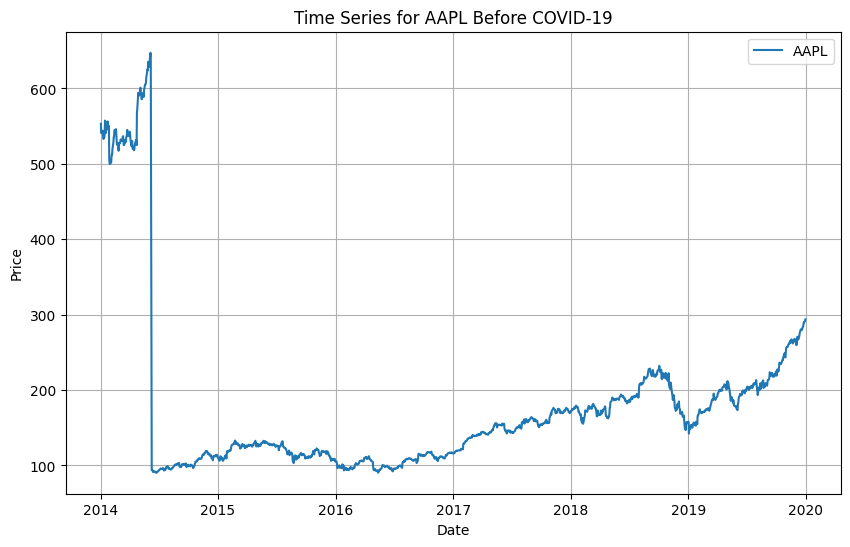

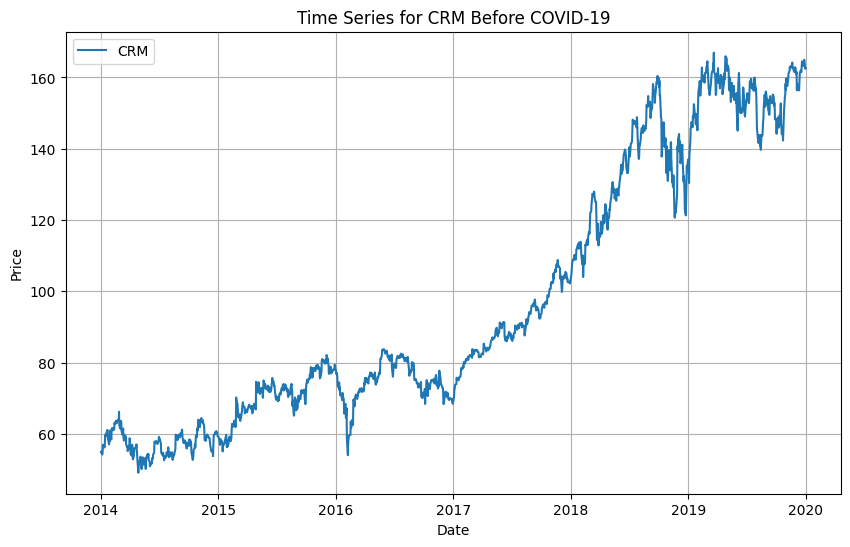

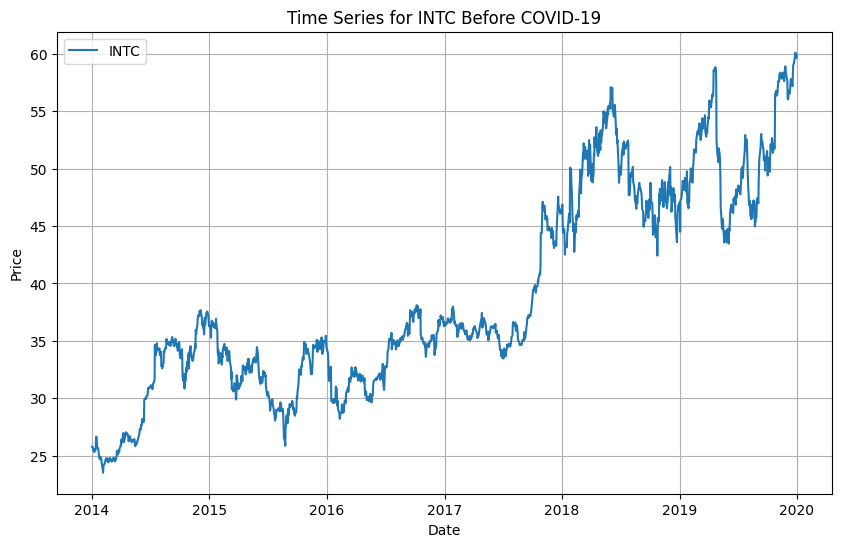

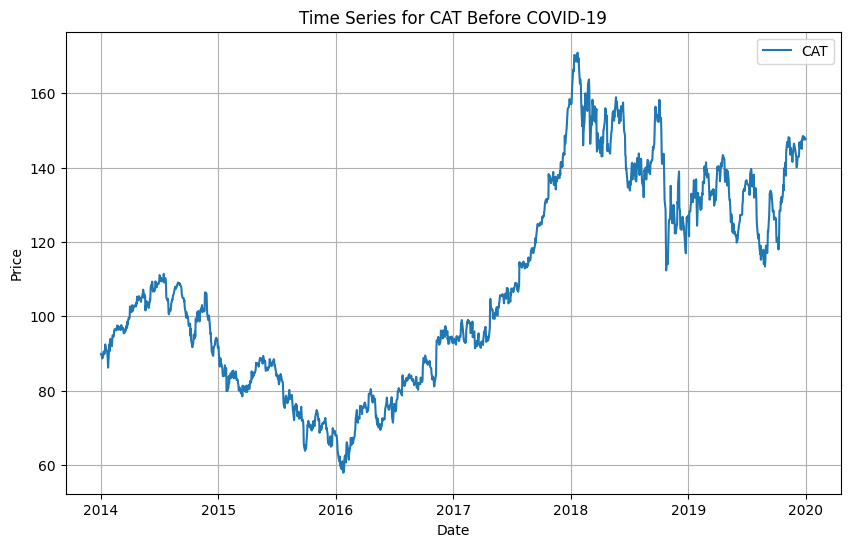

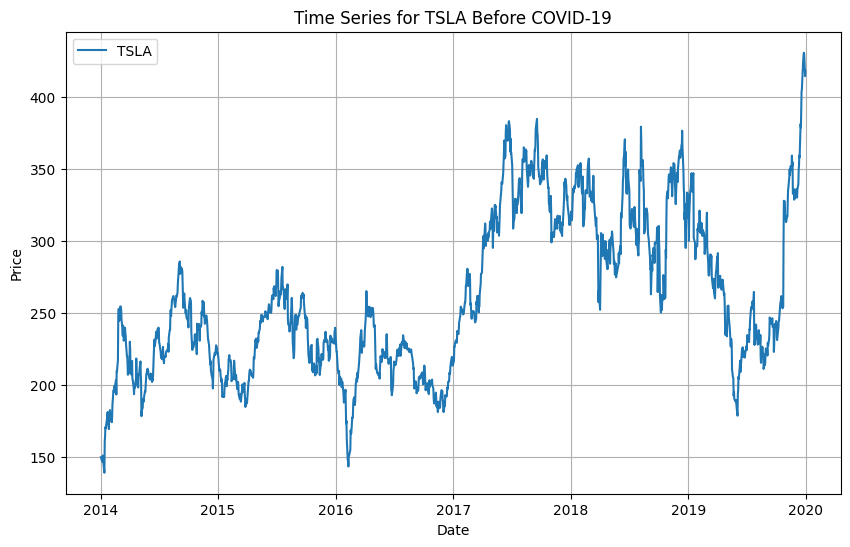

In [ ]:
import matplotlib.pyplot as plt

# Iterate over each unique stock ticker
for ticker in pre_covid_top_stocks['ticker'].unique():
    # Extract data for the current stock ticker
    stock_data = pre_covid_top_stocks[pre_covid_top_stocks['ticker'] == ticker]

    # Plot the time series for the current stock
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    plt.plot(stock_data.index, stock_data['price'], label=ticker)  # Assuming 'price' is the column to plot
    plt.title(f"Time Series for {ticker} Before COVID-19")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()


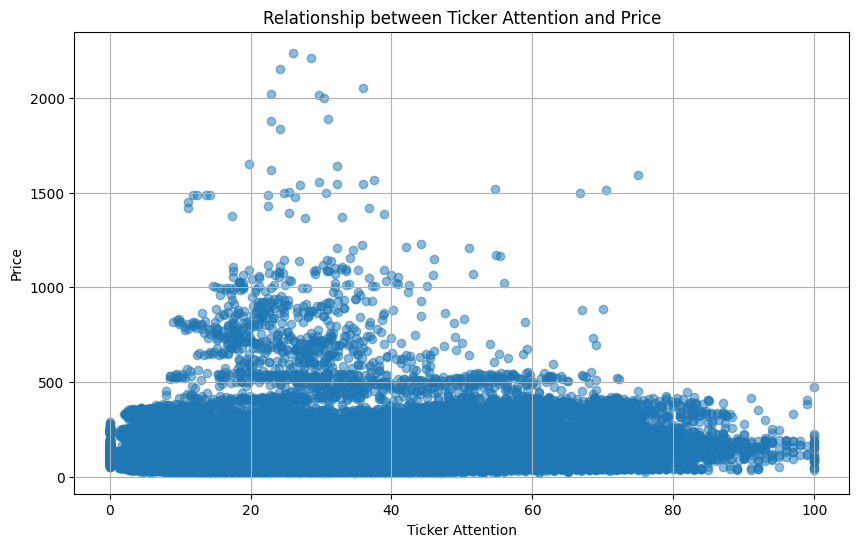

In [ ]:
import matplotlib.pyplot as plt

# Plotting the relationship between 'ticker_attention' and 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df['ticker_attention'], df['price'], alpha=0.5)
plt.title('Relationship between Ticker Attention and Price')
plt.xlabel('Ticker Attention')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [ ]:
pre_covid_top_stocks.head(10)

ticker      price      volume    return       high        low  \
date                                                                       
2014-01-02   AAPL  553.13000   8338094.0 -0.014064  557.03003  552.02100   
2014-01-03   AAPL  540.97998  13992006.0 -0.021966  553.70001  540.42999   
2014-01-06   AAPL  543.92999  14820614.0  0.005453  546.79999  533.59998   
2014-01-07   AAPL  540.03748  11381939.0 -0.007156  545.96002  537.92499   
2014-01-08   AAPL  543.46002   9199689.0  0.006338  545.56000  538.69000   
2014-01-09   AAPL  536.51898   9938497.0 -0.012772  546.85999  535.35010   
2014-01-10   AAPL  532.94000  10839168.0 -0.006671  540.79999  531.10999   
2014-01-13   AAPL  535.72998  13474914.0  0.005235  542.50000  529.88000   
2014-01-14   AAPL  546.39001  12687522.0  0.019898  546.72998  537.65997   
2014-01-15   AAPL  557.35999  14026613.0  0.020077  560.20001  551.65997   

                 open   avg_price       mkt_cap  pct_return  ticker_attention  \
date                                                                            
2014-01-02  555.67999  554.525515  4.936392e+08     -1.4064             16.43   
2014-01-03  552.85999  547.065000  4.827960e+08     -2.1966             18.02   
2014-01-06  537.45001  540.199985  4.854287e+08      0.5453             18.55   
2014-01-07  544.32001  541.942505  4.819548e+08     -0.7156             15.90   
2014-01-08  538.81000  542.125000  4.850093e+08      0.6338             15.37   
2014-01-09  546.79999  541.105045  4.788148e+08     -1.2772             16.96   
2014-01-10  539.83002  535.954990  4.753766e+08     -0.6671             16.43   
2014-01-13  529.90997  536.190000  4.778652e+08      0.5235             15.37   
2014-01-14  538.21997  542.194975  4.873739e+08      1.9898             17.49   
2014-01-15  553.52002  555.929990  4.971590e+08      2.0077             21.73   

            name_price_attention  volatility  High_Volatility  
date                                                           
2014-01-02                   4.4    1.892723            False  
2014-01-03                   4.2    1.858734            False  
2014-01-06                   4.5    1.897441            False  
2014-01-07                   4.7    1.816480            False  
2014-01-08                   5.0    1.750521            False  
2014-01-09                   4.3    1.681487            False  
2014-01-10                   5.8    1.657192            False  
2014-01-13                   4.6    1.600626            False  
2014-01-14                   4.4    1.538628            False  
2014-01-15                   5.4    1.580765            False

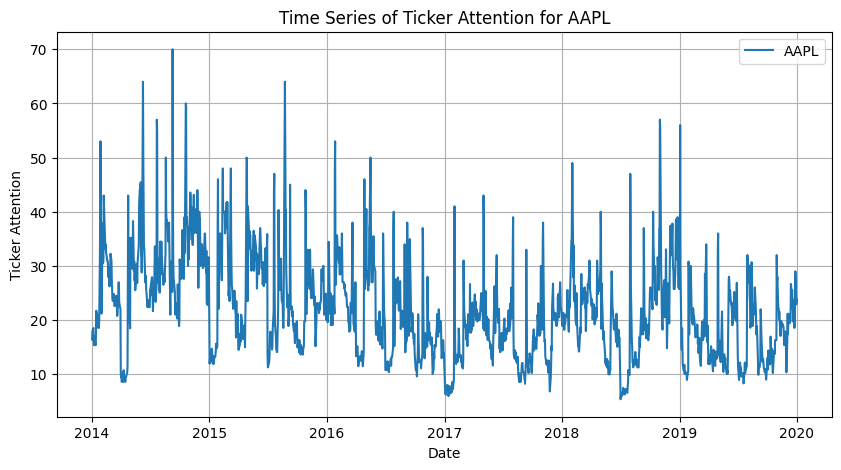

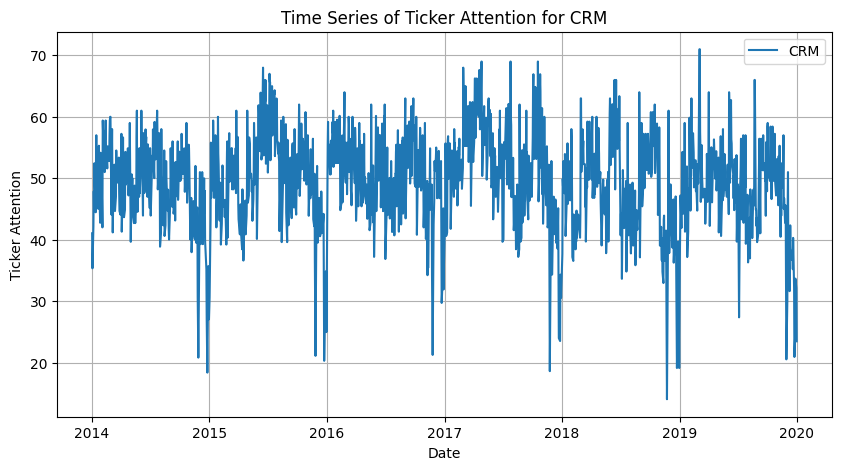

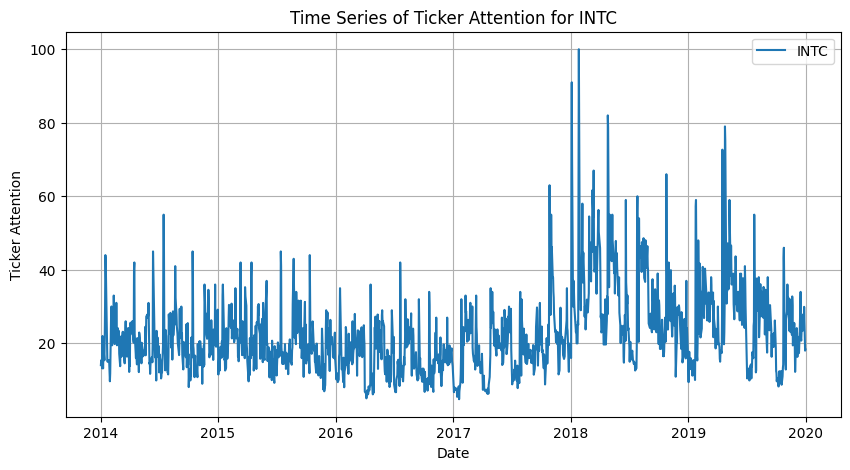

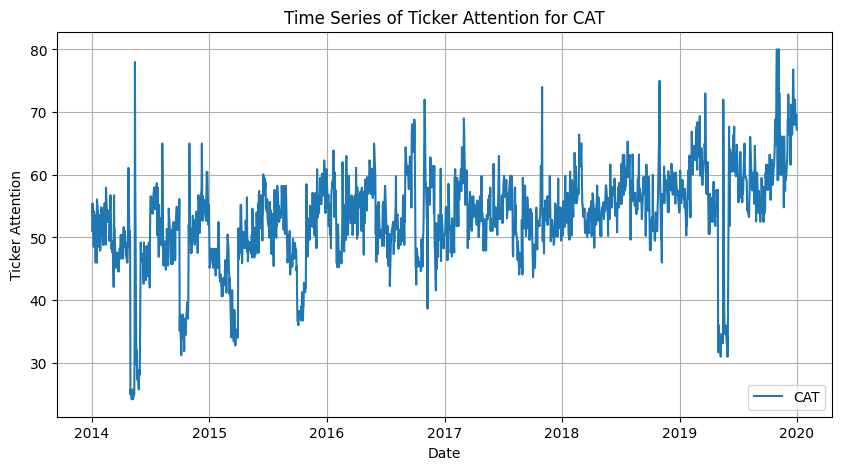

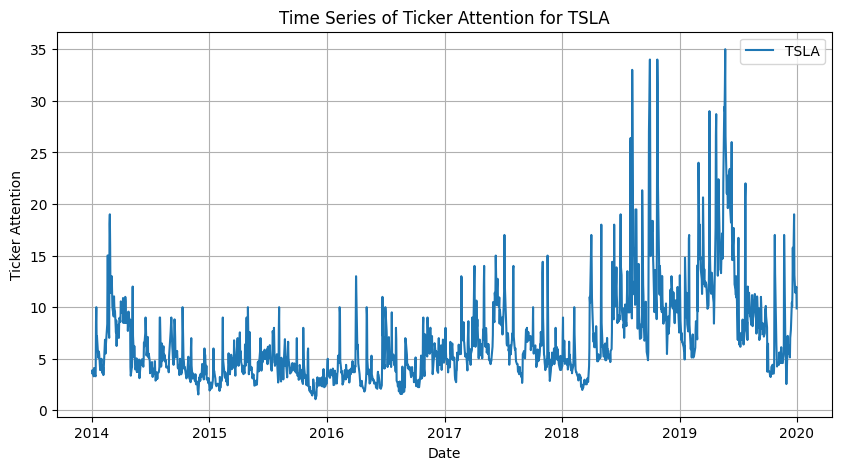

In [ ]:
import matplotlib.pyplot as plt

# Iterate over each unique stock ticker in pre_covid_top_stocks
for ticker in pre_covid_top_stocks['ticker'].unique():
    # Select data for the current ticker
    ticker_data = pre_covid_top_stocks[pre_covid_top_stocks['ticker'] == ticker]

    # Plot the time series for ticker_attention
    plt.figure(figsize=(10, 5))
    plt.plot(ticker_data.index, ticker_data['ticker_attention'], label=ticker)
    plt.title(f'Time Series of Ticker Attention for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Ticker Attention')
    plt.legend()
    plt.grid(True)
    plt.show()


In [105]:
import numpy as np

# Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(pre_covid_top_stocks['ticker_attention'], pre_covid_top_stocks['price'])[0, 1]

print("Pearson Correlation Coefficient between ticker_attention and price:", correlation_coefficient)


Pearson Correlation Coefficient between ticker_attention and price: -0.40341847240740714


In [106]:
pre_covid_top_stocks.head()

ticker      price      volume    return       high        low  \
date                                                                       
2014-01-02   AAPL  553.13000   8338094.0 -0.014064  557.03003  552.02100   
2014-01-03   AAPL  540.97998  13992006.0 -0.021966  553.70001  540.42999   
2014-01-06   AAPL  543.92999  14820614.0  0.005453  546.79999  533.59998   
2014-01-07   AAPL  540.03748  11381939.0 -0.007156  545.96002  537.92499   
2014-01-08   AAPL  543.46002   9199689.0  0.006338  545.56000  538.69000   

                 open   avg_price       mkt_cap  pct_return  ticker_attention  \
date                                                                            
2014-01-02  555.67999  554.525515  4.936392e+08     -1.4064             16.43   
2014-01-03  552.85999  547.065000  4.827960e+08     -2.1966             18.02   
2014-01-06  537.45001  540.199985  4.854287e+08      0.5453             18.55   
2014-01-07  544.32001  541.942505  4.819548e+08     -0.7156             15.90   
2014-01-08  538.81000  542.125000  4.850093e+08      0.6338             15.37   

            name_price_attention  volatility  High_Volatility  
date                                                           
2014-01-02                   4.4    1.892723            False  
2014-01-03                   4.2    1.858734            False  
2014-01-06                   4.5    1.897441            False  
2014-01-07                   4.7    1.816480            False  
2014-01-08                   5.0    1.750521            False

In [107]:
pre_covid_top_stocks.describe()

price        volume       return         high          low  \
count  7550.000000  7.550000e+03  7550.000000  7550.000000  7550.000000   
mean    136.598275  1.588654e+07     0.000879   138.222376   134.838513   
std      97.149623  1.673036e+07     0.019608    98.453634    95.714935   
min      23.520000  7.102770e+05    -0.139015    23.760000    23.500000   
25%      66.920000  4.351750e+06    -0.007887    67.842500    66.112500   
50%     111.035000  7.617812e+06     0.000735   112.125000   109.695000   
75%     185.147500  2.363867e+07     0.010223   187.260000   182.484992   
max     647.349980  1.898486e+08     0.176692   651.260010   644.469970   

              open    avg_price       mkt_cap   pct_return  ticker_attention  \
count  7550.000000  7550.000000  7.550000e+03  7550.000000       7550.000000   
mean    136.558319   136.530445  2.199275e+08     0.087856         31.022356   
std      97.087326    97.075293  2.788444e+08     1.960756         19.631252   
min      23.600000    23.630000  1.715150e+07   -13.901500          1.080000   
25%      66.880000    66.910625  4.917065e+07    -0.788675         13.200000   
50%     110.845000   110.785000  8.067736e+07     0.073500         27.300000   
75%     184.802507   185.271209  2.148731e+08     1.022325         50.400000   
max     649.900020   647.864990  1.288147e+09    17.669200        100.000000   

       name_price_attention   volatility  
count           7550.000000  7550.000000  
mean              10.304654     1.809041  
std               10.677028     0.706004  
min                0.000000     0.839583  
25%                2.465000     1.305258  
50%                7.560000     1.634551  
75%               15.300000     2.133503  
max              100.000000     6.893301

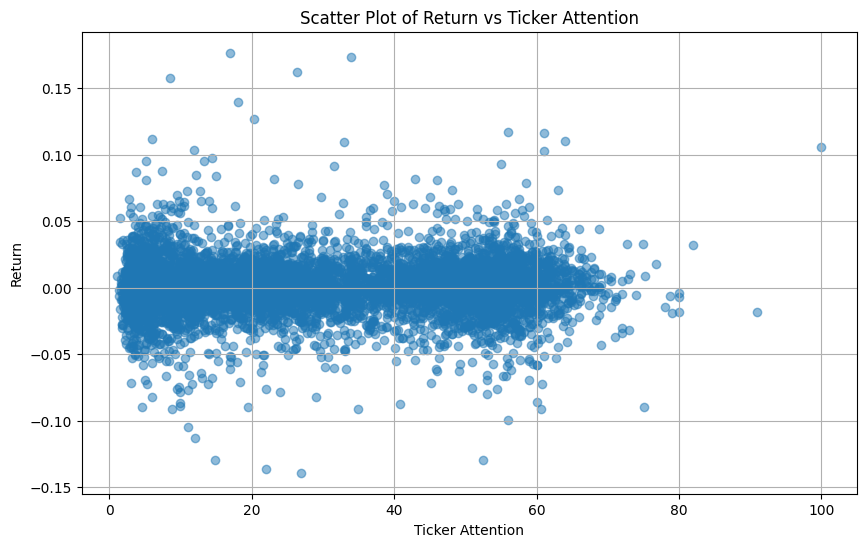

In [108]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pre_covid_top_stocks['ticker_attention'], pre_covid_top_stocks['return'], alpha=0.5)
plt.title('Scatter Plot of Return vs Ticker Attention')
plt.xlabel('Ticker Attention')
plt.ylabel('Return')
plt.grid(True)
plt.show()


In [111]:
import numpy as np

# Calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(pre_covid_top_stocks['ticker_attention'], pre_covid_top_stocks['return'])[0, 1]

print("Pearson Correlation Coefficient between ticker_attention and return:", correlation_coefficient)


Pearson Correlation Coefficient between ticker_attention and return: 0.002441826739211069


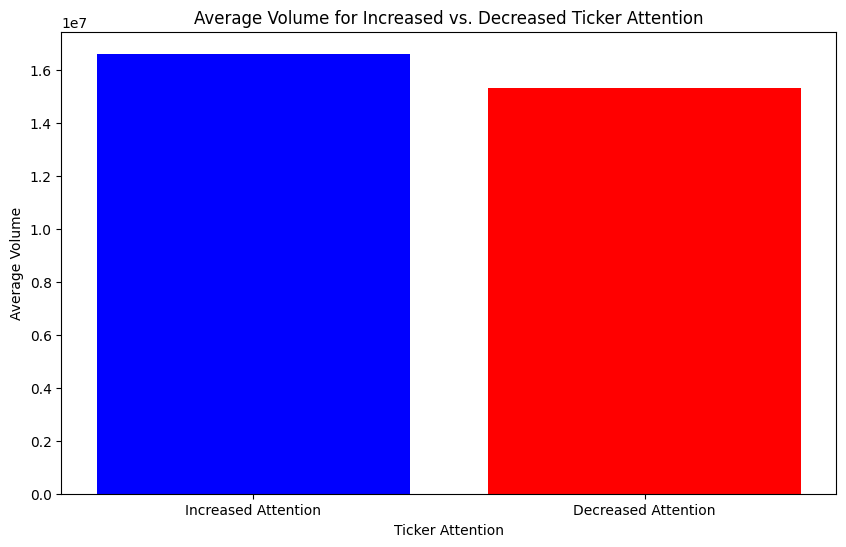

In [112]:
import matplotlib.pyplot as plt

# Divide the data based on changes in ticker attention
increased_attention = pre_covid_top_stocks[pre_covid_top_stocks['ticker_attention'] > pre_covid_top_stocks['ticker_attention'].shift(1)]
decreased_attention = pre_covid_top_stocks[pre_covid_top_stocks['ticker_attention'] < pre_covid_top_stocks['ticker_attention'].shift(1)]

# Calculate average volume for each group
avg_volume_increased = increased_attention['volume'].mean()
avg_volume_decreased = decreased_attention['volume'].mean()

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.bar(['Increased Attention', 'Decreased Attention'], [avg_volume_increased, avg_volume_decreased], color=['blue', 'red'])
plt.title('Average Volume for Increased vs. Decreased Ticker Attention')
plt.xlabel('Ticker Attention')
plt.ylabel('Average Volume')
plt.show()


In [113]:

import pandas as pd

# Calculate average volume for each group
avg_volume_increased = increased_attention['volume'].mean()
avg_volume_decreased = decreased_attention['volume'].mean()

# Create a DataFrame to display the results
volume_analysis = pd.DataFrame({
    'Ticker Attention': ['Increased', 'Decreased'],
    'Average Volume': [avg_volume_increased, avg_volume_decreased]
})

print(volume_analysis)


  Ticker Attention  Average Volume
0        Increased    1.662566e+07
1        Decreased    1.534223e+07


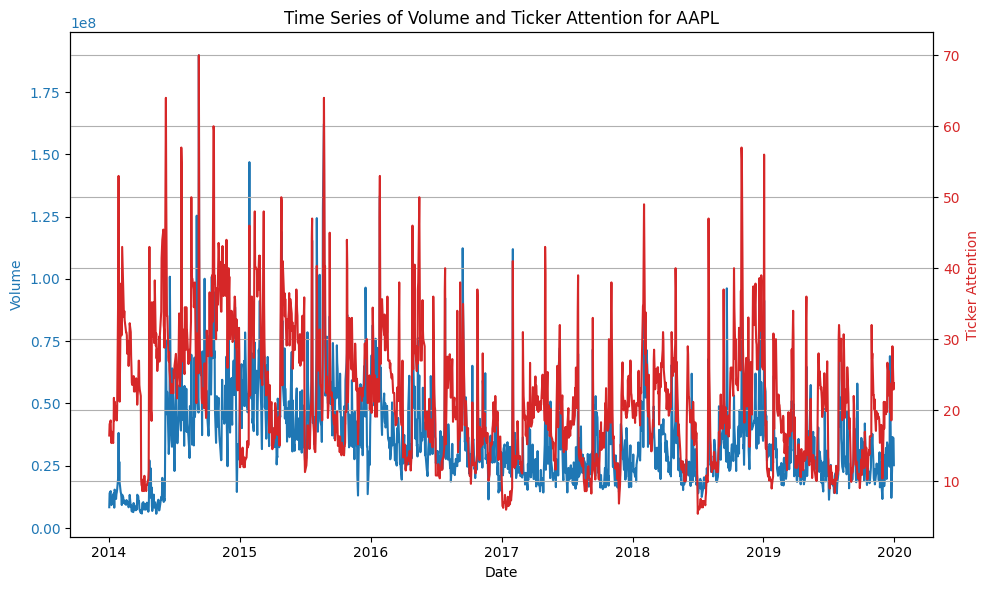

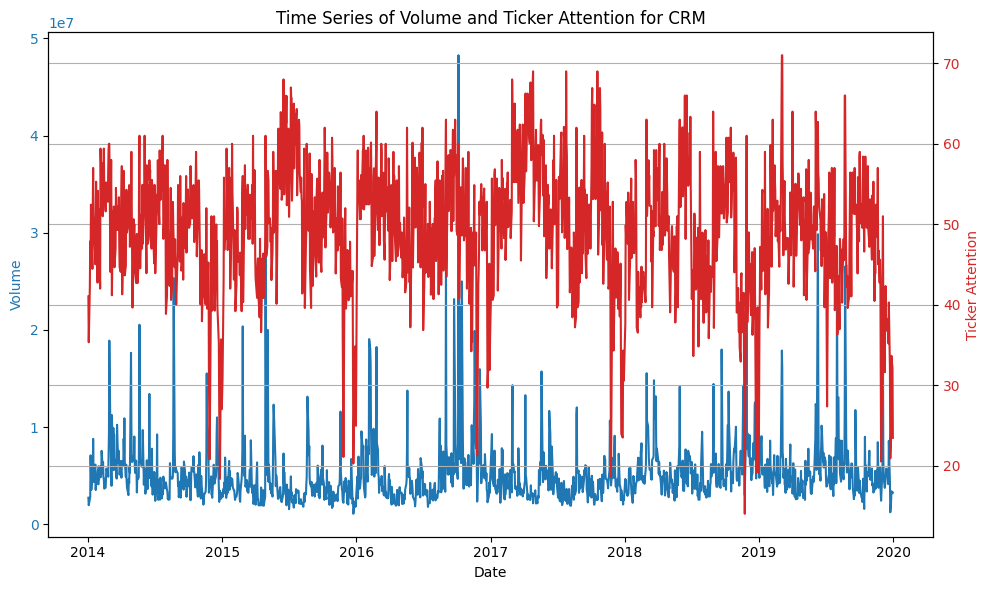

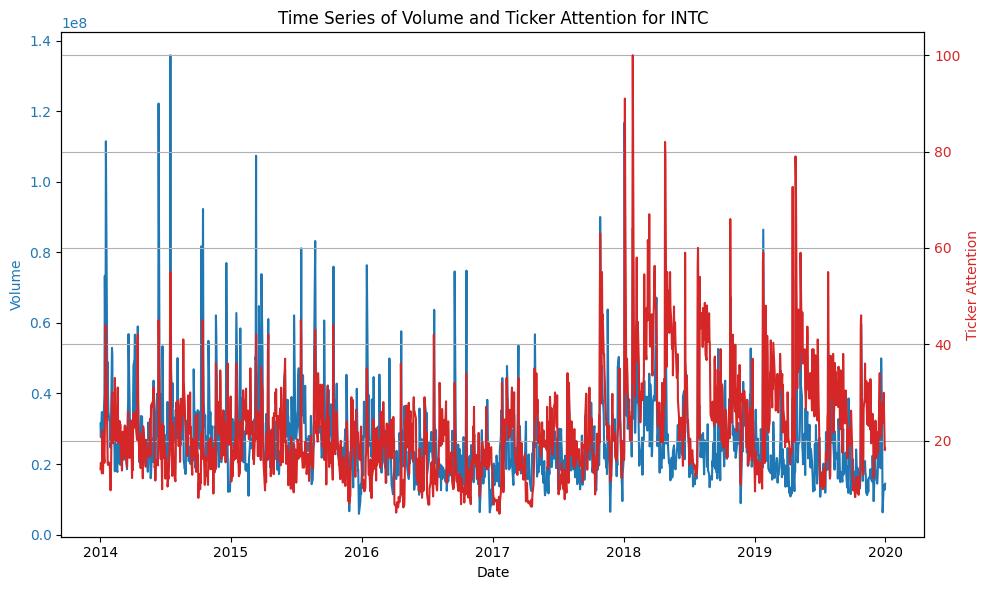

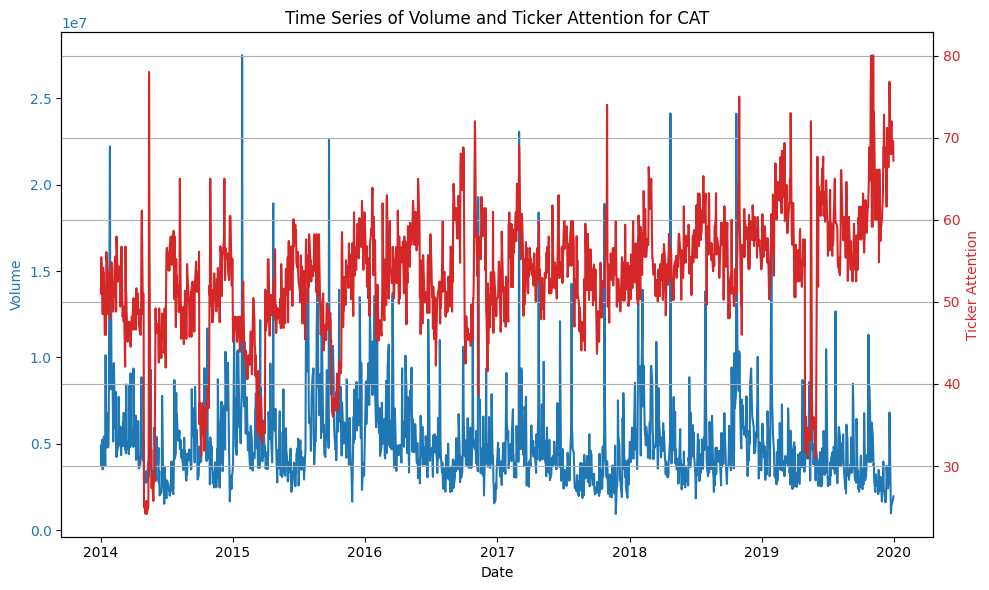

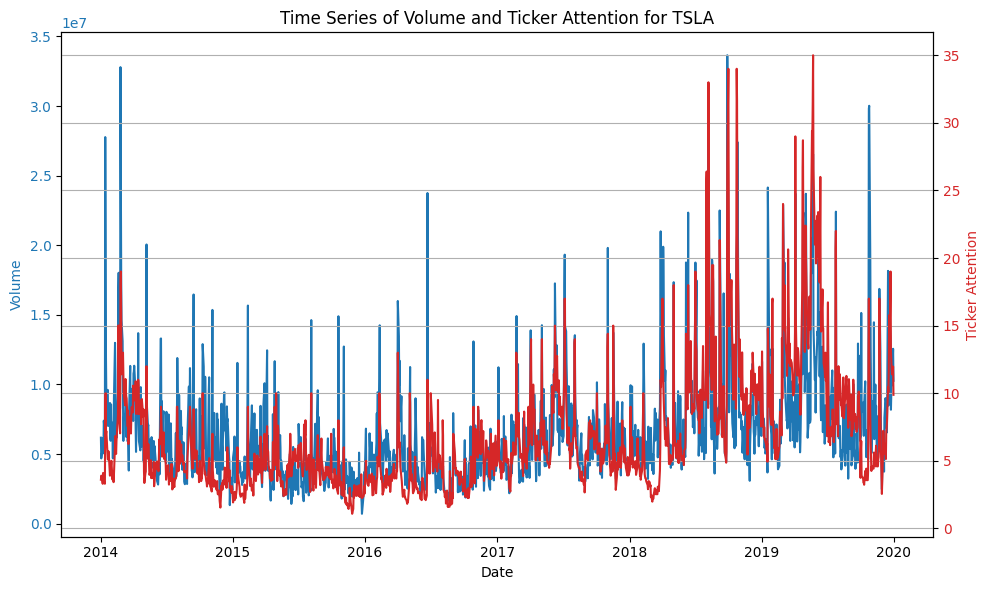

In [116]:
import matplotlib.pyplot as plt

# List of unique tickers
tickers = pre_covid_top_stocks['ticker'].unique()

# Plotting volume and attention for each stock
for ticker in tickers:
    stock_data = pre_covid_top_stocks[pre_covid_top_stocks['ticker'] == ticker]

    # Create subplots with shared x-axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot volume on primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Volume', color=color)
    ax1.plot(stock_data.index, stock_data['volume'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create secondary y-axis for ticker attention
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Ticker Attention', color=color)
    ax2.plot(stock_data.index, stock_data['ticker_attention'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'Time Series of Volume and Ticker Attention for {ticker}')
    plt.grid(True)
    fig.tight_layout()
    plt.show()


<ipython-input-117-ad28d22a35ef>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean()
<ipython-input-117-ad28d22a35ef>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean()
<ipython-input-117-ad28d22a35ef>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean()
<ipy

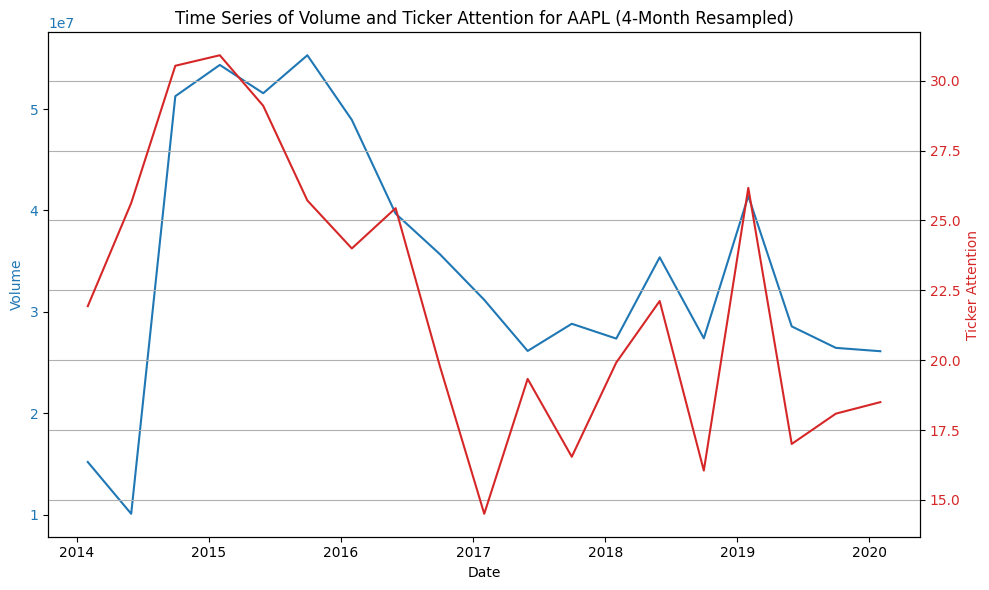

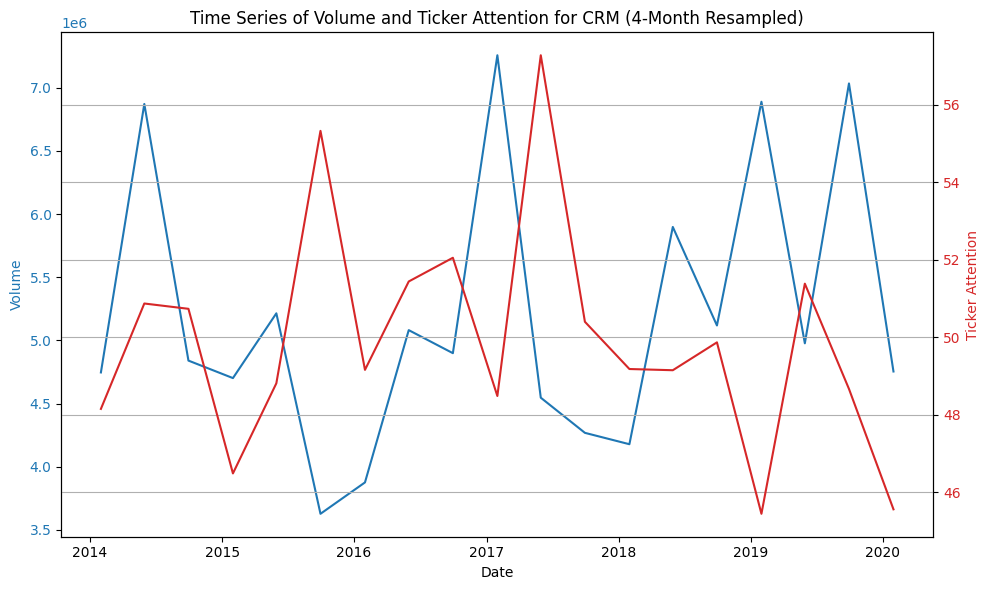

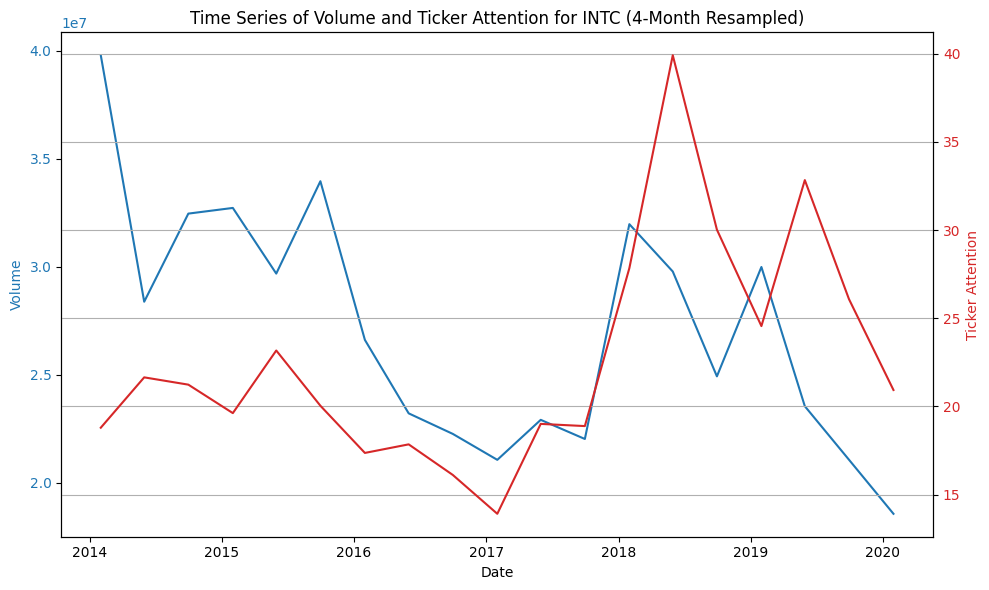

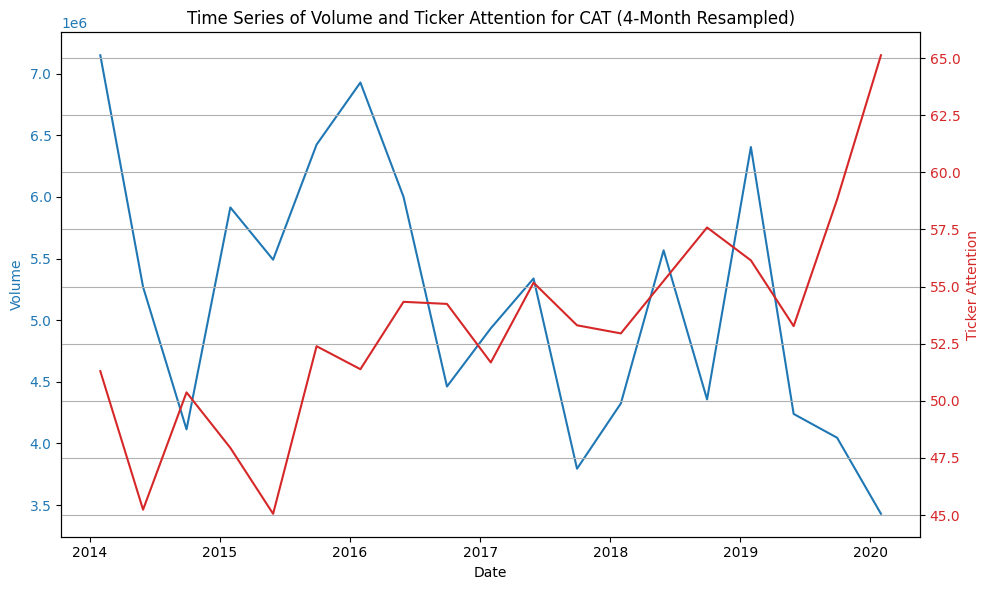

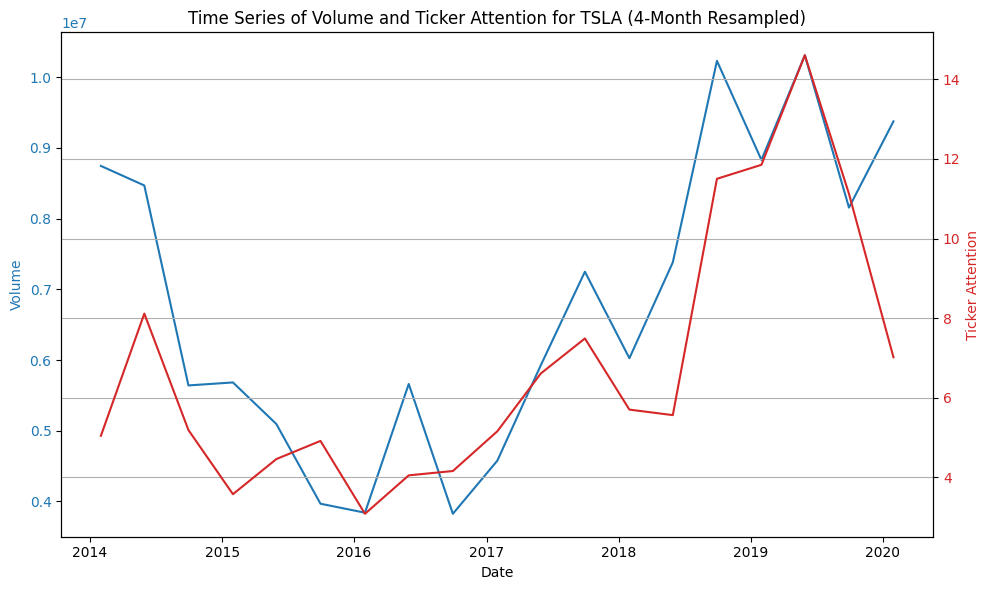

In [117]:
import matplotlib.pyplot as plt

# List of unique tickers
tickers = pre_covid_top_stocks['ticker'].unique()

# Plotting volume and attention for each stock
for ticker in tickers:
    stock_data = pre_covid_top_stocks[pre_covid_top_stocks['ticker'] == ticker]

    # Resample data to 4-month frequency
    stock_data_resampled = stock_data.resample('4M').mean()

    # Create subplots with shared x-axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot volume on primary y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Volume', color=color)
    ax1.plot(stock_data_resampled.index, stock_data_resampled['volume'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create secondary y-axis for ticker attention
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Ticker Attention', color=color)
    ax2.plot(stock_data_resampled.index, stock_data_resampled['ticker_attention'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'Time Series of Volume and Ticker Attention for {ticker} (4-Month Resampled)')
    plt.grid(True)
    fig.tight_layout()
    plt


<ipython-input-119-0044bda2a2fa>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean().dropna()


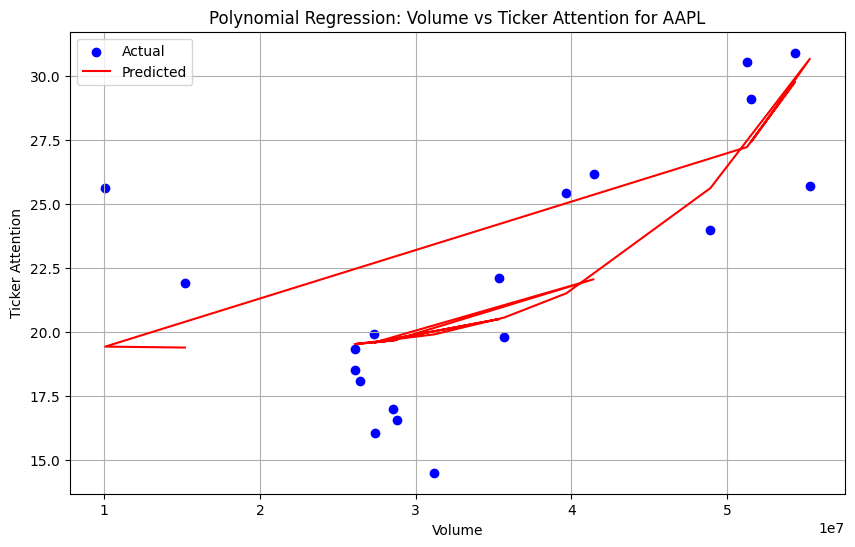

<ipython-input-119-0044bda2a2fa>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean().dropna()


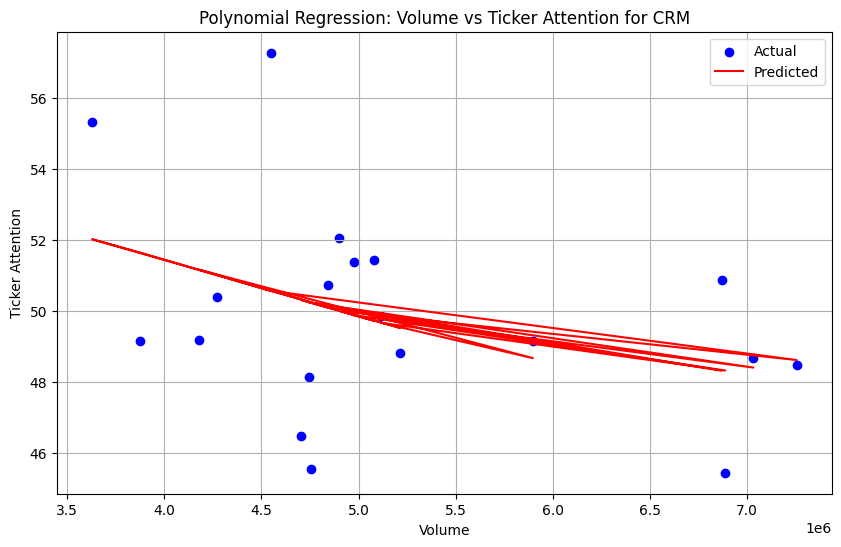

<ipython-input-119-0044bda2a2fa>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean().dropna()


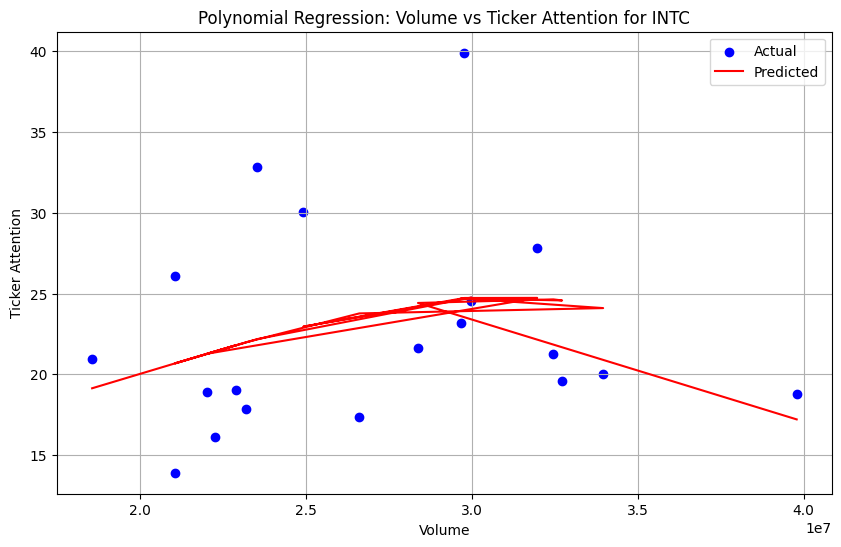

<ipython-input-119-0044bda2a2fa>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean().dropna()


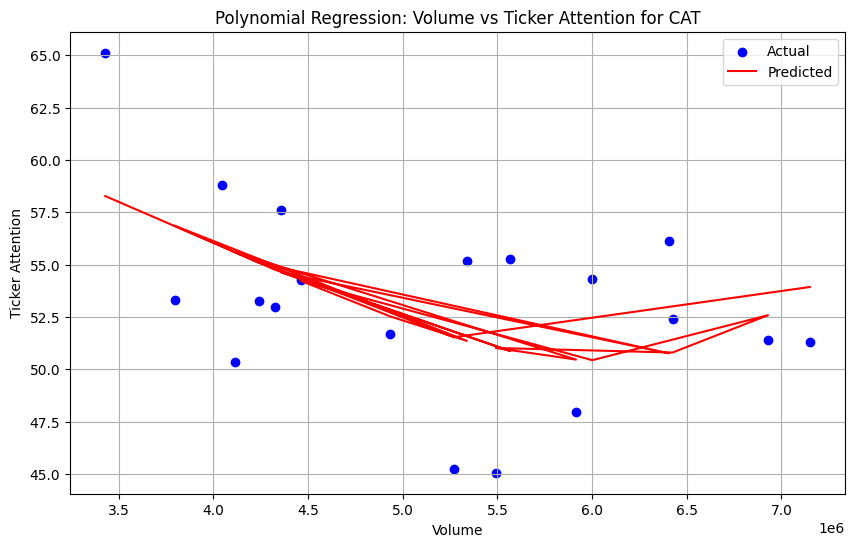

<ipython-input-119-0044bda2a2fa>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean().dropna()


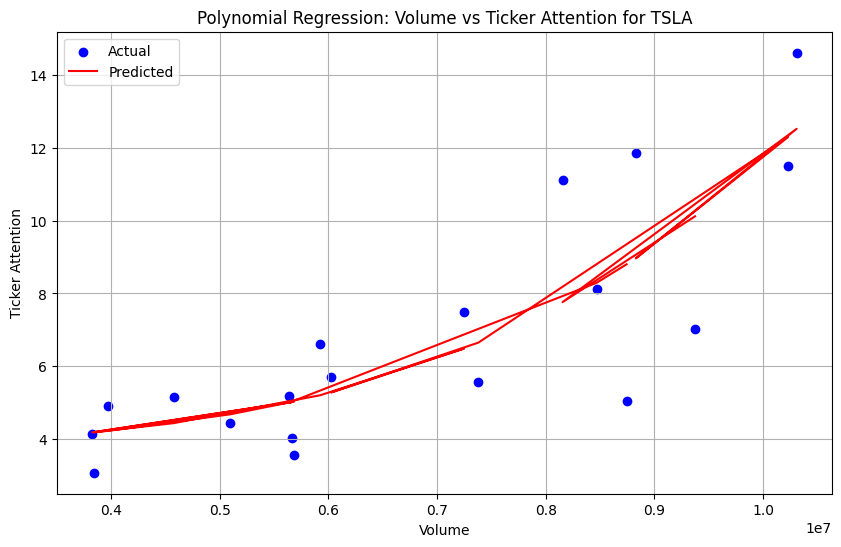

In [119]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define degree of polynomial
degree = 4

# Plotting volume and attention for each stock
for ticker in tickers:
    stock_data = pre_covid_top_stocks[pre_covid_top_stocks['ticker'] == ticker]

    # Resample data to 4-month frequency
    stock_data_resampled = stock_data.resample('4M').mean().dropna()

    # Extracting volume and ticker attention
    volume = stock_data_resampled['volume'].values.reshape(-1, 1)
    ticker_attention = stock_data_resampled['ticker_attention'].values

    # Perform polynomial regression
    polynomial_features = PolynomialFeatures(degree=degree)
    volume_poly = polynomial_features.fit_transform(volume)

    model = LinearRegression()
    model.fit(volume_poly, ticker_attention)
    predicted_ticker_attention = model.predict(volume_poly)

    # Plot scatter plot and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(volume, ticker_attention, color='blue', label='Actual')
    plt.plot(volume, predicted_ticker_attention, color='red', label='Predicted')
    plt.title(f'Polynomial Regression: Volume vs Ticker Attention for {ticker}')
    plt.xlabel('Volume')
    plt.ylabel('Ticker Attention')
    plt.legend()
    plt.grid(True)
    plt.show()


In [124]:
import pandas as pd

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Ticker', 'Degree', 'Intercept', 'Coefficients'])

# Define degree of polynomial
degree = 1

# Plotting volume and attention for each stock
for ticker in tickers:
    stock_data = pre_covid_top_stocks[pre_covid_top_stocks['ticker'] == ticker]

    # Resample data to 4-month frequency
    stock_data_resampled = stock_data.resample('4M').mean().dropna()

    # Extracting volume and ticker attention
    volume = stock_data_resampled['volume'].values.reshape(-1, 1)
    ticker_attention = stock_data_resampled['ticker_attention'].values

    # Perform polynomial regression
    polynomial_features = PolynomialFeatures(degree=degree)
    volume_poly = polynomial_features.fit_transform(volume)

    model = LinearRegression()
    model.fit(volume_poly, ticker_attention)

    # Get coefficients
    coefficients = model.coef_
    intercept = model.intercept_

    # Append results to DataFrame
    results_df = results_df.append({'Ticker': ticker,
                                    'Degree': degree,
                                    'Intercept': intercept,
                                    'Coefficients': coefficients}, ignore_index=True)

# Display results
print(results_df)


  Ticker Degree  Intercept                    Coefficients
0   AAPL      1  13.820576    [0.0, 2.401401631938108e-07]
1    CRM      1  54.998101   [0.0, -9.770487741246606e-07]
2   INTC      1  19.374450    [0.0, 1.198365608242526e-07]
3    CAT      1  62.168067  [0.0, -1.7277168983758962e-06]
4   TSLA      1  -1.440146   [0.0, 1.2132751861664831e-06]


<ipython-input-124-f17c1020bb7e>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean().dropna()
<ipython-input-124-f17c1020bb7e>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Ticker': ticker,
<ipython-input-124-f17c1020bb7e>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean().dropna()
<ipython-input-124-f17c1020bb7e>:32: FutureWarning: The frame.append method is deprecated and wi

In [121]:
# Calculate the correlation coefficient between ticker attention and trading volume for each stock
correlation_results = {}

for ticker in tickers:
    stock_data = pre_covid_top_stocks[pre_covid_top_stocks['ticker'] == ticker]

    # Resample data to 4-month frequency
    stock_data_resampled = stock_data.resample('4M').mean().dropna()

    # Calculate correlation coefficient
    correlation_coefficient = stock_data_resampled['ticker_attention'].corr(stock_data_resampled['volume'])

    # Store results
    correlation_results[ticker] = correlation_coefficient

# Convert results to DataFrame
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Ticker', 'Correlation_Coefficient'])

# Display results
print(correlation_df)


  Ticker  Correlation_Coefficient
0   AAPL                 0.622107
1    CRM                -0.361990
2   INTC                 0.104941
3    CAT                -0.409528
4   TSLA                 0.802181


<ipython-input-121-5e6244cb24a0>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean().dropna()
<ipython-input-121-5e6244cb24a0>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4M').mean().dropna()
<ipython-input-121-5e6244cb24a0>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_data_resampled = stock_data.resample('4

In [125]:
#Preprocessing

In [122]:
pre_covid_top_stocks.head()

ticker      price      volume    return       high        low  \
date                                                                       
2014-01-02   AAPL  553.13000   8338094.0 -0.014064  557.03003  552.02100   
2014-01-03   AAPL  540.97998  13992006.0 -0.021966  553.70001  540.42999   
2014-01-06   AAPL  543.92999  14820614.0  0.005453  546.79999  533.59998   
2014-01-07   AAPL  540.03748  11381939.0 -0.007156  545.96002  537.92499   
2014-01-08   AAPL  543.46002   9199689.0  0.006338  545.56000  538.69000   

                 open   avg_price       mkt_cap  pct_return  ticker_attention  \
date                                                                            
2014-01-02  555.67999  554.525515  4.936392e+08     -1.4064             16.43   
2014-01-03  552.85999  547.065000  4.827960e+08     -2.1966             18.02   
2014-01-06  537.45001  540.199985  4.854287e+08      0.5453             18.55   
2014-01-07  544.32001  541.942505  4.819548e+08     -0.7156             15.90   
2014-01-08  538.81000  542.125000  4.850093e+08      0.6338             15.37   

            name_price_attention  volatility  High_Volatility  
date                                                           
2014-01-02                   4.4    1.892723            False  
2014-01-03                   4.2    1.858734            False  
2014-01-06                   4.5    1.897441            False  
2014-01-07                   4.7    1.816480            False  
2014-01-08                   5.0    1.750521            False

In [126]:
pre_covid_top_stocks.describe()

price        volume       return         high          low  \
count  7550.000000  7.550000e+03  7550.000000  7550.000000  7550.000000   
mean    136.598275  1.588654e+07     0.000879   138.222376   134.838513   
std      97.149623  1.673036e+07     0.019608    98.453634    95.714935   
min      23.520000  7.102770e+05    -0.139015    23.760000    23.500000   
25%      66.920000  4.351750e+06    -0.007887    67.842500    66.112500   
50%     111.035000  7.617812e+06     0.000735   112.125000   109.695000   
75%     185.147500  2.363867e+07     0.010223   187.260000   182.484992   
max     647.349980  1.898486e+08     0.176692   651.260010   644.469970   

              open    avg_price       mkt_cap   pct_return  ticker_attention  \
count  7550.000000  7550.000000  7.550000e+03  7550.000000       7550.000000   
mean    136.558319   136.530445  2.199275e+08     0.087856         31.022356   
std      97.087326    97.075293  2.788444e+08     1.960756         19.631252   
min      23.600000    23.630000  1.715150e+07   -13.901500          1.080000   
25%      66.880000    66.910625  4.917065e+07    -0.788675         13.200000   
50%     110.845000   110.785000  8.067736e+07     0.073500         27.300000   
75%     184.802507   185.271209  2.148731e+08     1.022325         50.400000   
max     649.900020   647.864990  1.288147e+09    17.669200        100.000000   

       name_price_attention   volatility  
count           7550.000000  7550.000000  
mean              10.304654     1.809041  
std               10.677028     0.706004  
min                0.000000     0.839583  
25%                2.465000     1.305258  
50%                7.560000     1.634551  
75%               15.300000     2.133503  
max              100.000000     6.893301

In [127]:
pre_covid_top_stocks.to_csv('pre_covid_data.csv')
post_covid_top_stocks.to_csv('post_covid_data.csv')


In [130]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def prepare_data(df):
    # Separate features and target variable
    X = df.drop(columns=['pct_return'])  # Features
    y = df['pct_return']  # Target variable

    # Define categorical and numerical features
    categorical_features = ['ticker']
    numeric_features = ['price', 'volume', 'return', 'high', 'low', 'open', 'avg_price', 'mkt_cap',
                        'ticker_attention', 'name_price_attention', 'volatility', 'High_Volatility']

    # Define preprocessing steps for categorical features
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Define preprocessing steps for numerical features
    numeric_transformer = StandardScaler()

    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Create a pipeline with preprocessing steps
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Fit and transform the data
    X_preprocessed = pipeline.fit_transform(X)

    return X_preprocessed, y

# Example usage:
X_preprocessed, y = prepare_data(pre_covid_top_stocks)


In [132]:
y

date
2014-01-02   -1.4064
2014-01-03   -2.1966
2014-01-06    0.5453
2014-01-07   -0.7156
2014-01-08    0.6338
               ...  
2019-12-24    1.4384
2019-12-26    1.3380
2019-12-27   -0.1299
2019-12-30   -3.6433
2019-12-31    0.8753
Name: pct_return, Length: 7550, dtype: float64

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Random Forest with date features
rf_with_date = RandomForestRegressor(random_state=42)
rf_with_date.fit(X_train, y_train)
y_pred_with_date = rf_with_date.predict(X_test)
mse_with_date = mean_squared_error(y_test, y_pred_with_date)
print("Random Forest with Date Features - Mean Squared Error:", mse_with_date)

# Random Forest without date features
X_train_no_date = X_train[:, :-1]  # Excluding date features
X_test_no_date = X_test[:, :-1]
rf_without_date = RandomForestRegressor(random_state=42)
rf_without_date.fit(X_train_no_date, y_train)
y_pred_without_date = rf_without_date.predict(X_test_no_date)
mse_without_date = mean_squared_error(y_test, y_pred_without_date)
print("Random Forest without Date Features - Mean Squared Error:", mse_without_date)

# Comparing performance
if mse_with_date < mse_without_date:
    print("Random Forest with Date Features performs better.")
elif mse_with_date > mse_without_date:
    print("Random Forest without Date Features performs better.")
else:
    print("Both models perform equally well.")


Random Forest with Date Features - Mean Squared Error: 0.0015168126389595827
Random Forest without Date Features - Mean Squared Error: 0.0015711060296542806
Random Forest with Date Features performs better.


In [134]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate Random Forest regressor
rf_reg = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best model
best_rf_model = grid_search.best_estimator_

# Evaluate on test set
y_pred_test = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Random Forest with Date Features - Mean Squared Error on Test Set:", mse_test)


KeyboardInterrupt: 

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Instantiate Random Forest regressor
rf_reg = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best model
best_rf_model = grid_search.best_estimator_

# Evaluate on test set
y_pred_test = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Random Forest with Date Features - Mean Squared Error on Test Set:", mse_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest with Date Features - Mean Squared Error on Test Set: 0.0014739173367229043


In [ ]:
#XGBOOST

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}

# Instantiate XGBoost regressor
xgb_reg = XGBRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best model
best_xgb_model = grid_search.best_estimator_

# Evaluate on test set
y_pred_test = best_xgb_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print("XGBoost - Mean Squared Error on Test Set:", mse_test)
